<a href="https://colab.research.google.com/github/bghaendler/BJBS-AI-LAB/blob/master/BJBS_AI_Lab_Session_04_Data_Visualization_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img width="300" src="https://raw.githubusercontent.com/bghaendler/BJBS-AI-LAB/master/img/BJBSAILogo.png" align="right"> 
# BJBS AI_Lab 2020 - Data Visualization library with Python

## References used
- https://serialmentor.com/dataviz/
- https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/
- https://community.powerbi.com/t5/Data-Stories-Gallery/FT-Visual-Vocabulary-Power-BI-Edition/td-p/584460
- https://ft-interactive.github.io/visual-vocabulary/
- https://github.com/ft-interactive/chart-doctor/tree/master/visual-vocabulary
- https://github.com/d3/d3/wiki/Gallery


## Introduction

- The charts are grouped based on the 7 different purposes of your visualization objective. For example, if you want to picturize the relationship between 2 variables, check out the plots under the ‘Correlation’ section. Or if you want to show how a value changed over time, look under the ‘Change’ section and so on.

- An effective chart is one which:

 - Conveys the right and necessary information without distorting facts.
 - Simple in design, you dont have to strain in order to get it.
 - Aesthetics support the information rather than overshadow it.
 - Not overloaded with information.

### Data Visualization types by Financial Times



**- 1. Deviation**
  - Emphasise variations (+/-) from a fixed reference point. 
  - Typically the reference point is zero but it can also be a target or a long-term average. 
  - Can also be used to show sentiment (positive/neutral/negative).
  - Examples:
     - Trade surplus/deficit, climate change

**- 2. Correlation**
  - Show the relationship between two or more variables. 
  - Be mindful that, unless you tell them otherwise, many readers will assume the relationships you show them to be causal (i.e. one causes the other).
  - Example FT uses
    - Inflation and unemployment, income and life expectancy

**- 3. Ranking**
- Use where an item’s position in an ordered list is more important than its absolute or relative value. Don’t be afraid to highlight the points of interest.
- Example FT uses
  - Wealth, deprivation, league tables, constituency election results

**- 4. Distribution**
- Show values in a dataset and how often they occur. The shape (or ‘skew’) of a distribution can be a memorable way of highlighting the lack of uniformity or equality in the data.
- Example FT uses
  - Income distribution, population (age/sex) distribution, revealing inequality

**- 5. Change over Time**
- Give emphasis to changing trends. These can be short (intra-day) movements or extended series traversing decades or centuries: Choosing the correct time period is important to provide suitable context for the reader.
- Example FT uses
  - Share price movements, economic time series, sectoral changes in a market

**- 6. Magnitude**
- Show size comparisons. These can be relative (just being able to see larger/bigger) or absolute (need to see fine differences). Usually these show a ‘counted’ number (for example, barrels, dollars or people) rather than a calculated rate or per cent.
- Example FT uses
  - Commodity production, market capitalisation, volumes in general

**- 7. Part-to-whole**
- Show how a single entity can be broken down into its component elements. If the reader’s interest is solely in the size of the components, consider a magnitude-type chart instead.
- Example FT uses
  - Fiscal budgets, company structures, national election results

**- 8. Spatial**
- Aside from locator maps only used when precise locations or geographical patterns in data are more important to the reader than anything else.
- Example FT uses
  - Population density, natural resource locations, natural disaster risk/impact, catchment areas, variation in election results
  
**- 9. Flow**
- Show the reader volumes or intensity of movement between two or more states or conditions. These might be logical sequences or geographical locations.
- Example FT uses
  - Movement of funds, trade, migrants, lawsuits, information; relationship graphs.

### Libraries

In [ ]:
# !pip install brewer2mpl
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.2.1
0.10.0


# 1. Deviation


Emphasise variations (+/-) from a fixed reference point. Typically the reference point is zero but it can also be a target or a long-term average. Can also be used to show sentiment (positive/neutral/negative).

Examples: Trade surplus/deficit, climate change

## Diverging Bars
A simple standard bar chart that can handle both negative and positive magnitude values.

- If you want to see how the items are varying based on a single metric and visualize the order and amount of this variance, the diverging bars is a great tool. 
- It helps to quickly **differentiate the performance of groups in your data and is quite intuitive and instantly conveys the point**.

In [ ]:
# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)
df.head()

index       mpg  cyl  ...              carname     mpg_z  colors
0     15  3.224903    8  ...  Lincoln Continental -1.829979     red
1     14  3.224903    8  ...   Cadillac Fleetwood -1.829979     red
2     23  3.646917    8  ...           Camaro Z28 -1.191664     red
3      6  3.781534    8  ...           Duster 360 -0.988049     red
4     16  3.834058    8  ...    Chrysler Imperial -0.908604     red

[5 rows x 17 columns]

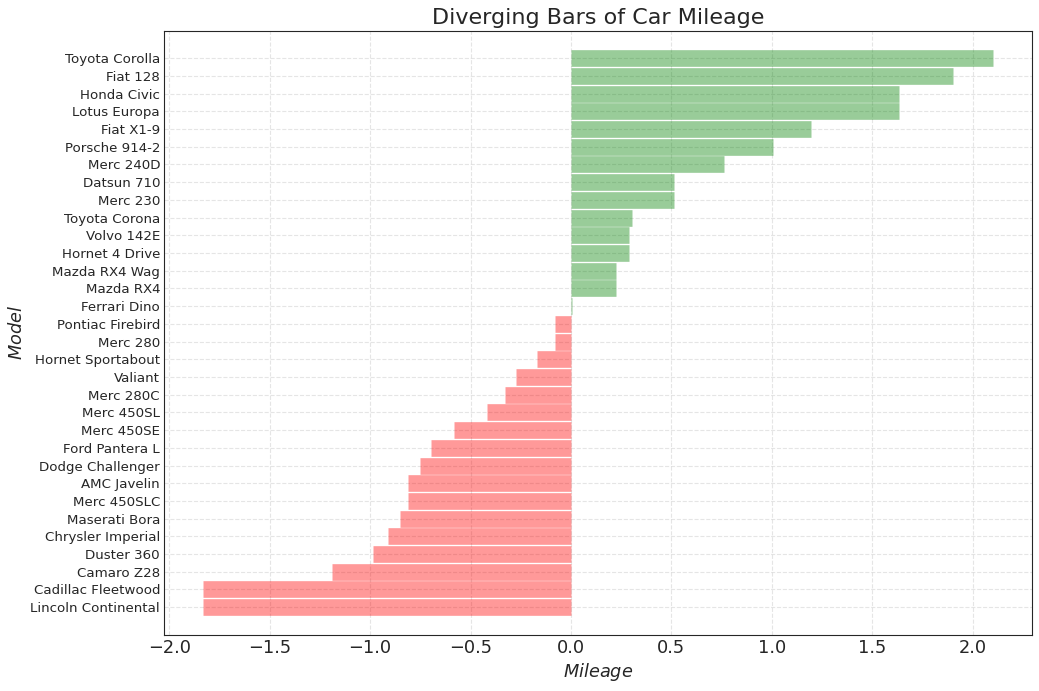

In [ ]:
# Draw plot
plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(
    y=df.index, 
    xmin=0, 
    xmax=df.mpg_z, #(x - x.mean())/x.std()
    color=df.colors, alpha=0.4, linewidth=15)

# Decorations
plt.gca().set(ylabel='$Model$', xlabel='$Mileage$')
plt.yticks(df.index, df.cars, fontsize=12)
plt.title('Diverging Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

### Diverging Texts

- Diverging texts is similar to diverging bars and it preferred if you want to show the value of each items within the chart in a nice and presentable way.

In [ ]:
# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)
df.head()

index       mpg  cyl  ...              carname     mpg_z  colors
0     15  3.224903    8  ...  Lincoln Continental -1.829979     red
1     14  3.224903    8  ...   Cadillac Fleetwood -1.829979     red
2     23  3.646917    8  ...           Camaro Z28 -1.191664     red
3      6  3.781534    8  ...           Duster 360 -0.988049     red
4     16  3.834058    8  ...    Chrysler Imperial -0.908604     red

[5 rows x 17 columns]

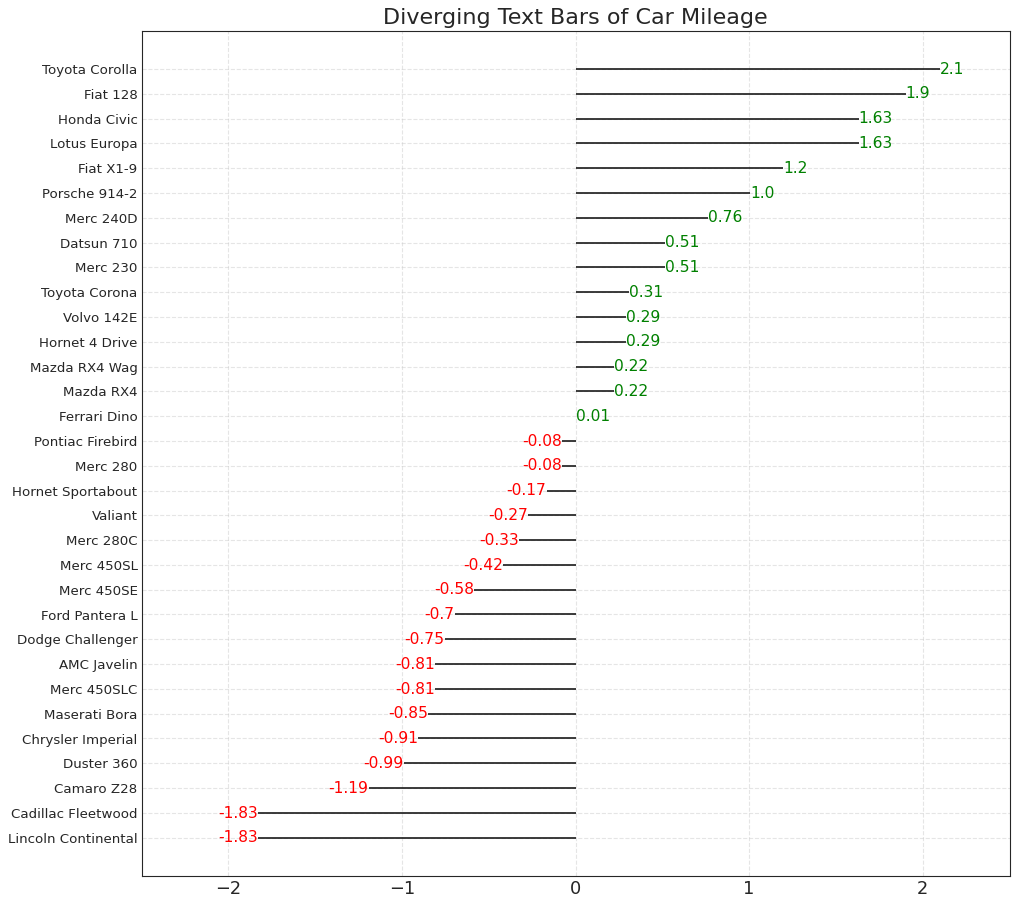

In [ ]:
# Draw plot
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z)
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 0 else 'green', 'size':14})

# Decorations    
plt.yticks(df.index, df.cars, fontsize=12)
plt.title('Diverging Text Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5)
plt.show()

### Diverging Dot Plot

Divering dot plot is also similar to the diverging bars. However compared to diverging bars, the absence of bars reduces the amount of contrast and disparity between the groups.

In [ ]:
# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'darkgreen' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

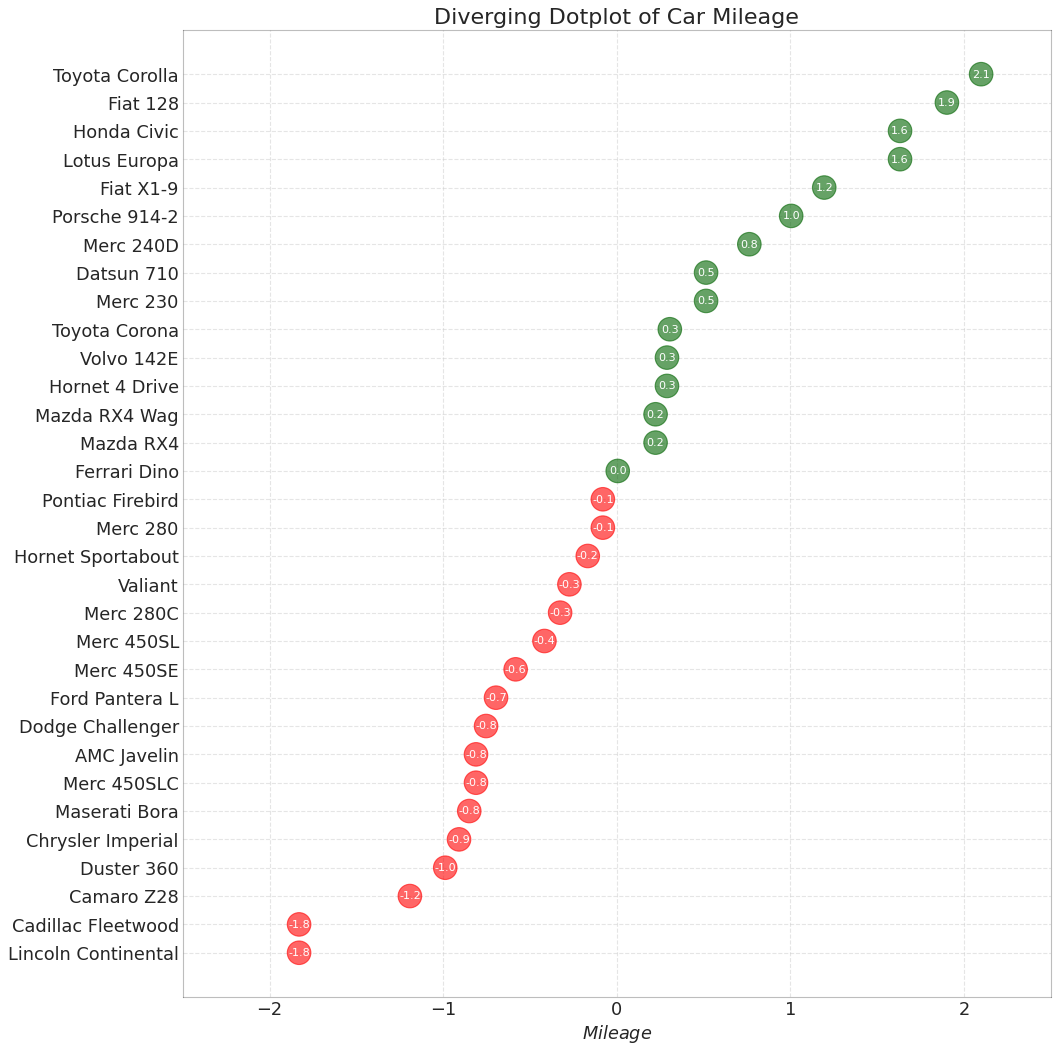

In [ ]:
# Draw plot
plt.figure(figsize=(14,16), dpi= 80)
plt.scatter(df.mpg_z, df.index, s=450, alpha=.6, color=df.colors)
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x, y, round(tex, 1), horizontalalignment='center', 
                 verticalalignment='center', fontdict={'color':'white'})

# Decorations
# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.yticks(df.index, df.cars)
plt.title('Diverging Dotplot of Car Mileage', fontdict={'size':20})
plt.xlabel('$Mileage$')
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5)
plt.show()

### Diverging Lollipop Chart with Markers

Lollipop with markers provides a flexible way of visualizing the divergence by laying emphasis on any significant datapoints you want to bring attention to and give reasoning within the chart appropriately.

In [ ]:
# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = 'black'

# color fiat differently
df.loc[df.cars == 'Fiat X1-9', 'colors'] = 'darkorange'
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)
df.head()

index       mpg  cyl  ...              carname     mpg_z  colors
0     15  3.224903    8  ...  Lincoln Continental -1.829979   black
1     14  3.224903    8  ...   Cadillac Fleetwood -1.829979   black
2     23  3.646917    8  ...           Camaro Z28 -1.191664   black
3      6  3.781534    8  ...           Duster 360 -0.988049   black
4     16  3.834058    8  ...    Chrysler Imperial -0.908604   black

[5 rows x 17 columns]

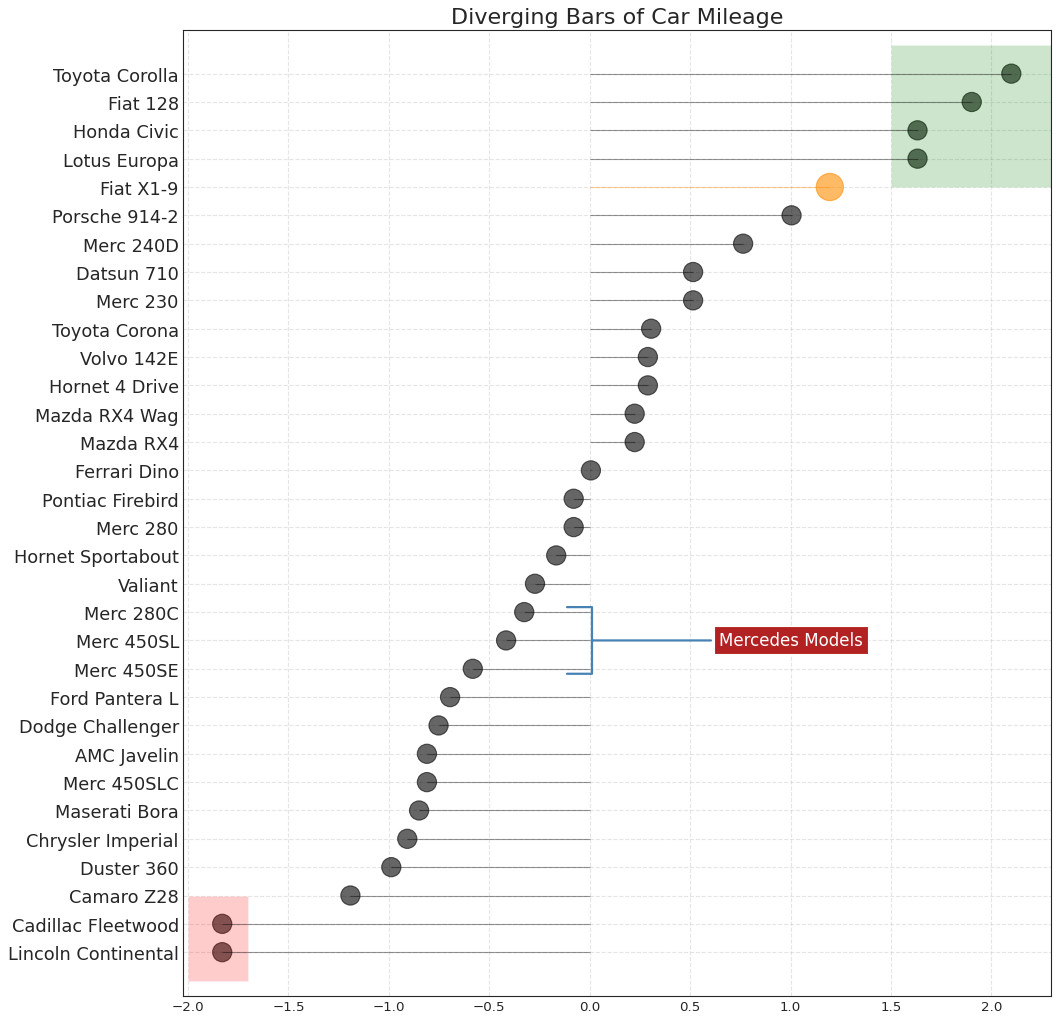

In [ ]:
# Draw plot
import matplotlib.patches as patches

plt.figure(figsize=(14,16), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=1)
plt.scatter(df.mpg_z, df.index, color=df.colors, s=[600 if x == 'Fiat X1-9' else 300 for x in df.cars], alpha=0.6)
plt.yticks(df.index, df.cars)
plt.xticks(fontsize=12)

# Annotate
plt.annotate('Mercedes Models', xy=(0.0, 11.0), xytext=(1.0, 11), xycoords='data', 
            fontsize=15, ha='center', va='center',
            bbox=dict(boxstyle='square', fc='firebrick'),
            arrowprops=dict(arrowstyle='-[, widthB=2.0, lengthB=1.5', lw=2.0, color='steelblue'), color='white')

# Add Patches
p1 = patches.Rectangle((-2.0, -1), width=.3, height=3, alpha=.2, facecolor='red')
p2 = patches.Rectangle((1.5, 27), width=.8, height=5, alpha=.2, facecolor='green')
plt.gca().add_patch(p1)
plt.gca().add_patch(p2)

# Decorate
plt.title('Diverging Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

## Diverging stacked bar (pending)
Perfect for presenting survey results which involve sentiment (eg disagree/neutral/ agree).

## Spine (pending)
Splits a single value into two contrasting components (eg male/female).

## Surplus/deficit filled line
The shaded area of these charts allows a balance to be shown – either against a baseline or between two series.


By coloring the area between the axis and the lines, the area chart throws more emphasis not just on the peaks and troughs but also the duration of the highs and lows. The longer the duration of the highs, the larger is the area under the line.

In [ ]:
# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv", parse_dates=['date']).head(100)
x = np.arange(df.shape[0])
y_returns = (df.psavert.diff().fillna(0)/df.psavert.shift(1)).fillna(0) * 100
df.head()

date    pce     pop  psavert  uempmed  unemploy
0 1967-07-01  507.4  198712     12.5      4.5      2944
1 1967-08-01  510.5  198911     12.5      4.7      2945
2 1967-09-01  516.3  199113     11.7      4.6      2958
3 1967-10-01  512.9  199311     12.5      4.9      3143
4 1967-11-01  518.1  199498     12.5      4.7      3066

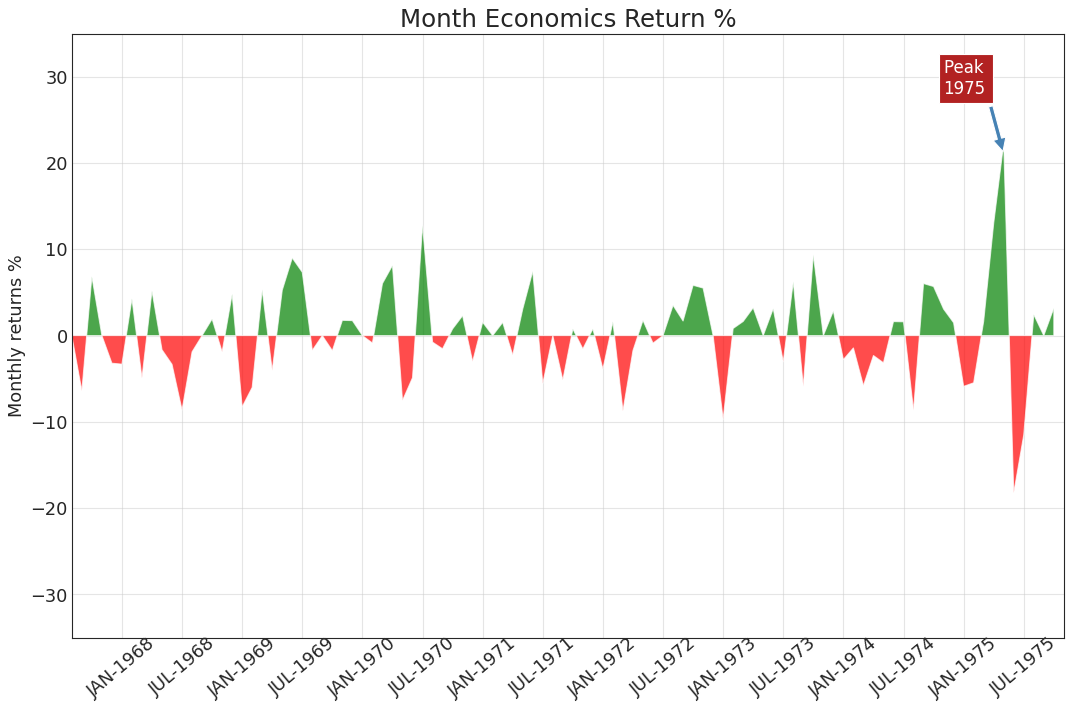

In [ ]:
# Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] >= 0, facecolor='green', interpolate=True, alpha=0.7)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] <= 0, facecolor='red', interpolate=True, alpha=0.7)

# Annotate
plt.annotate('Peak \n1975', xy=(94.0, 21.0), xytext=(88.0, 28),
             bbox=dict(boxstyle='square', fc='firebrick'),
             arrowprops=dict(facecolor='steelblue', shrink=0.05), fontsize=15, color='white')


# Decorations
xtickvals = [str(m)[:3].upper()+"-"+str(y) for y,m in zip(df.date.dt.year, df.date.dt.month_name())]
plt.gca().set_xticks(x[::6])
plt.gca().set_xticklabels(xtickvals[::6], rotation=40, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})
plt.ylim(-35,35)
plt.xlim(1,100)
plt.title("Month Economics Return %", fontsize=22)
plt.ylabel('Monthly returns %')
plt.grid(alpha=0.5)
plt.show()

# 2. Correlation


- The plots under correlation is used to visualize the relationship between 2 or more variables. 
- That is, how does one variable change with respect to another.

## Scatter plot
The standard way to show the relationship between two continuous variables, each of which has its own axis.

- Scatteplot is a classic and fundamental plot used to study the relationship between two variables. 
- If you have multiple groups in your data you may want to visualise each group in a different color. 
- In matplotlib, you can conveniently do this using plt.scatterplot().

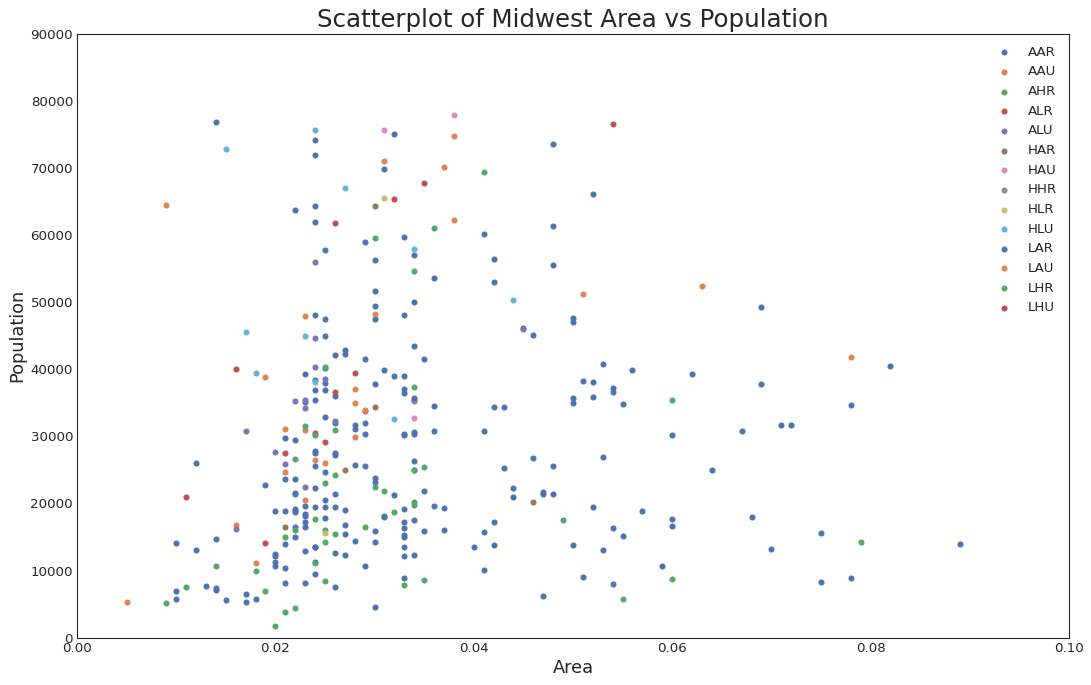

In [ ]:
# Import dataset 
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

# Prepare Data 
# Create as many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', 
                data=midwest.loc[midwest.category==category, :], 
                s=20, 
                #c=colors[i], 
                label=str(category))

# Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)
plt.legend(fontsize=12)    
plt.show();    

### 3D Scatterplot

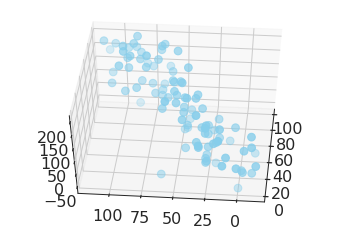

In [ ]:
# Dataset
df=pd.DataFrame({'X': range(1,101), 'Y': np.random.randn(100)*15+range(1,101), 'Z': (np.random.randn(100)*15+range(1,101))*2 })
 
# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['X'], df['Y'], df['Z'], c='skyblue', s=60)
ax.view_init(50, 185)
plt.show()


### Hexibin

A Hexbin plot is useful to represent the relationship of 2 numerical variables when you have a lot of data point. 
Instead of overlapping, the plotting window is split in several hexbins, and the number of points per hexbin is counted. 
The color denotes this number of points. This can easily be done using the hexbin function of Matplotlib. Note that you can change the size of the bins using the gridsize argument.

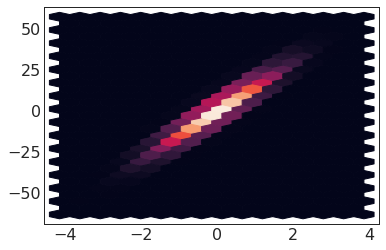

In [ ]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
 
# create data
x = np.random.normal(size=50000)
y = (x * 3 + np.random.normal(size=50000)) * 5
 
# Make the plot
plt.hexbin(x, y, gridsize=(15,15) )
plt.show()
 



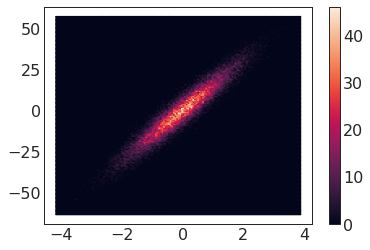

In [ ]:
# We can control the size of the bins:
plt.hexbin(x, y, gridsize=(150,150) )
plt.colorbar()
plt.show()

### Density plot with Matplotlib

Let’s consider that you want to study the relationship between 2 numerical variables with a lot of points. Then you can consider the number of points on each part of the plotting area and thus calculate a 2D kernel density estimate. It is like a smoothed histogram. Instead of a point falling into a particular bin, it adds a weight to surrounding bins.

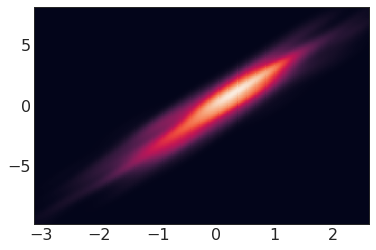

In [ ]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kde
 
# create data
x = np.random.normal(size=500)
y = x * 3 + np.random.normal(size=500)
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=300
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape))
plt.show()


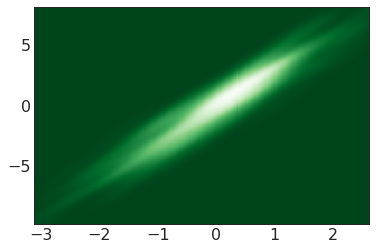

In [ ]:
# Change color palette
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Greens_r)
plt.show()


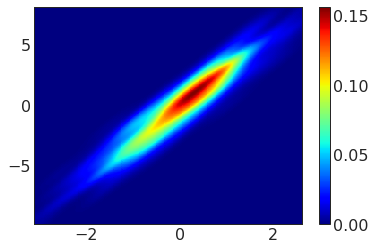

In [ ]:
# Add color bar
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.jet)
plt.colorbar()
plt.show()


### Avoid overlapping in scatterplot with 2D density

- Consider the scatterplot on the left hand side of this figure. A lot of dots overlap and make the figure hard to read. Even worse, it is impossible to determine how many data points are in each position. In this case, a solution is to cut the plotting window in several bins, and represent the number of data points in each bin by a color. Following the shape of the bin, this makes Hexbin plot or 2D histogram.

- Then, it is possible to make a smoother result using Gaussian KDE (kernel density estimate). Its representation is called a 2D density plot, and you can add a contour to denote each step. 

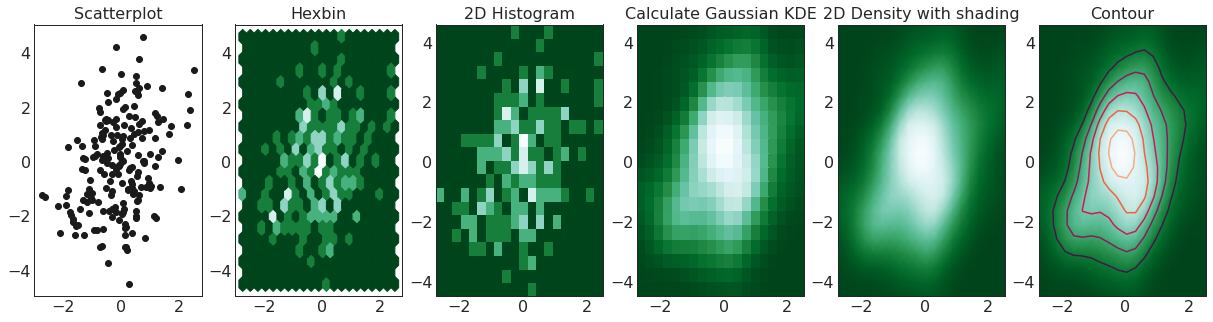

In [ ]:

from scipy.stats import kde
 
# Create data: 200 points
data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 3]], 200)
x, y = data.T
 
# Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=6, nrows=1, figsize=(21, 5))
 
# Everything sarts with a Scatterplot
axes[0].set_title('Scatterplot')
axes[0].plot(x, y, 'ko')
# As you can see there is a lot of overplottin here!
 
# Thus we can cut the plotting window in several hexbins
nbins = 20
axes[1].set_title('Hexbin')
axes[1].hexbin(x, y, gridsize=nbins, cmap=plt.cm.BuGn_r)
 
# 2D Histogram
axes[2].set_title('2D Histogram')
axes[2].hist2d(x, y, bins=nbins, cmap=plt.cm.BuGn_r)
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde(data.T)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# plot a density
axes[3].set_title('Calculate Gaussian KDE')
axes[3].pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.BuGn_r)
 
# add shading
axes[4].set_title('2D Density with shading')
axes[4].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
 
# contour
axes[5].set_title('Contour')
axes[5].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
axes[5].contour(xi, yi, zi.reshape(xi.shape) )


### Bubble plot with Encircling

- Sometimes you want to show a group of points within a boundary to emphasize their importance. 
- In this example, you get the records from the dataframe that should be encircled and pass it to the encircle() described in the code below.

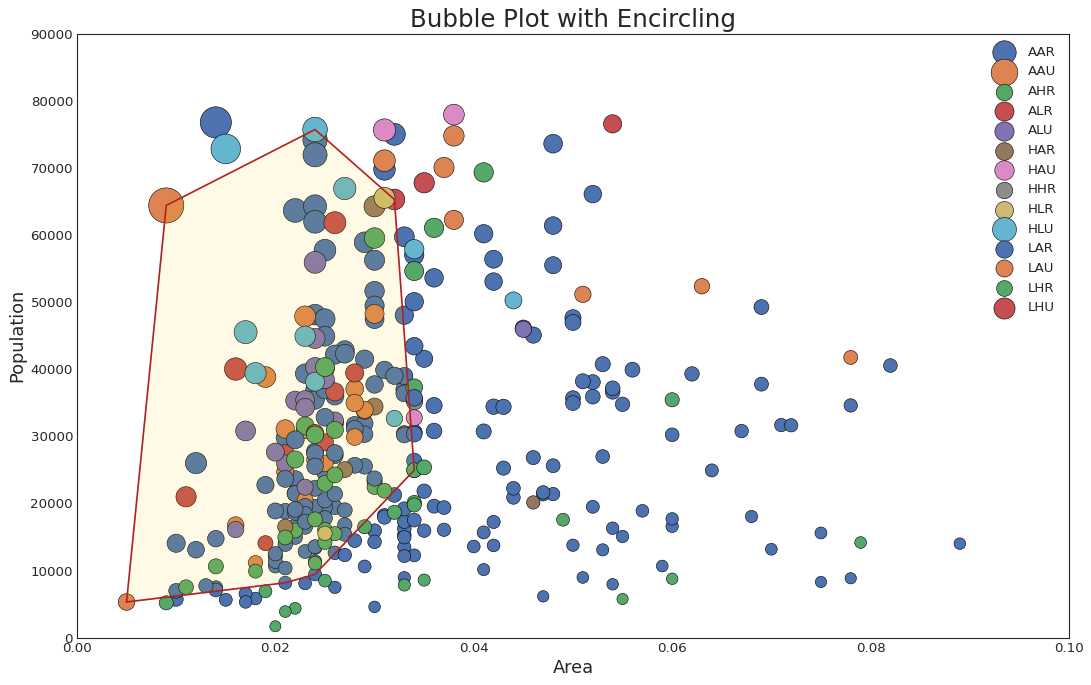

In [ ]:
from matplotlib import patches
from scipy.spatial import ConvexHull
import warnings; warnings.simplefilter('ignore')
sns.set_style("white")

# Step 1: Prepare Data
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

# As many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Step 2: Draw Scatterplot with unique color for each category
fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')    

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', 
                data=midwest.loc[midwest.category==category, :], 
                s='dot_size', 
                #c=colors[i], 
                label=str(category), edgecolors='black', linewidths=.5)

# Step 3: Encircling
# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# Select data to be encircled
midwest_encircle_data = midwest.loc[midwest.state=='IN', :]                         

# Draw polygon surrounding vertices    
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="k", fc="gold", alpha=0.1)
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="firebrick", fc="none", linewidth=1.5)

# Step 4: Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
plt.legend(fontsize=12)    
plt.show()    

### Scatter plot with linear regression line of best fit

- If you want to understand how two variables change with respect to each other, the line of best fit is the way to go. 
- The below plot shows how the line of best fit differs amongst various groups in the data. 
- To disable the groupings and to just draw one line-of-best-fit for the entire dataset, remove the hue='cyl' parameter from the sns.lmplot() call below.

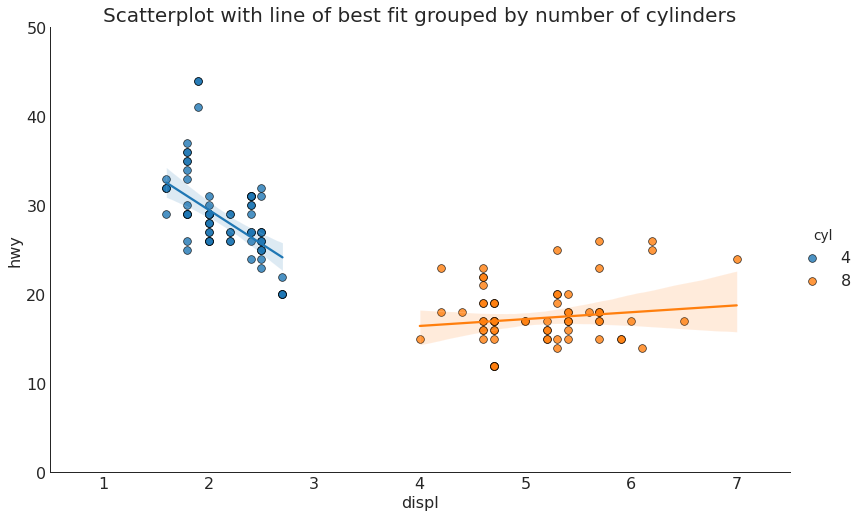

In [ ]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df_select = df.loc[df.cyl.isin([4,8]), :]

# Plot
sns.set_style("white")
gridobj = sns.lmplot(x="displ", y="hwy", hue="cyl", data=df_select, 
                     height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.title("Scatterplot with line of best fit grouped by number of cylinders", fontsize=20)
plt.show()

### Each regression line in its own column

Alternately, you can show the best fit line for each group in its own column. You cando this by setting the col=groupingcolumn parameter inside the sns.lmplot().

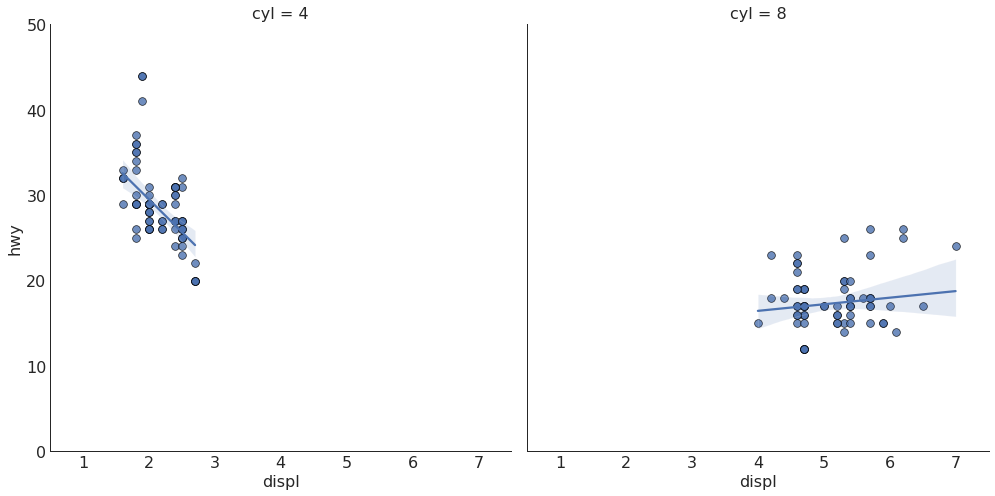

In [ ]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df_select = df.loc[df.cyl.isin([4,8]), :]

# Each line in its own column
sns.set_style("white")
gridobj = sns.lmplot(x="displ", y="hwy", 
                     data=df_select, 
                     height=7, 
                     robust=True, 
                     palette='Set1', 
                     col="cyl",
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.show()

## Column + line timeline
A good way of showing the relationship between an amount (columns) and a rate (line).

In [ ]:
# Data
df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21) })
df.head()



x        y1        y2         y3
0  1  0.380857  1.319855   9.870214
1  2  0.363960  1.293293  12.307216
2  3  0.840005  3.642227  13.790071
3  4 -1.036885  6.519846  14.271088
4  5 -0.879334  4.300404  14.135452

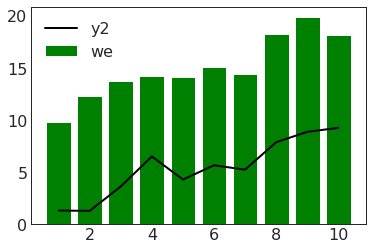

In [ ]:
# multiple line plot
#plt.plot( 'x', 'y1', data=df, color='red', linewidth=4)
plt.plot( 'x', 'y2', data=df, marker='', color='black', linewidth=2)
plt.bar( 'x', 'y3', data=df, color='green', label="we")  
plt.legend();

## Connected scatterplot
Usually used to show how the relationship between 2 variables has changed over time.


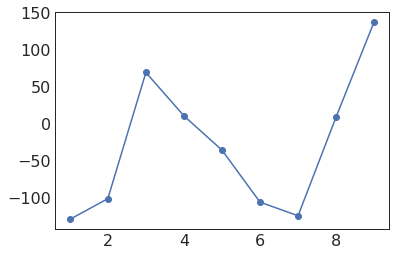

In [ ]:
# data
df=pd.DataFrame({'x': range(1,10), 'y': np.random.randn(9)*80+range(1,10) })
 
# plot
plt.plot( 'x', 'y', data=df, linestyle='-', marker='o')
plt.show()


## Bubble
- Like a scatterplot, but adds additional detail by sizing the circles according to a third variable.
- A bubble plot is very close to a scatterplot. With Matplotlib, we will construct them using the same scatter function. However, we will use the ‘s‘ argument to map a third numerical variable to the size of the marker. This will give us an additive information on the same graphic!

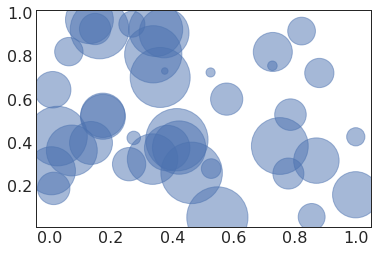

In [ ]:
# create data
x = np.random.rand(40)
y = np.random.rand(40)
z = np.random.rand(40)
 
# use the scatter function
plt.scatter(x, y, s=z*4000, alpha=0.5)
plt.show()


### Map a color to bubble plot

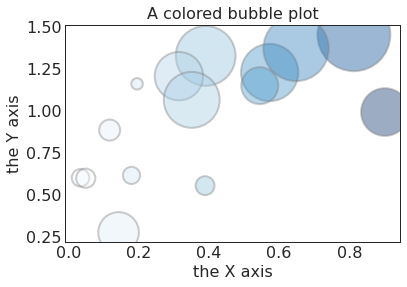

In [ ]:
# create data
x = np.random.rand(15)
y = x+np.random.rand(15)
z = x+np.random.rand(15)
z=z*z
 
# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x, y, s=z*2000, c=x, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)
 
# Add titles (main and on axis)
plt.xlabel("the X axis")
plt.ylabel("the Y axis")
plt.title("A colored bubble plot")
 
plt.show()


## XY heatmap
A good way of showing the patterns between 2 categories of data, less effective at showing fine differences in amounts.

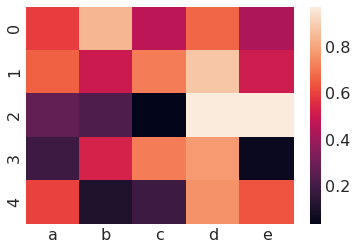

In [ ]:
# Create a dataset (fake)
df = pd.DataFrame(np.random.random((5,5)), columns=["a","b","c","d","e"])
 
# Default heatmap: just a visualization of this square matrix
p1 = sns.heatmap(df)


## Others

### Jittering with stripplot

Often multiple datapoints have exactly the same X and Y values. As a result, multiple points get plotted over each other and hide. To avoid this, jitter the points slightly so you can visually see them. This is convenient to do using seaborn’s stripplot().

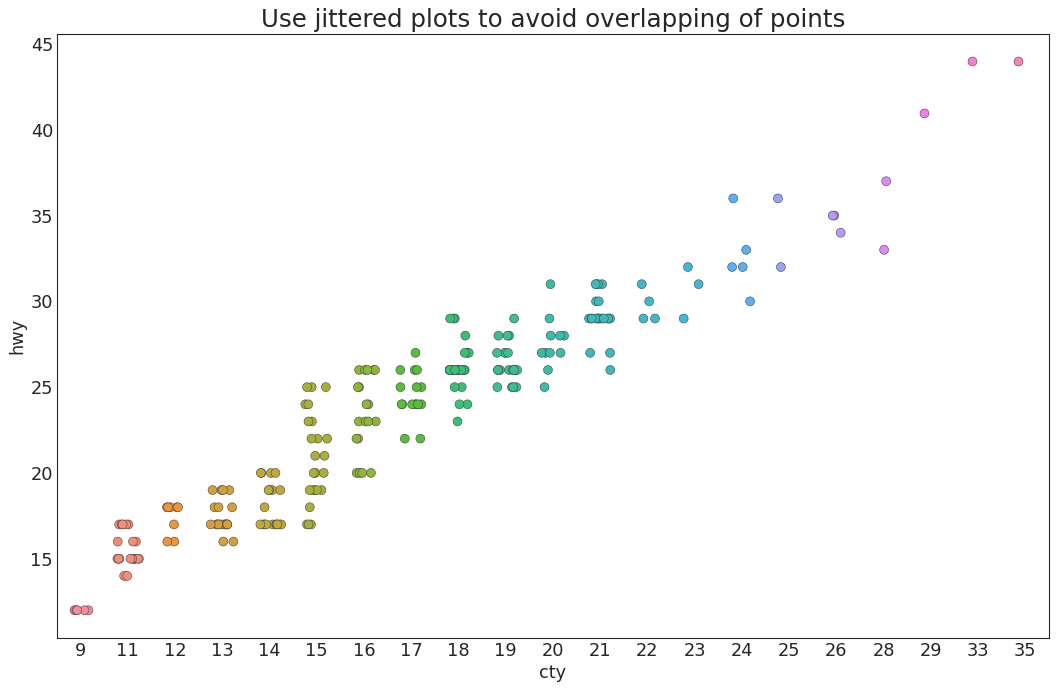

In [ ]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(df.cty, df.hwy, jitter=0.25, size=8, ax=ax, linewidth=.5)

# Decorations
plt.title('Use jittered plots to avoid overlapping of points', fontsize=22)
plt.show()

### Counts Plot

Another option to avoid the problem of points overlap is the increase the size of the dot depending on how many points lie in that spot. So, larger the size of the point more is the concentration of points around that.

In [ ]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df_counts = df.groupby(['hwy', 'cty']).size().reset_index(name='counts')
df_counts
len(df_counts["cty"].values*2)

78

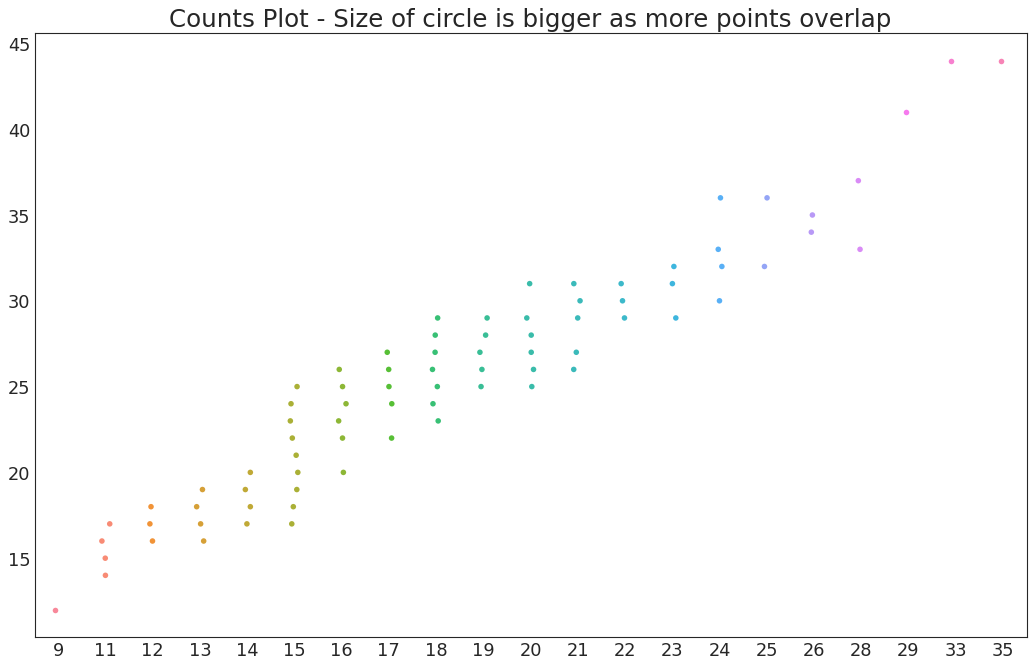

In [ ]:
# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(df_counts.cty.values, df_counts.hwy.values, ax=ax)#, size=df_counts["counts"].values)

# Decorations
plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=22)
plt.show()

### Marginal Histogram

- Marginal histograms have a histogram along the X and Y axis variables. This is used to visualize the relationship between the X and Y along with the univariate distribution of the X and the Y individually. This plot if often used in exploratory data analysis (EDA).

In [ ]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df.head()



manufacturer model  displ  year  cyl       trans drv  cty  hwy fl    class
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
4         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact

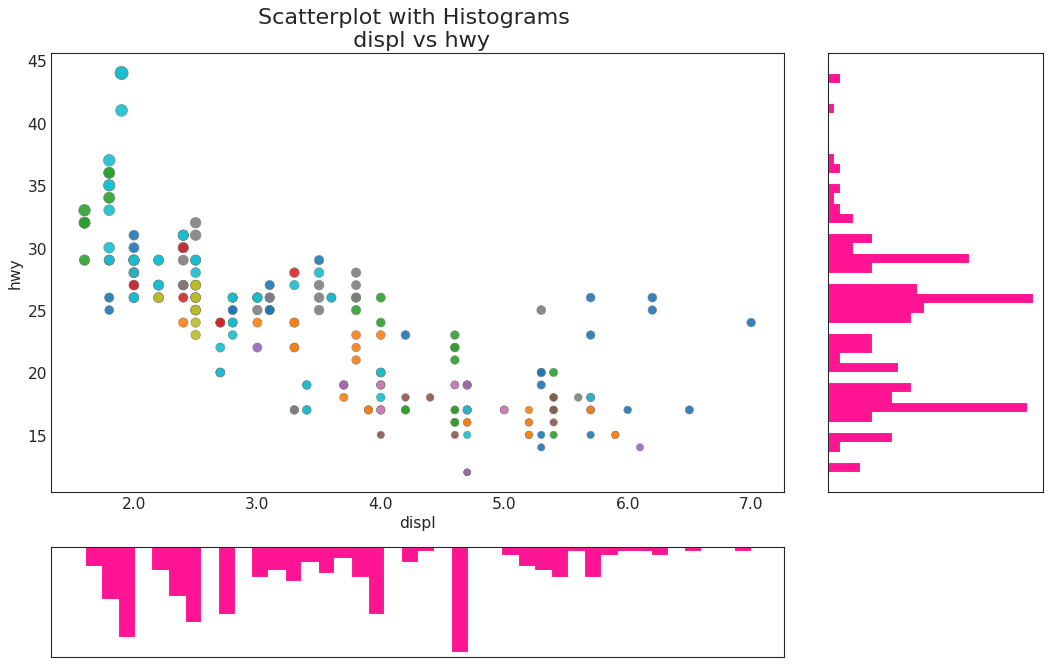

In [ ]:
# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter(
    'displ', 
    'hwy', 
    s=df.cty*4, 
    c=df.manufacturer.astype('category').cat.codes, 
    alpha=.9, 
    data=df, 
    cmap="tab10", 
    edgecolors='gray', 
    linewidths=.5)

# histogram on the right
ax_bottom.hist(
    df.displ, 
    40, 
    histtype='stepfilled', 
    orientation='vertical', 
    color='deeppink')
ax_bottom.invert_yaxis()

# histogram in the bottom
ax_right.hist(
    df.hwy, 
    40, 
    histtype='stepfilled', 
    orientation='horizontal', 
    color='deeppink')


# Decorations
ax_main.set(
    title='Scatterplot with Histograms \n displ vs hwy', 
    xlabel='displ', 
    ylabel='hwy')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)
plt.show()

### Marginal Boxplot


Marginal boxplot serves a similar purpose as marginal histogram. However, the boxplot helps to pinpoint the median, 25th and 75th percentiles of the X and the Y.

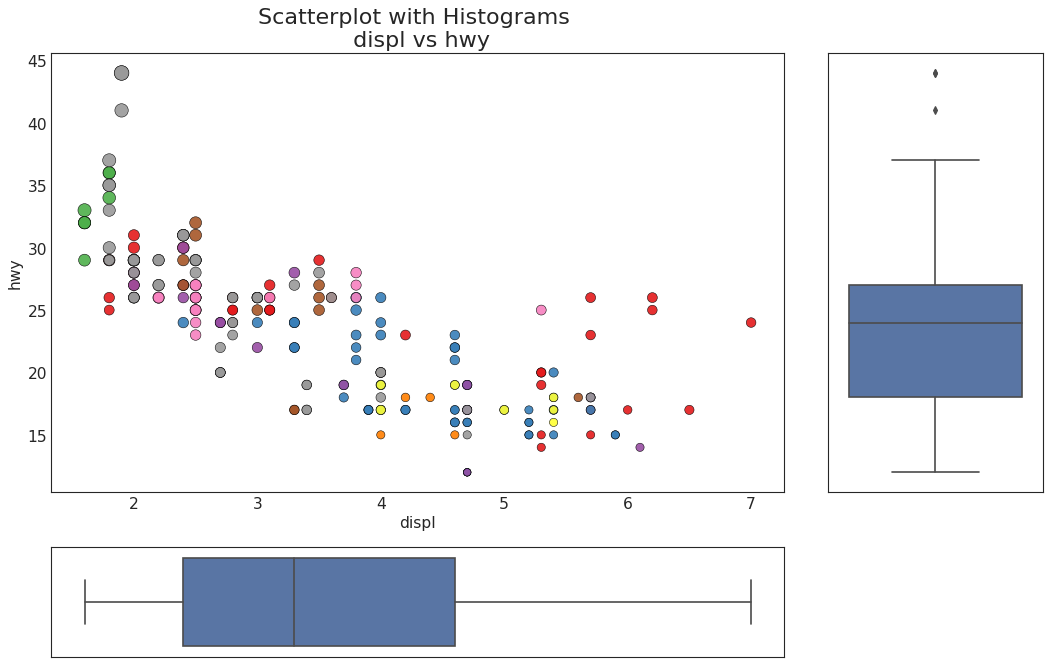

In [ ]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', s=df.cty*5, c=df.manufacturer.astype('category').cat.codes, alpha=.9, data=df, cmap="Set1", edgecolors='black', linewidths=.5)

# Add a graph in each part
sns.boxplot(df.hwy, ax=ax_right, orient="v")
sns.boxplot(df.displ, ax=ax_bottom, orient="h")

# Decorations ------------------
# Remove x axis name for the boxplot
ax_bottom.set(xlabel='')
ax_right.set(ylabel='')

# Main Title, Xlabel and YLabel
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')

# Set font size of different components
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

plt.show()

### Correllogram

- Correlogram is used to visually see the correlation metric between all possible pairs of numeric variables in a given dataframe (or 2D array).

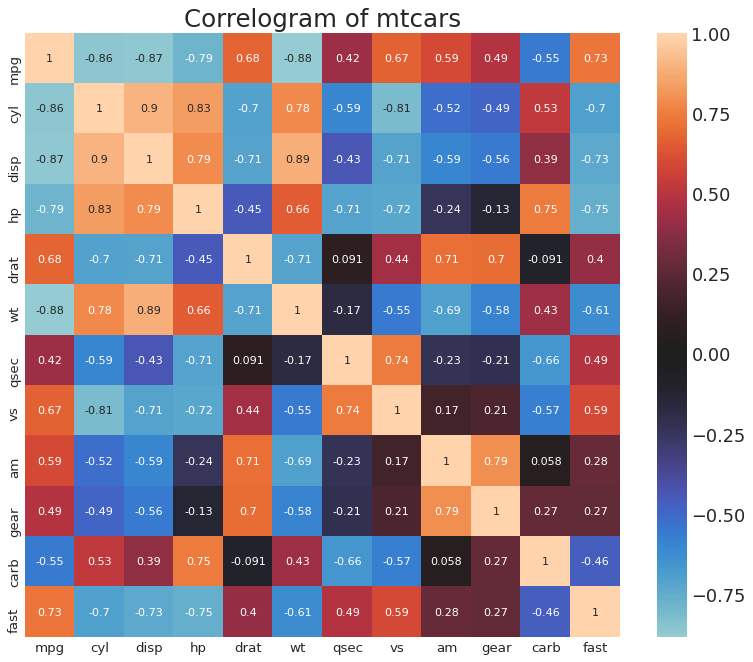

In [ ]:
# Import Dataset
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")

# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns,  center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Pairwise Plot

- Pairwise plot is a favorite in exploratory analysis to understand the relationship between all possible pairs of numeric variables. It is a must have tool for bivariate analysis.

In [ ]:
# Load Dataset
df = sns.load_dataset('iris')
df.sample(10)

sepal_length  sepal_width  petal_length  petal_width     species
148           6.2          3.4           5.4          2.3   virginica
5             5.4          3.9           1.7          0.4      setosa
33            5.5          4.2           1.4          0.2      setosa
97            6.2          2.9           4.3          1.3  versicolor
26            5.0          3.4           1.6          0.4      setosa
9             4.9          3.1           1.5          0.1      setosa
143           6.8          3.2           5.9          2.3   virginica
121           5.6          2.8           4.9          2.0   virginica
49            5.0          3.3           1.4          0.2      setosa
128           6.4          2.8           5.6          2.1   virginica

<Figure size 800x640 with 0 Axes>

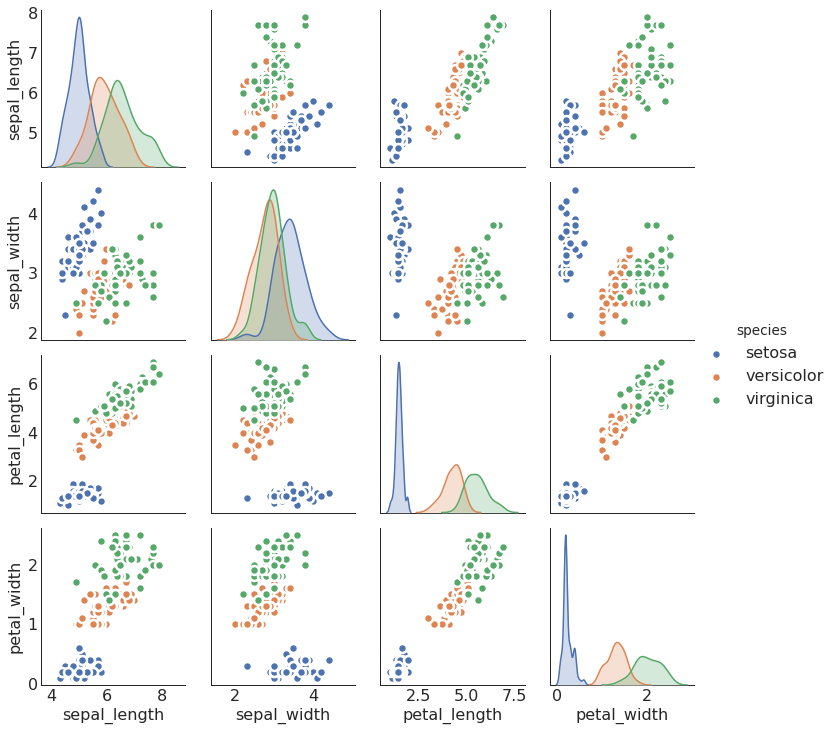

In [ ]:
# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, 
             kind="scatter", 
             hue="species", 
             plot_kws=dict(
                 s=80, 
                 edgecolor="white", 
                 linewidth=2.5))
plt.show();

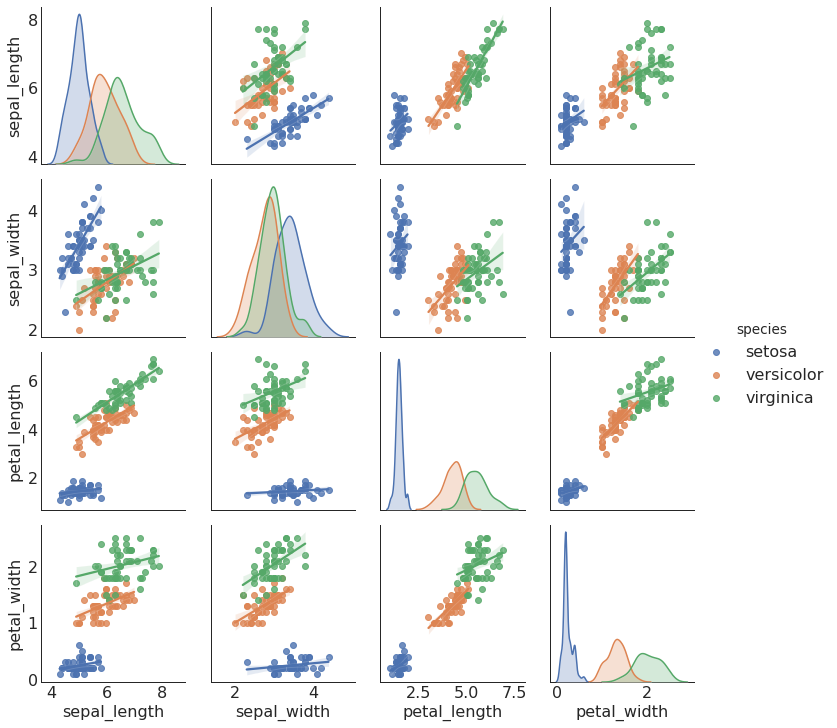

In [ ]:
# Plot
#plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, 
             kind="reg", 
             hue="species")
plt.show();

# 3. Ranking


Use where an item’s position in an ordered list is more important than its absolute or relative value. Don’t be afraid to highlight the points of interest.

## Ordered Bar Chart
Standard bar charts display the ranks of values much more easily when sorted into order.

<Figure size 1008x1152 with 0 Axes>

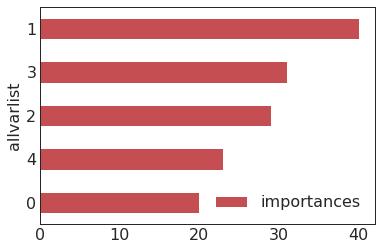

In [ ]:
plt.figure(figsize=(14,16))
df=pd.DataFrame({'allvarlist':range(5),'importances':np.random.randint(50,size=5)})
df.sort_values('importances',inplace=True)
df.plot(kind='barh',y='importances',x='allvarlist',color='r')


- Ordered bar chart conveys the rank order of the items effectively. But adding the value of the metric above the chart, the user gets the precise information from the chart itself.

## Ordered column

In [ ]:
# Prepare Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)
df.head()

manufacturer        cty
0      lincoln  11.333333
1   land rover  11.500000
2        dodge  13.135135
3      mercury  13.250000
4         jeep  13.500000

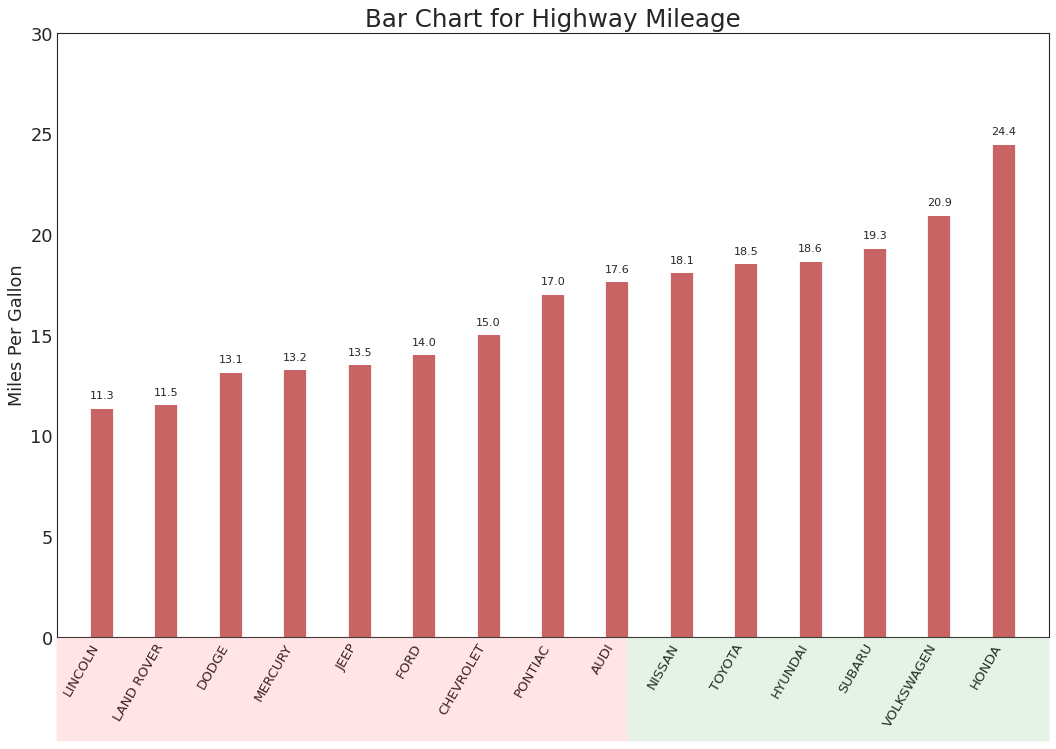

In [ ]:
# Draw plot
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=df.index, ymin=0, ymax=df.cty, color='firebrick', alpha=0.7, linewidth=20)

# Annotate Text
for i, cty in enumerate(df.cty):
    ax.text(i, cty+0.5, round(cty, 1), horizontalalignment='center')


# Title, Label, Ticks and Ylim
ax.set_title('Bar Chart for Highway Mileage', fontdict={'size':22})
ax.set(ylabel='Miles Per Gallon', ylim=(0, 30))
plt.xticks(df.index, df.manufacturer.str.upper(), rotation=60, horizontalalignment='right', fontsize=12)

# Add patches to color the X axis labels
p1 = patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.1, facecolor='green', transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.show()

## Ordered proportional symbol
Use when there are big variations between values and/or seeing fine differences between data is not so important.

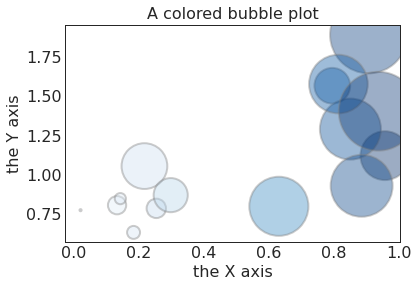

In [ ]:
# create data
x = np.random.rand(15)
y = x+np.random.rand(15)
z = x+np.random.rand(15)
z=z*z
 
# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x, y, s=z*2000, c=x, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)
 
# Add titles (main and on axis)
plt.xlabel("the X axis")
plt.ylabel("the Y axis")
plt.title("A colored bubble plot")
 
plt.show()


## Dot strip plot
Dots placed in order on a strip are a space-efficient method of laying out ranks across multiple categories.

The dot plot conveys the rank order of the items. And since it is aligned along the horizontal axis, you can visualize how far the points are from each other more easily.

In [ ]:
# Prepare Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

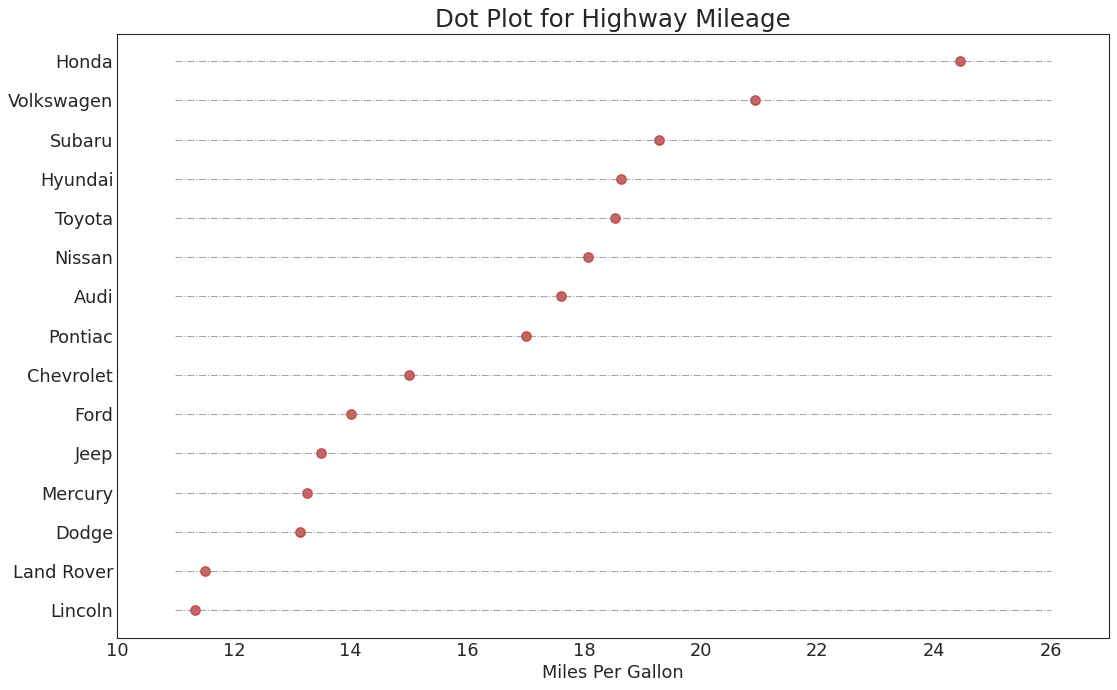

In [ ]:
# Draw plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.hlines(y=df.index, xmin=11, xmax=26, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=df.index, x=df.cty, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Dot Plot for Highway Mileage', fontdict={'size':22})
ax.set_xlabel('Miles Per Gallon')
ax.set_yticks(df.index)
ax.set_yticklabels(df.manufacturer.str.title(), fontdict={'horizontalalignment': 'right'})
ax.set_xlim(10, 27)
plt.show()

## Slope
Perfect for showing how ranks have changed over time or vary between categories.

Slope chart is most suitable for comparing the ‘Before’ and ‘After’ positions of a given person/item

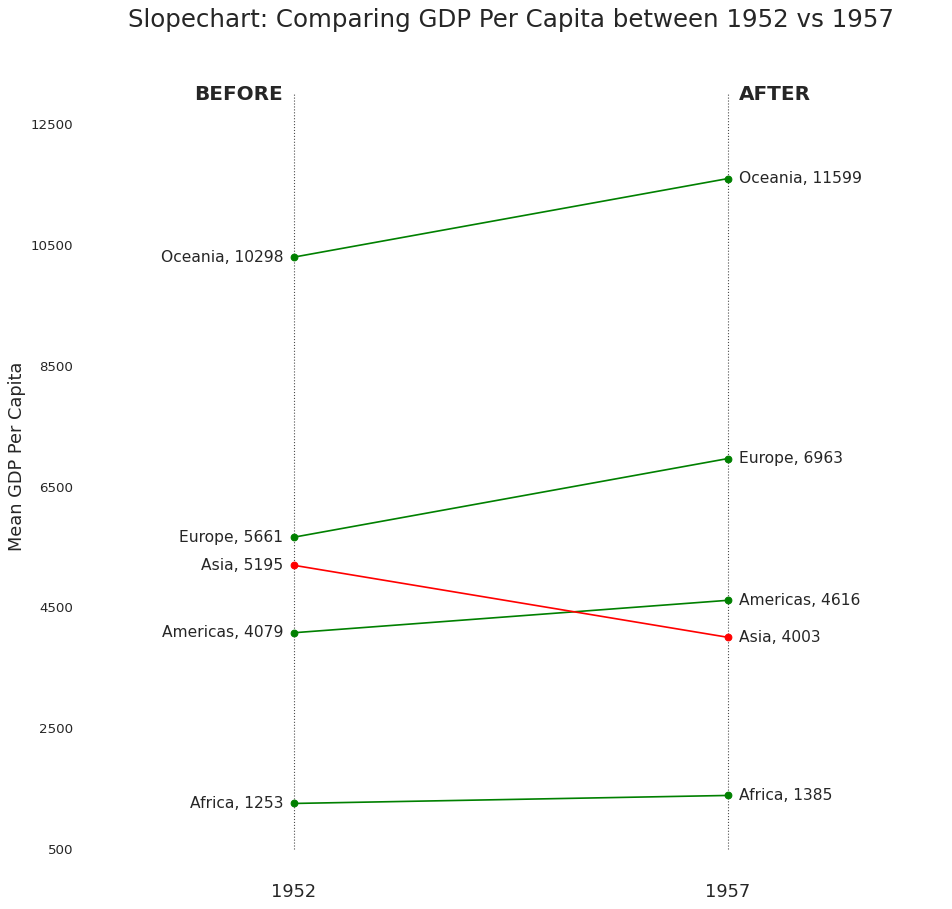

In [ ]:
import matplotlib.lines as mlines
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/gdppercap.csv")

left_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.continent, df['1952'])]
right_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.continent, df['1957'])]
klass = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(df['1952'], df['1957'])]
df.head()
klass
# draw line
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='red' if p1[1]-p2[1] > 0 else 'green', marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(14,14), dpi= 80)

# Vertical Lines
ax.vlines(x=1, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df['1952'], x=np.repeat(1, df.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df['1957'], x=np.repeat(3, df.shape[0]), s=10, color='black', alpha=0.7)

# Line Segmentsand Annotation
for p1, p2, c in zip(df['1952'], df['1957'], df['continent']):
    newline([1,p1], [3,p2])
    ax.text(1-0.05, p1, c + ', ' + str(round(p1)), horizontalalignment='right', verticalalignment='center', fontdict={'size':14})
    ax.text(3+0.05, p2, c + ', ' + str(round(p2)), horizontalalignment='left', verticalalignment='center', fontdict={'size':14})

# 'Before' and 'After' Annotations
ax.text(1-0.05, 13000, 'BEFORE', horizontalalignment='right', verticalalignment='center', fontdict={'size':18, 'weight':700})
ax.text(3+0.05, 13000, 'AFTER', horizontalalignment='left', verticalalignment='center', fontdict={'size':18, 'weight':700})

# Decoration
ax.set_title("Slopechart: Comparing GDP Per Capita between 1952 vs 1957", fontdict={'size':22})
ax.set(xlim=(0,4), ylim=(0,14000), ylabel='Mean GDP Per Capita')
ax.set_xticks([1,3])
ax.set_xticklabels(["1952", "1957"])
plt.yticks(np.arange(500, 13000, 2000), fontsize=12)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()

## Lollipop Chart
Lollipops draw more attention to the data value than standard bar/column and can also show rank and value effectively.

In [ ]:
# Prepare Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)
df.head()

manufacturer        cty
0      lincoln  11.333333
1   land rover  11.500000
2        dodge  13.135135
3      mercury  13.250000
4         jeep  13.500000

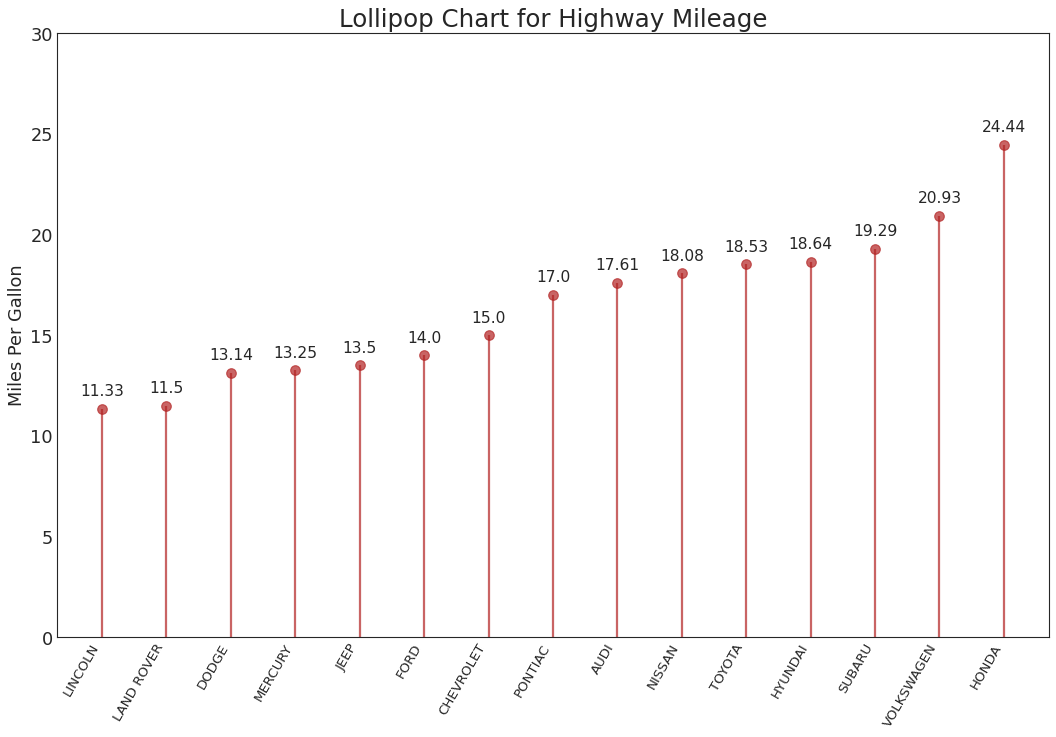

In [ ]:
# Draw plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.vlines(x=df.index, ymin=0, ymax=df.cty, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=df.index, y=df.cty, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Lollipop Chart for Highway Mileage', fontdict={'size':22})
ax.set_ylabel('Miles Per Gallon')
ax.set_xticks(df.index)
ax.set_xticklabels(df.manufacturer.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, 30)

# Annotate
for row in df.itertuples():
    ax.text(row.Index, row.cty+.5, s=round(row.cty, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.show()

## Bump (To be done)
Effective for showing changing rankings across multiple dates. For large datasets, consider grouping lines using colour.

## Others

### Dumbbell Plot

- Dumbbell plot conveys the ‘before’ and ‘after’ positions of various items along with the rank ordering of the items. Its very useful if you want to visualize the effect of a particular project / initiative on different objects.

In [ ]:
import matplotlib.lines as mlines

# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/health.csv")
df.sort_values('pct_2014', inplace=True)
df.reset_index(inplace=True)
df.head()


index           Area  pct_2014  pct_2013
0     25         Boston      0.04      0.04
1     23     Pittsburgh      0.06      0.07
2     22      Baltimore      0.06      0.09
3     24    Minneapolis      0.06      0.08
4     21  San Francisco      0.08      0.11

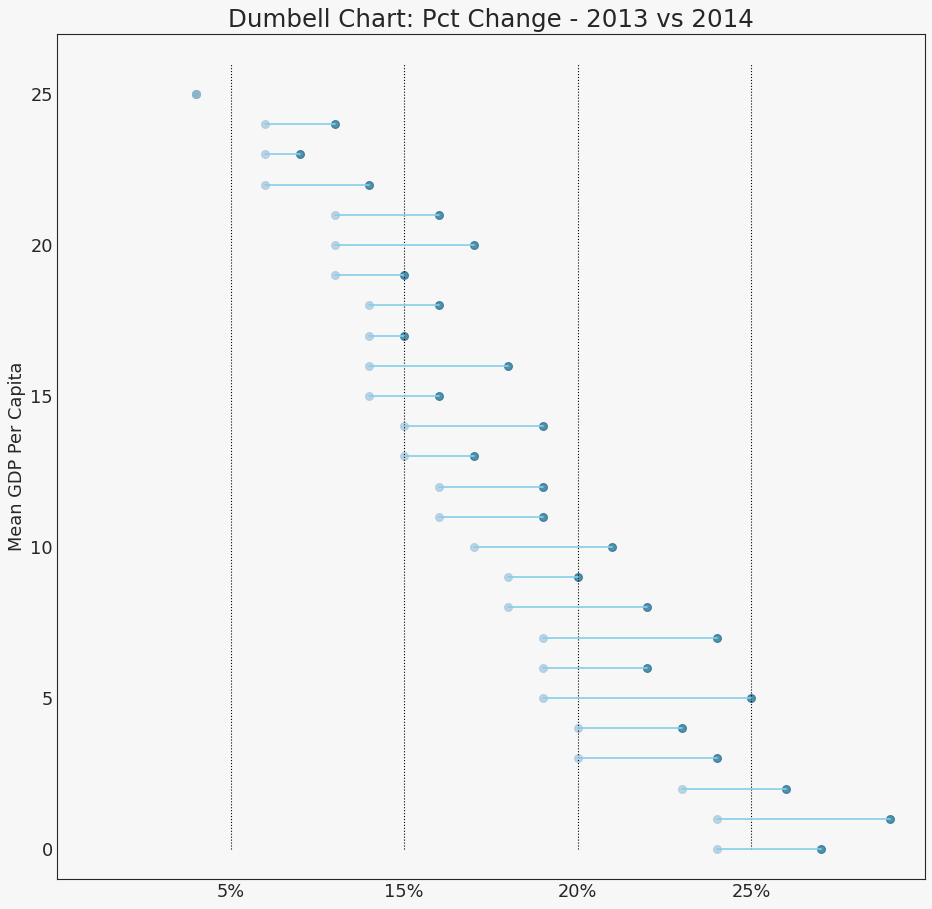

In [ ]:
# Func to draw line segment
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='skyblue')
    ax.add_line(l)
    return l

# Figure and Axes
fig, ax = plt.subplots(1,1,figsize=(14,14), facecolor='#f7f7f7', dpi= 80)

# Vertical Lines
ax.vlines(x=.05, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.10, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.15, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.20, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df['index'], x=df['pct_2013'], s=50, color='#0e668b', alpha=0.7)
ax.scatter(y=df['index'], x=df['pct_2014'], s=50, color='#a3c4dc', alpha=0.7)

# Line Segments
for i, p1, p2 in zip(df['index'], df['pct_2013'], df['pct_2014']):
    newline([p1, i], [p2, i])

# Decoration
ax.set_facecolor('#f7f7f7')
ax.set_title("Dumbell Chart: Pct Change - 2013 vs 2014", fontdict={'size':22})
ax.set(xlim=(0,.25), ylim=(-1, 27), ylabel='Mean GDP Per Capita')
ax.set_xticks([.05, .1, .15, .20])
ax.set_xticklabels(['5%', '15%', '20%', '25%'])
ax.set_xticklabels(['5%', '15%', '20%', '25%'])    
plt.show()

# 4. Distribution


Show values in a dataset and how often they occur. The shape (or ‘skew’) of a distribution can be a memorable way of highlighting the lack of uniformity or equality in the data.

## Histogram for Continuous Variable
The standard way to show a statistical distribution - keep the gaps between columns small to highlight the ‘shape’ of the data.

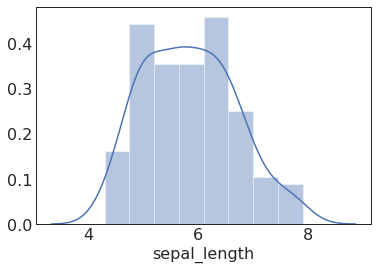

In [ ]:
df = sns.load_dataset('iris')
 
# Make default histogram of sepal length
sns.distplot( df["sepal_length"] )
plt.show()
 



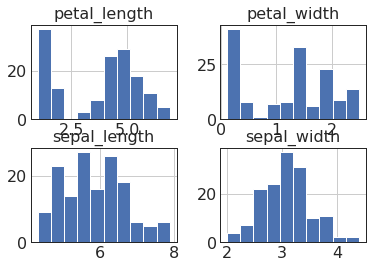

In [ ]:
df.hist();

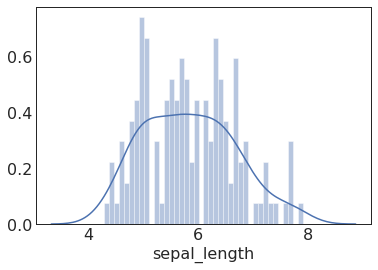

In [ ]:
# Control the number of bins
sns.distplot( df["sepal_length"], bins=40,  )
plt.show()

## Dot plot
A simple way of showing the change or range (min/max) of data across multiple categories.

In [ ]:
# Create a dataframe
value1=np.random.uniform(size=20)
value2=value1+np.random.uniform(size=20)/4
df = pd.DataFrame({'group':list(map(chr, range(65, 85))), 'value1':value1 , 'value2':value2 })
 



In [ ]:
# Reorder it following the values of the first value:
ordered_df = df.sort_values(by='value1')
my_range=range(1,len(df.index)+1)
 


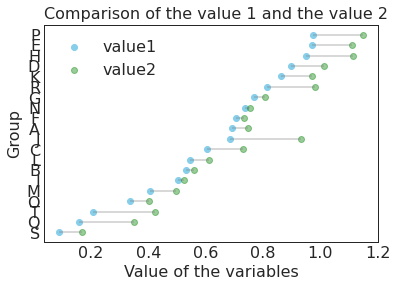

In [ ]:
# The vertical plot is made using the hline function

plt.hlines(y=my_range, xmin=ordered_df['value1'], xmax=ordered_df['value2'], color='grey', alpha=0.4)
plt.scatter(ordered_df['value1'], my_range, color='skyblue', alpha=1, label='value1')
plt.scatter(ordered_df['value2'], my_range, color='green', alpha=0.4 , label='value2')
plt.legend();
 # Add title and axis names
plt.yticks(my_range, ordered_df['group'])
plt.title("Comparison of the value 1 and the value 2", loc='left')
plt.xlabel('Value of the variables')
plt.ylabel('Group');


## Dot strip plot
Good for showing individual values in a distribution, can be a problem when too many dots have the same value.

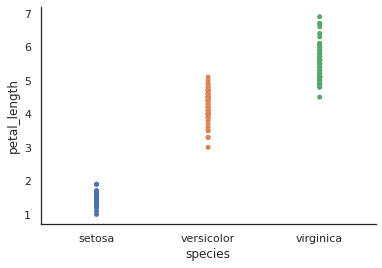

In [ ]:
iris = sns.load_dataset('iris')
sns.set(style="white", color_codes=True)
sns.stripplot(x='species', y='petal_length', data=iris,  jitter=False)
sns.despine()

In [ ]:

sns.set(style="whitegrid")
tips = sns.load_dataset("tips")


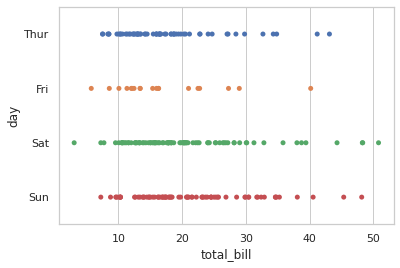

In [ ]:
ax = sns.stripplot(y="day", x="total_bill", data=tips, jitter=False)

## Boxplot
Summarise multiple distributions by showing the median (centre) and range of the data

Box plots are a great way to visualize the distribution, keeping the median, 25th 75th quartiles and the outliers in mind. However, you need to be careful about interpreting the size the boxes which can potentially distort the number of points contained within that group. So, manually providing the number of observations in each box can help overcome this drawback.

For example, the first two boxes on the left have boxes of the same size even though they have 5 and 47 obs respectively. So writing the number of observations in that group becomes necessary.

In [ ]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df.head()

manufacturer model  displ  year  cyl       trans drv  cty  hwy fl    class
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
4         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact

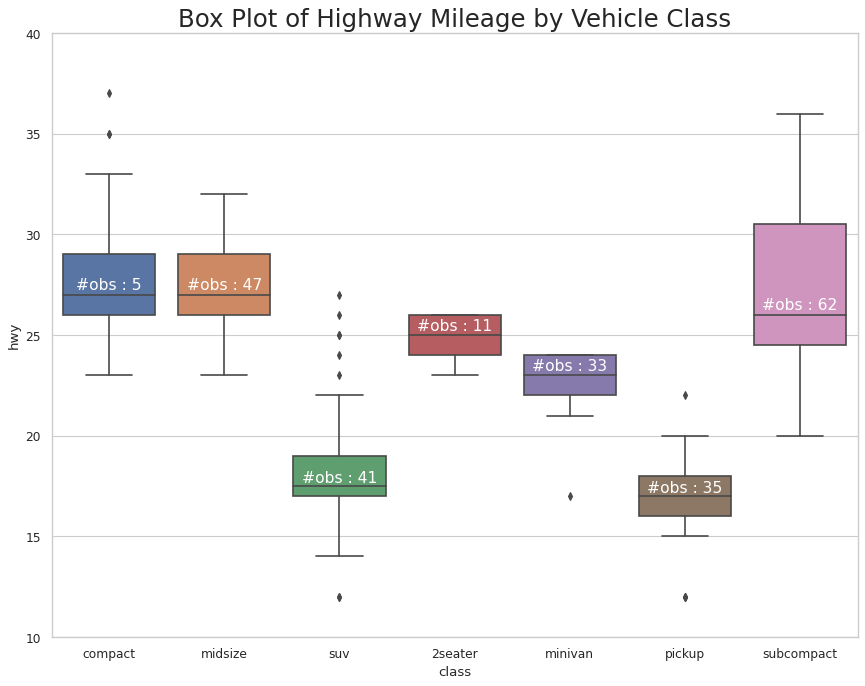

In [ ]:
# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='class', y='hwy', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values
    for (x, xticklabel), n_ob in zip(enumerate(xticklabels), n_obs):
        plt.text(x, medians_dict[xticklabel]*1.01, "#obs : "+str(n_ob), horizontalalignment='center', fontdict={'size':14}, color='white')

add_n_obs(df,group_col='class',y='hwy')    

# Decoration
plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.ylim(10, 40)
plt.show()

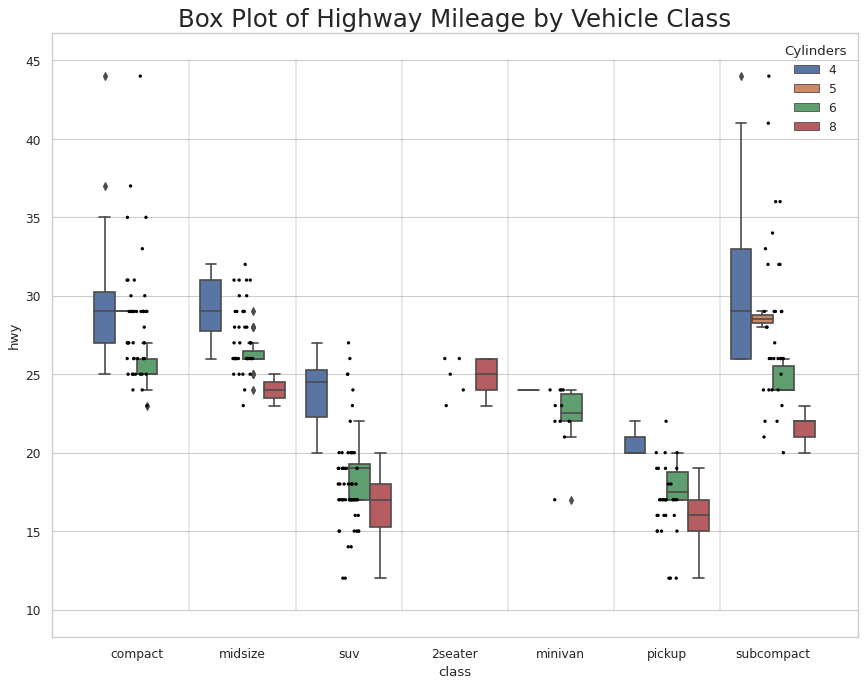

In [ ]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df.head()
# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='class', y='hwy', data=df, hue='cyl')
sns.stripplot(x='class', y='hwy', data=df, color='black', size=3, jitter=1)

for i in range(len(df['class'].unique())-1):
    plt.vlines(i+.5, 10, 45, linestyles='solid', colors='gray', alpha=0.2)

# Decoration
plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.legend(title='Cylinders')
plt.show()



## Violin Plot
Similar to a box plot but more effective with complex distributions (data that cannot be summarised with simple average).

- Violin plot is a visually pleasing alternative to box plots. The shape or area of the violin depends on the number of observations it holds. However, the violin plots can be harder to read and it not commonly used in professional settings.

In [ ]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df.head()


manufacturer model  displ  year  cyl       trans drv  cty  hwy fl    class
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
4         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact

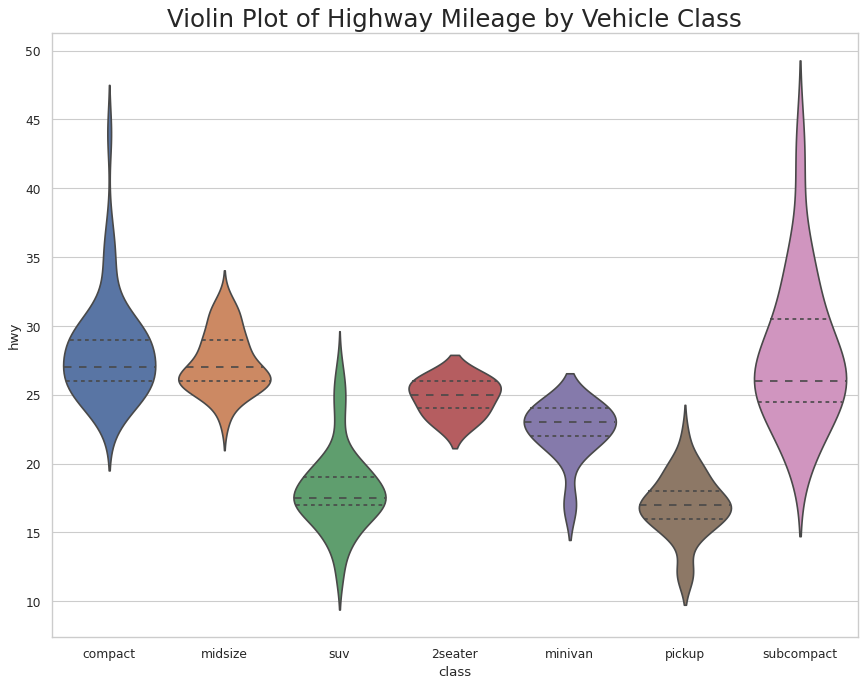

In [ ]:
# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.violinplot(x='class', y='hwy', data=df, scale='width', inner='quartile')

# Decoration
plt.title('Violin Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.show()

## Population pyramid
A standard way for showing the age and sex breakdown of a population distribution; effectively, back to back histograms.

- Population pyramid can be used to show either the distribution of the groups ordered by the volumne. Or it can also be used to show the stage-by-stage filtering of the population as it is used below to show how many people pass through each stage of a marketing funnel.

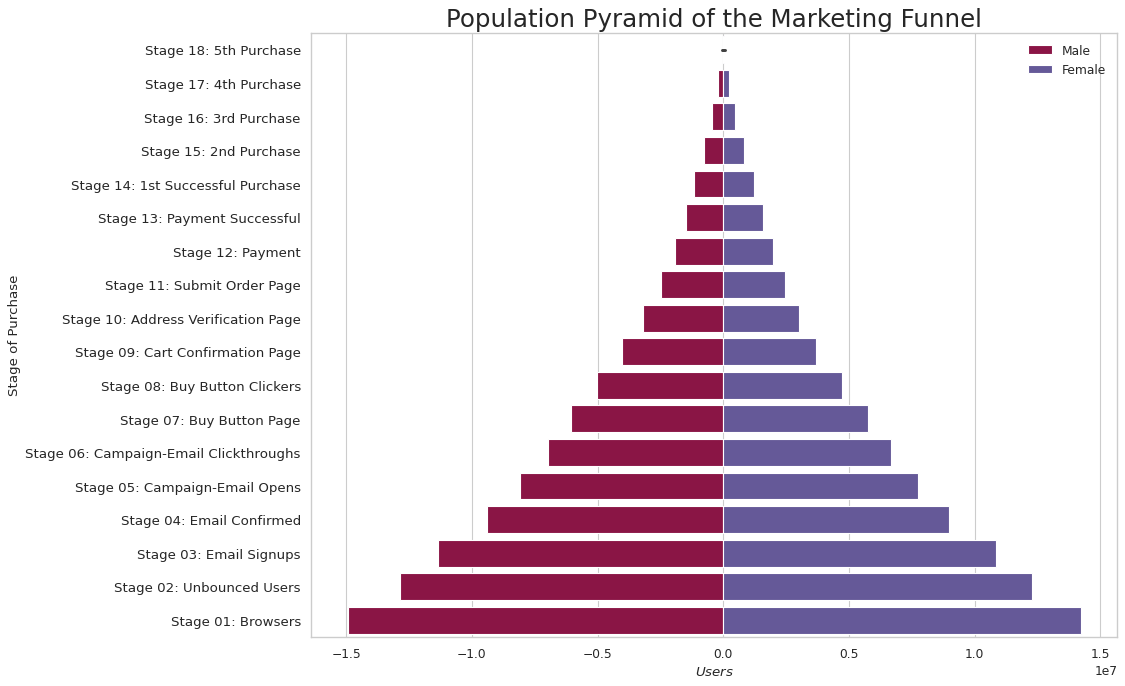

In [ ]:
# Read data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/email_campaign_funnel.csv")
df.sample(10)
# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
group_col = 'Gender'
order_of_bars = df.Stage.unique()[::-1]
colors = [plt.cm.Spectral(i/float(len(df[group_col].unique())-1)) for i in range(len(df[group_col].unique()))]

for c, group in zip(colors, df[group_col].unique()):
    sns.barplot(x='Users', y='Stage', data=df.loc[df[group_col]==group, :], order=order_of_bars, color=c, label=group)

# Decorations    
plt.xlabel("$Users$")
plt.ylabel("Stage of Purchase")
plt.yticks(fontsize=12)
plt.title("Population Pyramid of the Marketing Funnel", fontsize=22)
plt.legend()
plt.show()

## Cumulative curve
A good way of showing how unequal a distribution is: y axis is always cumulative frequency, x axis is always a measure.

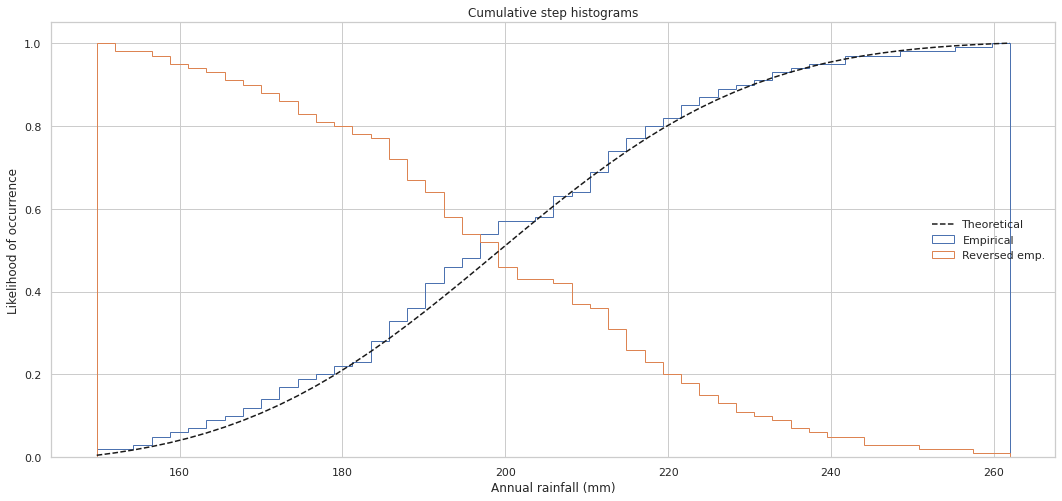

In [ ]:
np.random.seed(1801)

mu = 200
sigma = 25
n_bins = 50
x = np.random.normal(mu, sigma, size=100)

fig, ax = plt.subplots(figsize=(18, 8))

# plot the cumulative histogram
n, bins, patches = ax.hist(x, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical')

# Add a line showing the expected distribution.
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
y = y.cumsum()
y /= y[-1]

ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')

# Overlay a reversed cumulative histogram.
ax.hist(x, bins=bins, density=True, histtype='step', cumulative=-1,
        label='Reversed emp.')

# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms')
ax.set_xlabel('Annual rainfall (mm)')
ax.set_ylabel('Likelihood of occurrence')

plt.show()

## Frequency polygons (pending)
For displaying multiple distributions of data. Like a regular line chart, best limited to a maximum of 3 or 4 datasets.

## Beeswarm
- Use to emphasise individual points in a distribution. Points can be sized to an additional variable. Best with medium- sized datasets

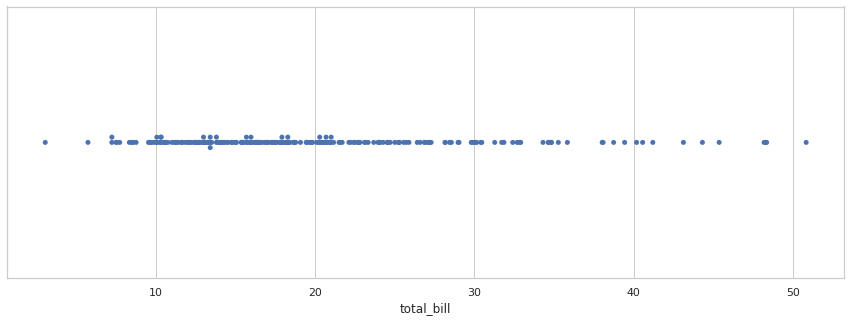

In [ ]:
plt.figure(figsize=(15,5))
tips = sns.load_dataset("tips")
ax = sns.swarmplot(x=tips["total_bill"])

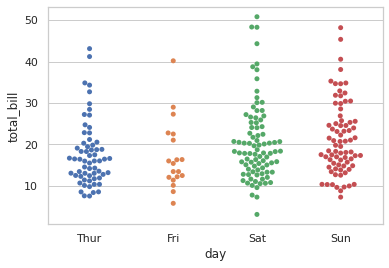

In [ ]:
ax = sns.swarmplot(x="day", y="total_bill", data=tips)

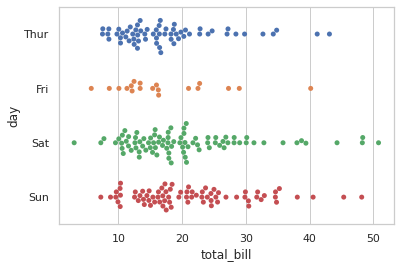

In [ ]:
ax = sns.swarmplot(x="total_bill", y="day", data=tips)

## Others - Distribution

### Dot + Box

Dot + Box plot Conveys similar information as a boxplot split in groups. The dots, in addition, gives a sense of how many data points lie within each group.

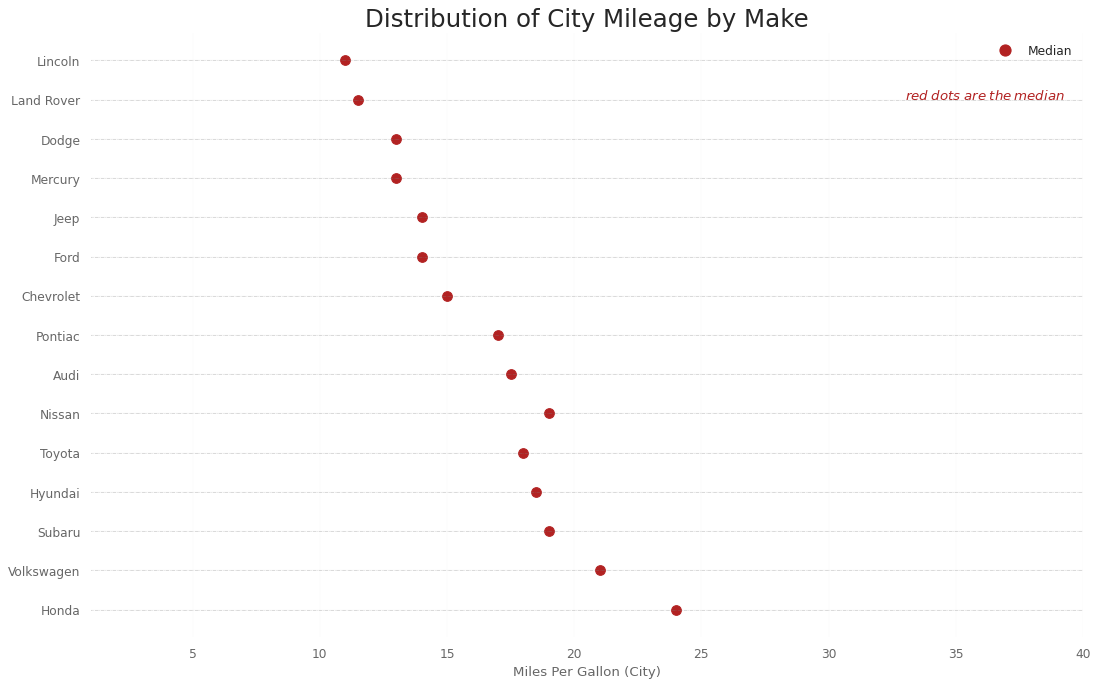

In [ ]:
# Import Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df_raw.head()
# Mean and Median city mileage by make
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', ascending=False, inplace=True)
df.reset_index(inplace=True)
df_median = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.median())

# Draw horizontal lines
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.hlines(y=df.index, xmin=0, xmax=40, color='gray', alpha=0.5, linewidth=.5, linestyles='dashdot')

# Draw the Dots
for i, make in enumerate(df.manufacturer):
    df_make = df_raw.loc[df_raw.manufacturer==make, :]
    #ax.scatter(y=np.repeat(i, df_make.shape[0]), x='cty', data=df_make, s=75, edgecolors='gray', c='w', alpha=0.5)
    ax.scatter(y=i, x='cty', data=df_median.loc[df_median.index==make, :], s=75, c='firebrick')

# Annotate    
ax.text(33, 13, "$red \; dots \; are \; the \: median$", fontdict={'size':12}, color='firebrick')

# Decorations
red_patch = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='firebrick', label="Median")
plt.legend(handles=red_patch)
ax.set_title('Distribution of City Mileage by Make', fontdict={'size':22})
ax.set_xlabel('Miles Per Gallon (City)', alpha=0.7)
ax.set_yticks(df.index)
ax.set_yticklabels(df.manufacturer.str.title(), fontdict={'horizontalalignment': 'right'}, alpha=0.7)
ax.set_xlim(1, 40)
plt.xticks(alpha=0.7)
plt.gca().spines["top"].set_visible(False)    
plt.gca().spines["bottom"].set_visible(False)    
plt.gca().spines["right"].set_visible(False)    
plt.gca().spines["left"].set_visible(False)   
plt.grid(axis='both', alpha=.4, linewidth=.1)
plt.show()

### Histogram for Continuous Variable

- Histogram shows the frequency distribution of a given variable. The below representation groups the frequency bars based on a categorical variable giving a greater insight about the continuous variable and the categorical variable in tandem.

In [ ]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df.head()

manufacturer model  displ  year  cyl       trans drv  cty  hwy fl    class
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
4         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact

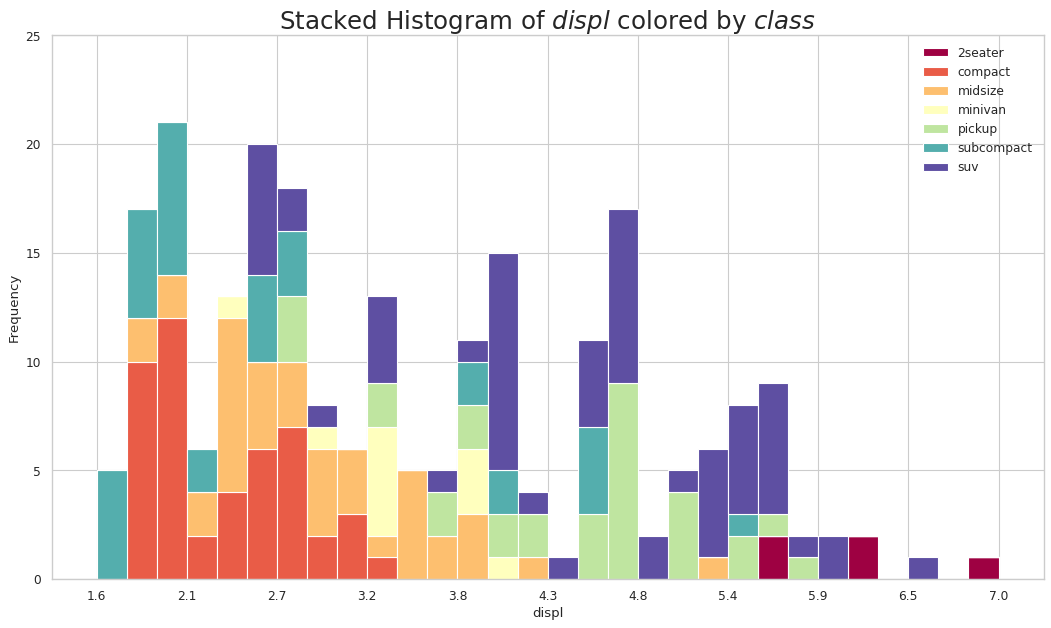

In [ ]:

# Prepare data
x_var = 'displ'
groupby_var = 'class'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 25)
plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])
plt.show()

### Histogram for Categorical Variable

- The histogram of a categorical variable shows the frequency distribution of a that variable. By coloring the bars, you can visualize the distribution in connection with another categorical variable representing the colors.

In [ ]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df.head()

manufacturer model  displ  year  cyl       trans drv  cty  hwy fl    class
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
4         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact

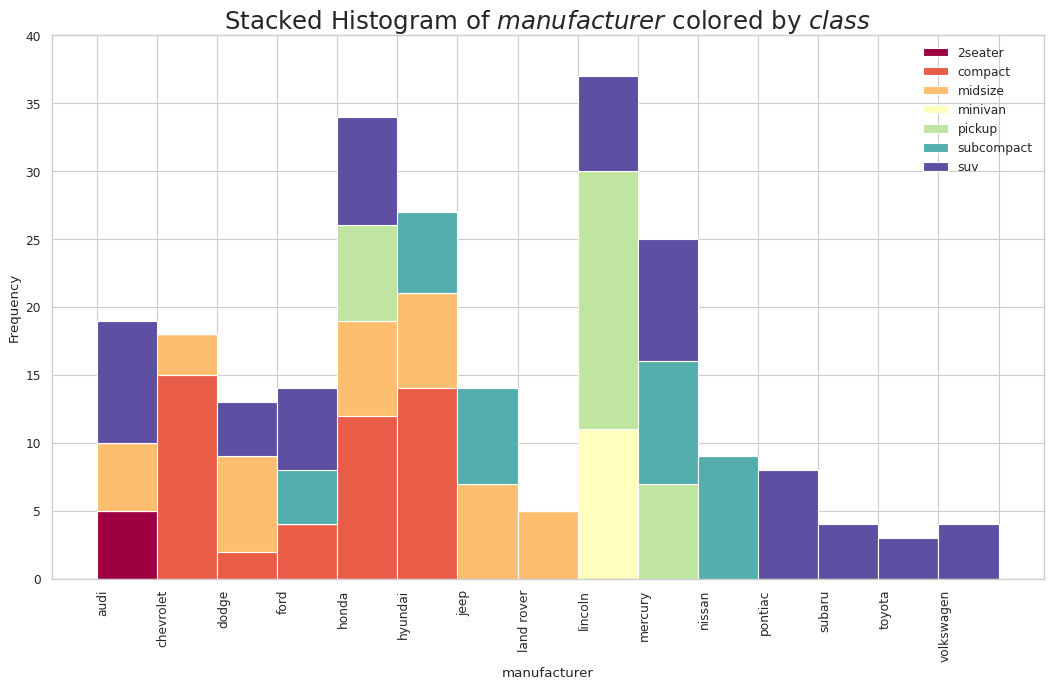

In [ ]:
# Prepare data
x_var = 'manufacturer'
groupby_var = 'class'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, df[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 40)
plt.xticks(ticks=bins, labels=np.unique(df[x_var]).tolist(), rotation=90, horizontalalignment='left')
plt.show()

### Density Plot

- Density plots are a commonly used tool visualise the distribution of a continuous variable. By grouping them by the ‘response’ variable, you can inspect the **relationship between the X and the Y**. - The below case if for representational purpose to describe how the distribution of city mileage varies with respect the number of cylinders.

In [ ]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df.head()

manufacturer model  displ  year  cyl       trans drv  cty  hwy fl    class
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
4         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact

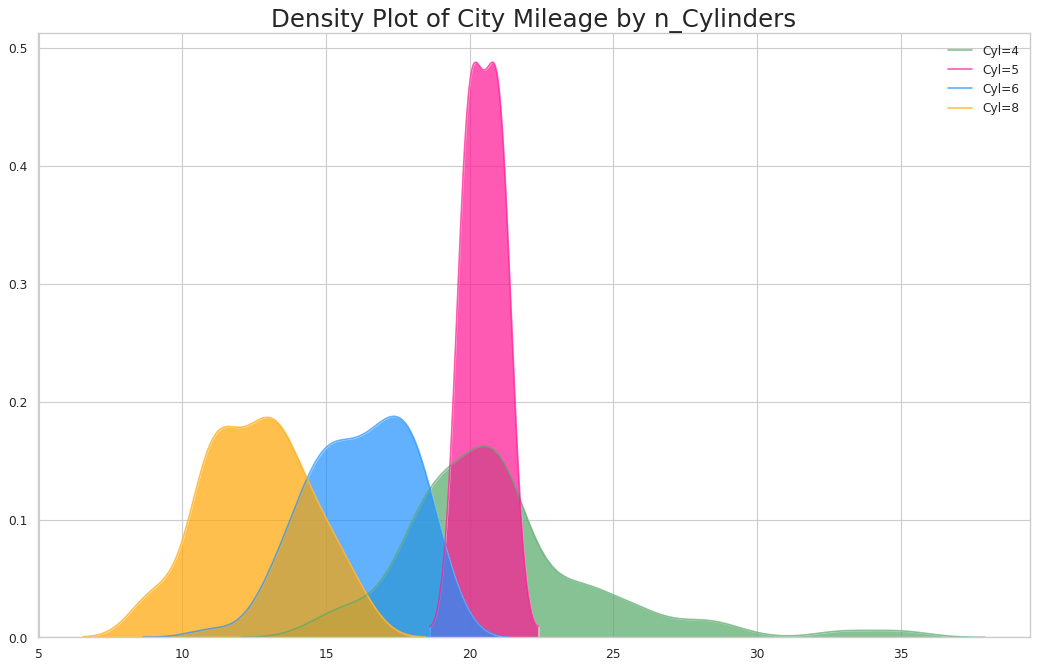

In [ ]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(df.loc[df['cyl'] == 4, "cty"], shade=True, color="g", label="Cyl=4", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 5, "cty"], shade=True, color="deeppink", label="Cyl=5", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 6, "cty"], shade=True, color="dodgerblue", label="Cyl=6", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 8, "cty"], shade=True, color="orange", label="Cyl=8", alpha=.7)

# Decoration
plt.title('Density Plot of City Mileage by n_Cylinders', fontsize=22)
plt.legend()
plt.show()

### Density Curves with Histogram


- Density curve with histogram brings together the collective information conveyed by the two plots so you can have them both in a single figure instead of two.

In [ ]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df.head()

manufacturer model  displ  year  cyl       trans drv  cty  hwy fl    class
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
4         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact

In [ ]:
df["class"].unique()

array(['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup',
       'subcompact'], dtype=object)

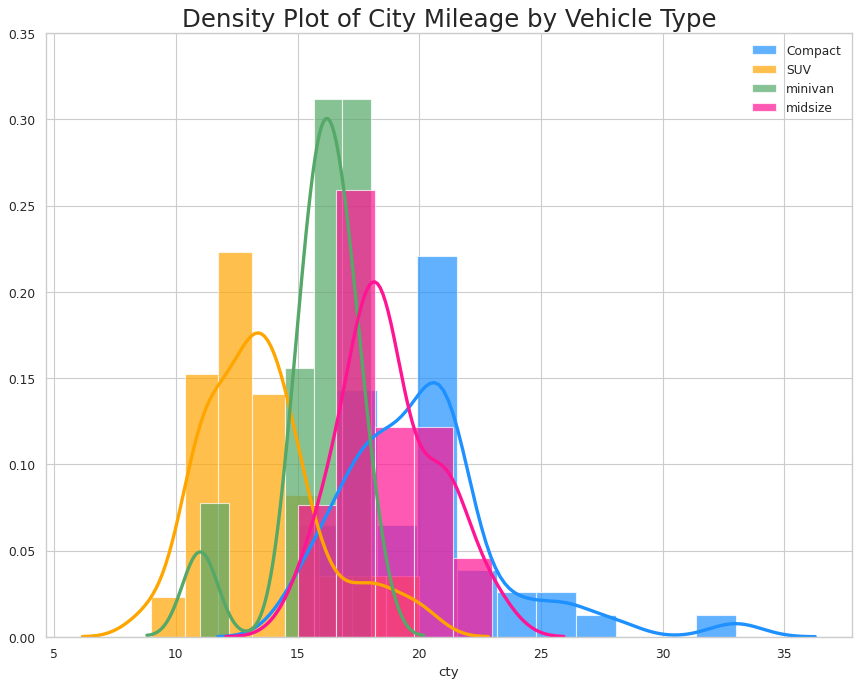

In [ ]:
# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.distplot(df.loc[df['class'] == 'compact', "cty"], color="dodgerblue", label="Compact", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['class'] == 'suv', "cty"], color="orange", label="SUV", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['class'] == 'minivan', "cty"], color="g", label="minivan", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['class'] == 'midsize', "cty"], color="deeppink", label="midsize", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
plt.ylim(0, 0.35)

# Decoration
plt.title('Density Plot of City Mileage by Vehicle Type', fontsize=22)
plt.legend()
plt.show()

### Joy Plot

- Joy Plot allows the density curves of different groups to overlap, it is a great way to visualize the distribution of a larger number of groups in relation to each other. It looks pleasing to the eye and conveys just the right information clearly. It can be easily built using the joypy package which is based on matplotlib.

In [ ]:
!pip install joypy
import joypy

In [ ]:
# Import Data
mpg = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

<Figure size 1280x800 with 0 Axes>

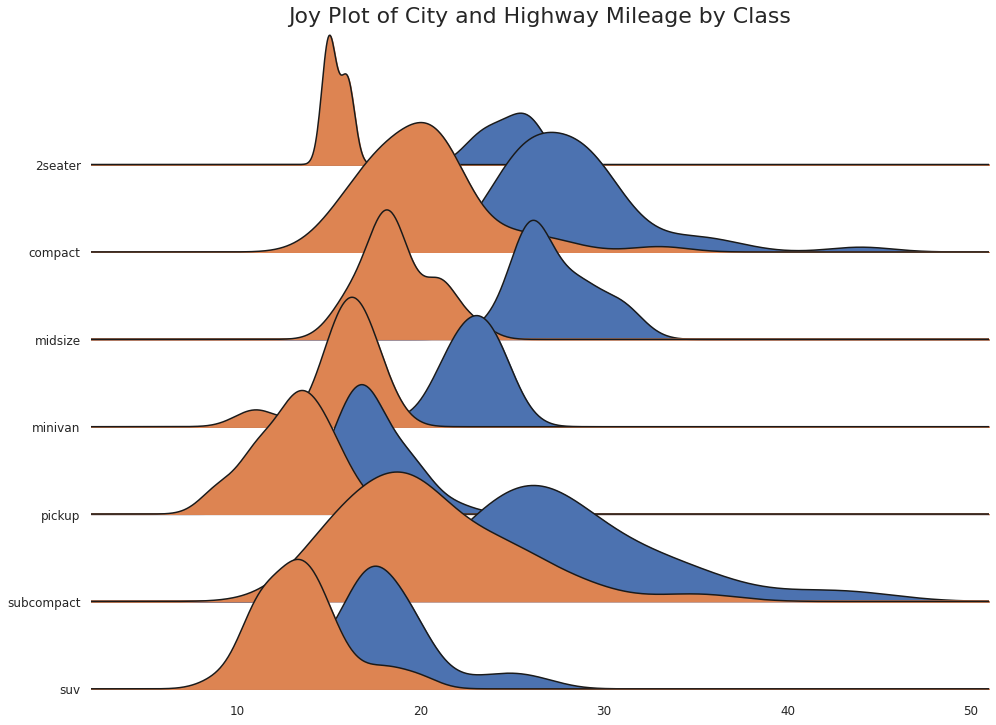

In [ ]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(mpg, column=['hwy', 'cty'], by="class", ylim='own', figsize=(14,10))

# Decoration
plt.title('Joy Plot of City and Highway Mileage by Class', fontsize=22)
plt.show()

### Distributed Dot Plot

- Distributed dot plot shows the univariate distribution of points segmented by groups. The darker the points, more is the concentration of data points in that region. By coloring the median differently, the real positioning of the groups becomes apparent instantly.

In [ ]:
import matplotlib.patches as mpatches

# Prepare Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
cyl_colors = {4:'tab:red', 5:'tab:green', 6:'tab:blue', 8:'tab:orange'}
df_raw['cyl_color'] = df_raw.cyl.map(cyl_colors)
df_raw.head()


manufacturer model  displ  year  cyl  ... cty hwy  fl    class cyl_color
0         audi    a4    1.8  1999    4  ...  18  29   p  compact   tab:red
1         audi    a4    1.8  1999    4  ...  21  29   p  compact   tab:red
2         audi    a4    2.0  2008    4  ...  20  31   p  compact   tab:red
3         audi    a4    2.0  2008    4  ...  21  30   p  compact   tab:red
4         audi    a4    2.8  1999    6  ...  16  26   p  compact  tab:blue

[5 rows x 12 columns]

### Dot + Box Plot

### Categorical Plots

Categorical plots provided by the seaborn library can be used to visualize the counts distribution of 2 ore more categorical variables in relation to each other.

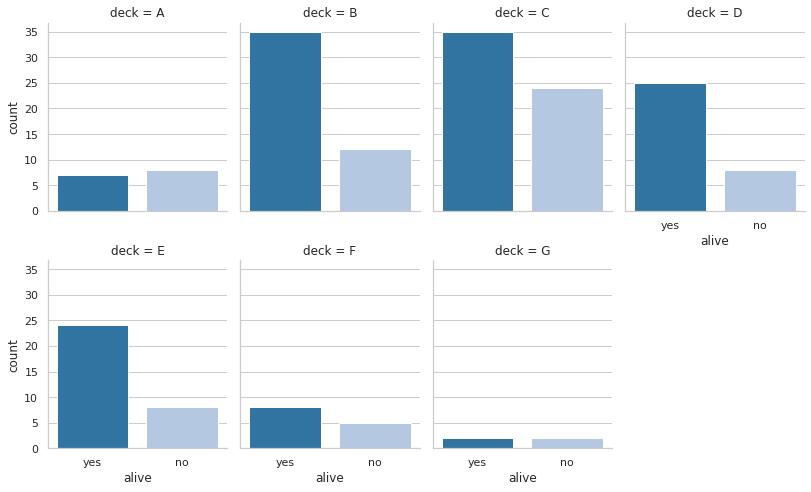

In [ ]:
# Load Dataset
titanic = sns.load_dataset("titanic")

# Plot
g = sns.catplot("alive", col="deck", col_wrap=4,
                data=titanic[titanic.deck.notnull()],
                kind="count", height=3.5, aspect=.8, 
                palette='tab20')

fig.suptitle('sf')
plt.show()

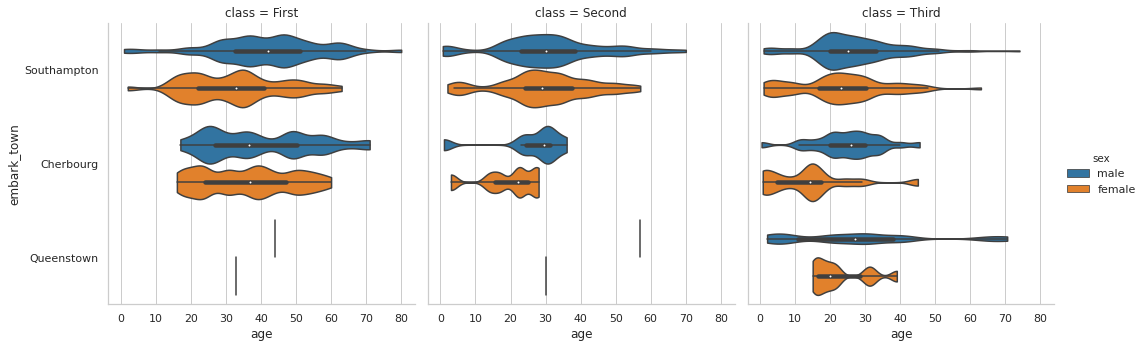

In [ ]:
# Load Dataset
titanic = sns.load_dataset("titanic")

# Plot
sns.catplot(x="age", y="embark_town",
            hue="sex", col="class",
            data=titanic[titanic.embark_town.notnull()],
            orient="h", height=5, aspect=1, palette="tab10",
            kind="violin", dodge=True, cut=0, bw=.2);

### Marginal Plot

- A marginal plot allows to study the **relationship between 2 numeric variables**. 
 - The central chart display their correlation. 
    - It is usually a scatterplot, a hexbin plot, a 2D histogram or a 2D density plot. 
    - The marginal charts, usually at the top and at the right, show the distribution of the 2 variables using histogram or density plot.

- The seaborn library provides a joint plot function that is really handy to make this type of graphic. 
- The top graph shows it default behaviour, and here are a few possible customizations. 
- Seaborn has a nice documentation and some of these examples come from there.

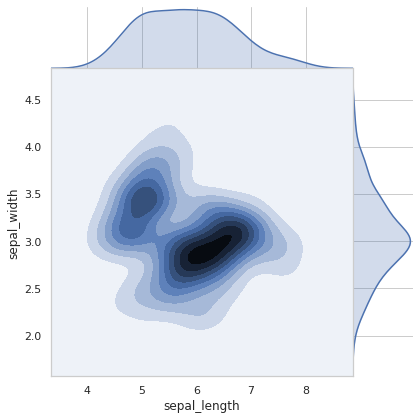

In [ ]:
# library & dataset
import seaborn as sns
df = sns.load_dataset('iris')
 
# No space
sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='kde', space=0);

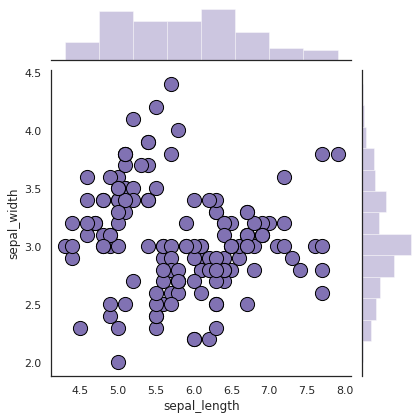

In [ ]:
# Then you can pass arguments to each type:
sns.set(style="white", color_codes=True)
sns.jointplot(
    x=df["sepal_length"], 
    y=df["sepal_width"], 
    kind='scatter', 
    s=200, 
    color='m', 
    edgecolor="black", 
    linewidth=1)


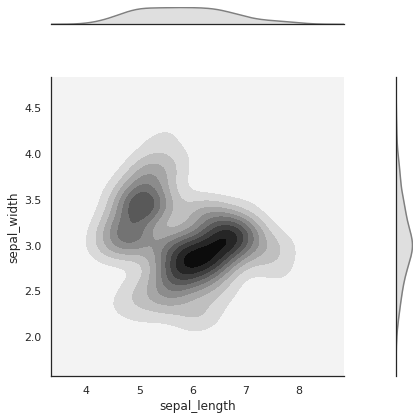

In [ ]:
# Huge space
sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='kde', color="grey", space=3)

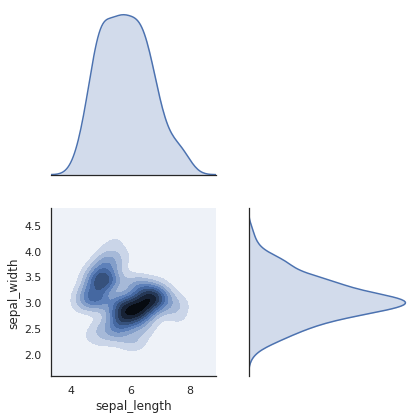

In [ ]:
# Make marginal bigger:
sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='kde',ratio=1)

### 3D Surface Chart

In [ ]:
# library
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
 
# Get the data (csv file is hosted on the web)
url = 'https://python-graph-gallery.com/wp-content/uploads/volcano.csv'
data = pd.read_csv(url)
data.head()



V1   V2   V3   V4   V5   V6   V7  ...  V55  V56  V57  V58  V59  V60  V61
0  100  100  101  101  101  101  101  ...  106  106  105  105  104  104  103
1  101  101  102  102  102  102  102  ...  107  106  106  105  105  104  104
2  102  102  103  103  103  103  103  ...  107  107  106  106  105  105  104
3  103  103  104  104  104  104  104  ...  108  107  107  106  106  105  105
4  104  104  105  105  105  105  105  ...  108  107  107  107  106  106  105

[5 rows x 61 columns]

In [ ]:
# Transform it to a long format
df=data.unstack().reset_index()
df.head()

level_0  level_1    0
0      V1        0  100
1      V1        1  101
2      V1        2  102
3      V1        3  103
4      V1        4  104

In [ ]:
df.columns=["X","Y","Z"]
df.head()

X  Y    Z
0  V1  0  100
1  V1  1  101
2  V1  2  102
3  V1  3  103
4  V1  4  104

In [ ]:
# And transform the old column name in something numeric
df['X']=pd.Categorical(df['X'])
df['X']=df['X'].cat.codes
df.sample(10)

X   Y    Z
448   55  13  115
2372  20  23  181
466   55  31  122
3983  40  68  105
211   22  37  111
5053  54   7  108
5295  57  75   96
2550  23  27  161
3836  39   8  131
2684  24  74  117

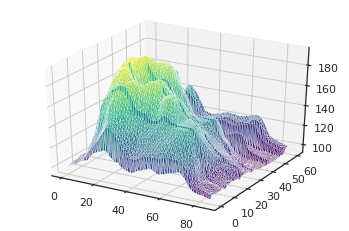

In [ ]:

 
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
plt.show()
 


 

 


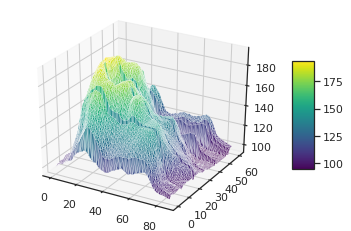

In [ ]:
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)

 
# to Add a color bar which maps values to colors.
surf=ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
fig.colorbar( surf, shrink=0.5, aspect=5)
plt.show()



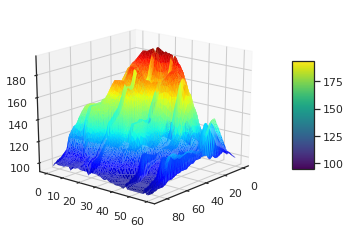

In [ ]:
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')

 
fig.colorbar( surf, shrink=0.5, aspect=5)

# Other palette
ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.jet, linewidth=0.01)
ax.view_init(20, 40)

plt.show()

# 5. Change over Time


- Give emphasis to changing trends. These can be short (intra-day) movements or extended series traversing decades or centuries: Choosing the correct time period is important to provide suitable context for the reader.
- Example FT uses
  - Share price movements, economic time series, sectoral changes in a market

## Line
The standard way to show a changing time series. If data are irregular, consider markers to represent data points.

- Time series plot is used to visualise how a given metric changes over time. Here you can see how the Air Passenger traffic changed between 1949 and 1969.

In [ ]:
# Import Data
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')
#df["date"] = pd.to_datetime(df["date"]) 
df.head()

date  value
0  1949-01-01    112
1  1949-02-01    118
2  1949-03-01    132
3  1949-04-01    129
4  1949-05-01    121

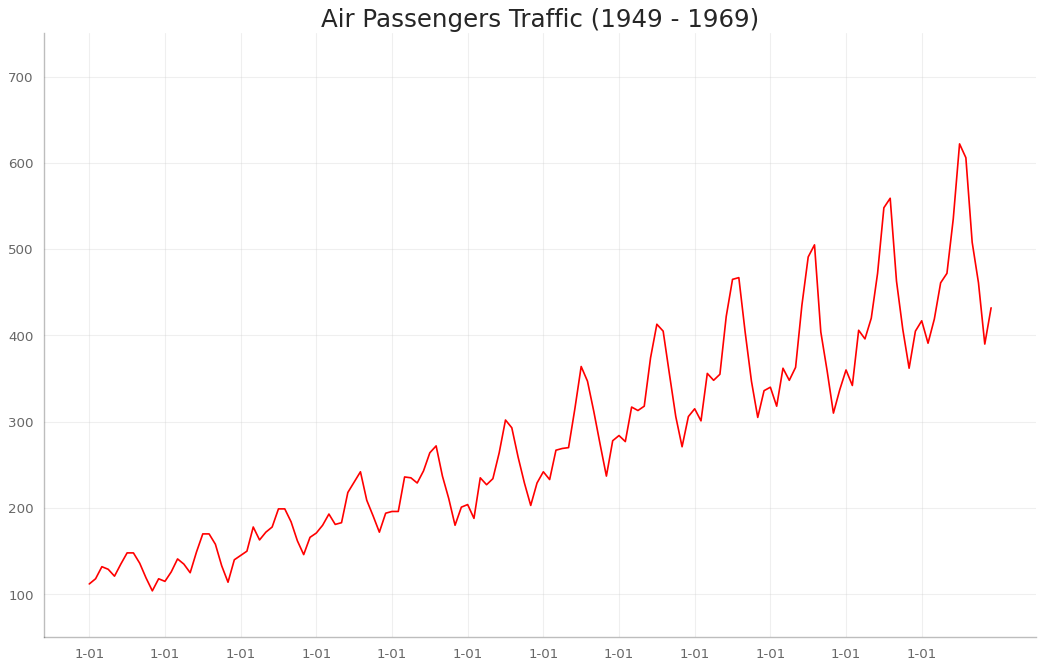

In [ ]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('date', 'value', data=df, color='red')

# Decoration
plt.ylim(50, 750)
xtick_location = df.index.tolist()[::12]
xtick_labels = [x[-4:] for x in df.date.tolist()[::12]]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=0, fontsize=12, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.title("Air Passengers Traffic (1949 - 1969)", fontsize=22)
plt.grid(axis='both', alpha=.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()

## Column
Columns work well for showing change over time - but usually best with only one series of data at a time.

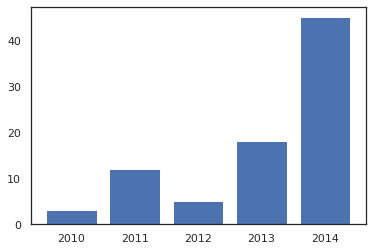

In [ ]:
# Make a fake dataset:
height = [3, 12, 5, 18, 45]
bars = ('2010', '2011', '2012', '2013', '2014')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()


## Column + line timeline
- A good way of showing the relationship over time between an amount (columns) and a rate (line).

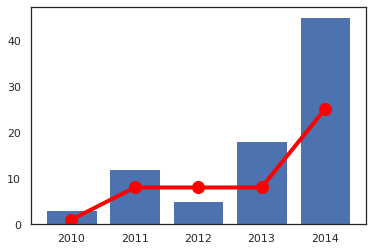

In [ ]:
# Make a fake dataset:
height1 = [3, 12, 5, 18, 45]
height2 = [1, 8, 8, 8, 25]
bars = ('2010', '2011', '2012', '2013', '2014')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height1)
plt.plot(y_pos, height2, marker='o', markerfacecolor='red', markersize=12, color='red', linewidth=4)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()


## Slope
Good for showing changing data as long as the data can be simplified into 2 or 3 points without missing a key part of story.

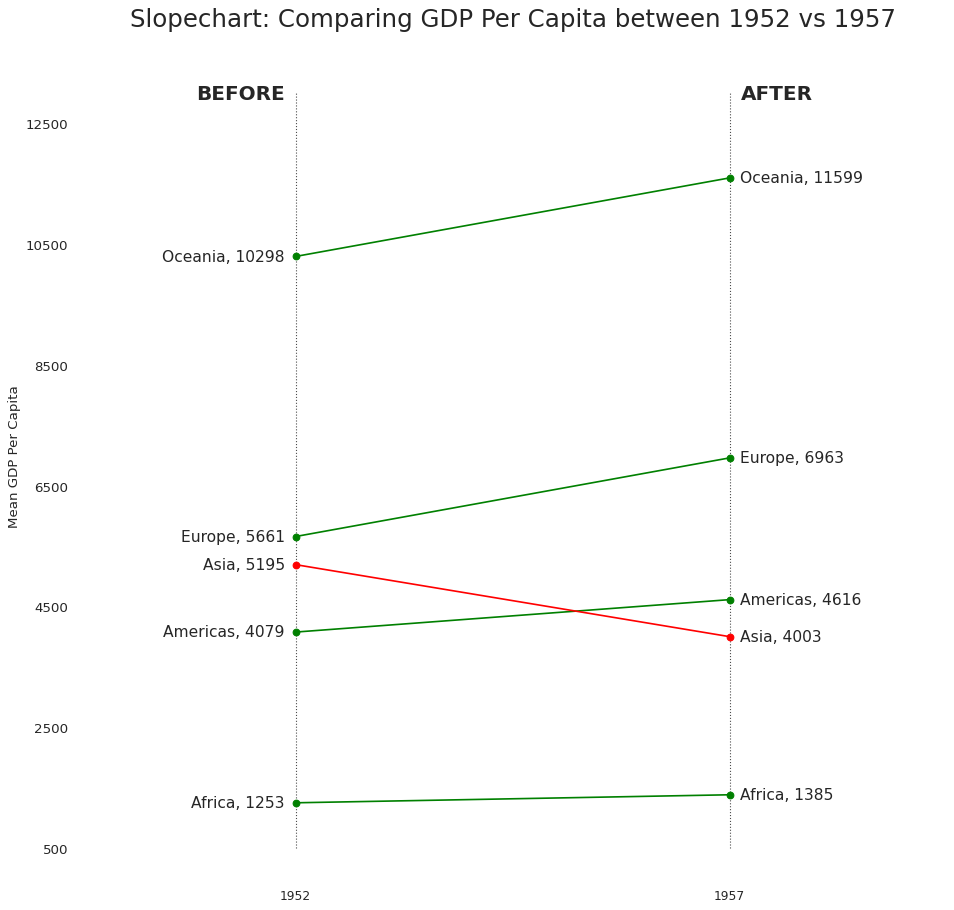

In [ ]:
import matplotlib.lines as mlines
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/gdppercap.csv")

left_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.continent, df['1952'])]
right_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.continent, df['1957'])]
klass = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(df['1952'], df['1957'])]
df.head()
klass
# draw line
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='red' if p1[1]-p2[1] > 0 else 'green', marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(14,14), dpi= 80)

# Vertical Lines
ax.vlines(x=1, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df['1952'], x=np.repeat(1, df.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df['1957'], x=np.repeat(3, df.shape[0]), s=10, color='black', alpha=0.7)

# Line Segmentsand Annotation
for p1, p2, c in zip(df['1952'], df['1957'], df['continent']):
    newline([1,p1], [3,p2])
    ax.text(1-0.05, p1, c + ', ' + str(round(p1)), horizontalalignment='right', verticalalignment='center', fontdict={'size':14})
    ax.text(3+0.05, p2, c + ', ' + str(round(p2)), horizontalalignment='left', verticalalignment='center', fontdict={'size':14})

# 'Before' and 'After' Annotations
ax.text(1-0.05, 13000, 'BEFORE', horizontalalignment='right', verticalalignment='center', fontdict={'size':18, 'weight':700})
ax.text(3+0.05, 13000, 'AFTER', horizontalalignment='left', verticalalignment='center', fontdict={'size':18, 'weight':700})

# Decoration
ax.set_title("Slopechart: Comparing GDP Per Capita between 1952 vs 1957", fontdict={'size':22})
ax.set(xlim=(0,4), ylim=(0,14000), ylabel='Mean GDP Per Capita')
ax.set_xticks([1,3])
ax.set_xticklabels(["1952", "1957"])
plt.yticks(np.arange(500, 13000, 2000), fontsize=12)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()

## Area chart
Use with care – these are good at showing changes to total, but seeing change in components can be very difficult.

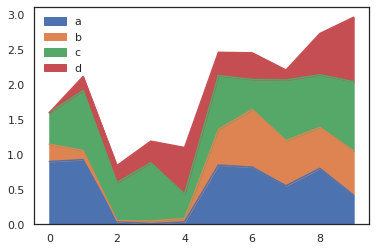

In [ ]:
# Dataset
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
 
# plot
df.plot.area()


## Candlestick
- Usually focused on day-to-day activity, these charts show opening/closing and high/low points of each day.

In [ ]:
import plotly.express as px
import plotly.graph_objects as go


In [ ]:
stockdata_df = pd.read_csv("https://raw.githubusercontent.com/johnashu/datacamp/master/sp500.csv",sep=",")
stockdata_df.head()

Date         Open         High  ...        Close      Volume    Adj Close
0  2015-01-02  2058.899902  2072.360107  ...  2058.199951  2708700000  2058.199951
1  2015-01-05  2054.439941  2054.439941  ...  2020.579956  3799120000  2020.579956
2  2015-01-06  2022.150024  2030.250000  ...  2002.609985  4460110000  2002.609985
3  2015-01-07  2005.550049  2029.609985  ...  2025.900024  3805480000  2025.900024
4  2015-01-08  2030.609985  2064.080078  ...  2062.139893  3934010000  2062.139893

[5 rows x 7 columns]

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=stockdata_df['Date'],
                open=stockdata_df['Open'],
                high=stockdata_df['High'],
                low=stockdata_df['Low'],
                close=stockdata_df['Close'])])
fig.update_layout(
    title= {
        'text': "quote",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        font=dict(
          family="Courier New, monospace",
          size=20,
          color="#ffffff"
        )
    )
fig.show()

## Fan chart (projections)
-Use to show the uncertainty in future projections - usually this grows the further forward to projection.

In [ ]:
!pip install twopiece

In [ ]:
from twopiece.single import *
from twopiece.plots import *

In [ ]:
parameters = pd.read_csv("https://raw.githubusercontent.com/quantgirluk/twopiece/master/data/fan_parameters.csv",sep=",")
parameters.head()

Date  Mode  Uncertainty  Skewness
0  2019-10-01  1.43         0.61         0
1  2020-01-01  1.67         0.88         0
2  2020-04-01  1.20         1.11         0
3  2020-07-01  1.17         1.27         0
4  2020-10-01  1.51         1.34         0

In [ ]:
history = pd.read_csv("https://raw.githubusercontent.com/quantgirluk/twopiece/master/data/fan_history.csv",sep=",")
history.head()

Date  Inflation
0  2004-01-31        1.4
1  2004-02-29        1.3
2  2004-03-31        1.1
3  2004-04-30        1.1
4  2004-05-31        1.5

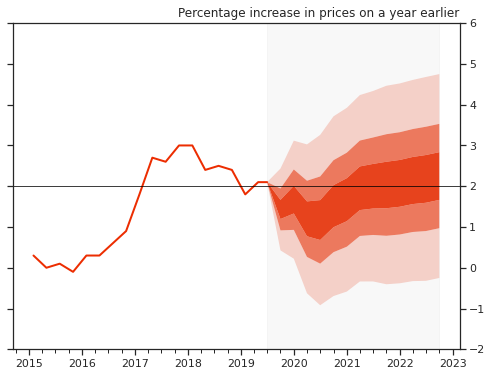

In [ ]:
probs = [0.05, 0.20, 0.35, 0.65,0.80,  0.95]
fan(data=parameters, p=probs, historic=history[history.Date >='2015'].iloc[::3,]);

## Connected scatterplot
A good way of showing changing data for two variables whenever there is a relatively clear pattern of progression.

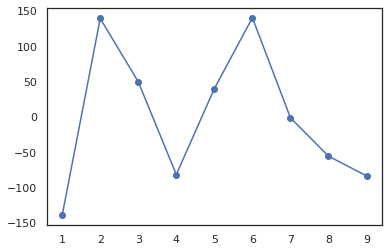

In [ ]:
# data
df=pd.DataFrame({'x': range(1,10), 'y': np.random.randn(9)*80+range(1,10) })
 
# plot
plt.plot( 'x', 'y', data=df, linestyle='-', marker='o')
plt.show()


## Calendar heatmap
A great way of showing temporal patterns (daily, weekly, monthly) – at the expense of showing precision in quantity.

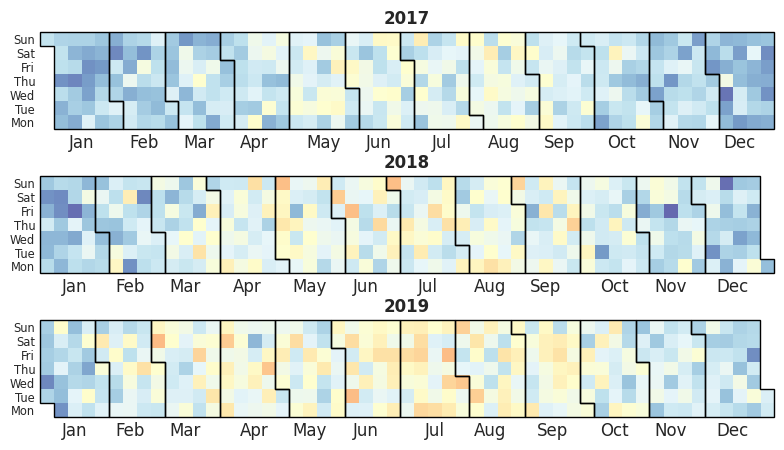

In [ ]:
# ----------------------------------------------------------------------------
# Author:  Nicolas P. Rougier
# License: BSD
# ----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from datetime import datetime
from dateutil.relativedelta import relativedelta


def calmap(ax, year, data):
    ax.tick_params('x', length=0, labelsize="medium", which='major')
    ax.tick_params('y', length=0, labelsize="x-small", which='major')

    # Month borders
    xticks, labels = [], []
    start = datetime(year,1,1).weekday()
    for month in range(1,13):
        first = datetime(year, month, 1)
        last = first + relativedelta(months=1, days=-1)

        y0 = first.weekday()
        y1 = last.weekday()
        x0 = (int(first.strftime("%j"))+start-1)//7
        x1 = (int(last.strftime("%j"))+start-1)//7

        P = [ (x0,   y0), (x0,    7),  (x1,   7),
              (x1,   y1+1), (x1+1,  y1+1), (x1+1, 0),
              (x0+1,  0), (x0+1,  y0) ]
        xticks.append(x0 +(x1-x0+1)/2)
        labels.append(first.strftime("%b"))
        poly = Polygon(P, edgecolor="black", facecolor="None",
                       linewidth=1, zorder=20, clip_on=False)
        ax.add_artist(poly)
    
    ax.set_xticks(xticks)
    ax.set_xticklabels(labels)
    ax.set_yticks(0.5 + np.arange(7))
    ax.set_yticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
    ax.set_title("{}".format(year), weight="semibold")
    
    # Clearing first and last day from the data
    valid = datetime(year, 1, 1).weekday()
    data[:valid,0] = np.nan
    valid = datetime(year, 12, 31).weekday()
    # data[:,x1+1:] = np.nan
    data[valid+1:,x1] = np.nan

    # Showing data
    ax.imshow(data, extent=[0,53,0,7], zorder=10, vmin=-1, vmax=1,
              cmap="RdYlBu", origin="lower", alpha=.75)




fig = plt.figure(figsize=(8,4.5), dpi=100)
X = np.linspace(-1,1, 53*7)

ax = plt.subplot(311, xlim=[0,53], ylim=[0,7], frameon=False, aspect=1)
I = 1.2 - np.cos(X.ravel()) + np.random.normal(0,.2, X.size)
calmap(ax, 2017, I.reshape(53,7).T)

ax = plt.subplot(312, xlim=[0,53], ylim=[0,7], frameon=False, aspect=1)
I = 1.1 - np.cos(X.ravel()) + np.random.normal(0,.2, X.size)
calmap(ax, 2018, I.reshape(53,7).T)

ax = plt.subplot(313, xlim=[0,53], ylim=[0,7], frameon=False, aspect=1)
I = 1.0 - np.cos(X.ravel()) + np.random.normal(0,.2, X.size)
calmap(ax, 2019, I.reshape(53,7).T)


plt.tight_layout()
#plt.savefig("calendar-heatmap.png", dpi=300)
#plt.savefig("calendar-heatmap.pdf", dpi=600)
plt.show()

## Priestley timeline
Great when date and duration are key elements of the story in the data.

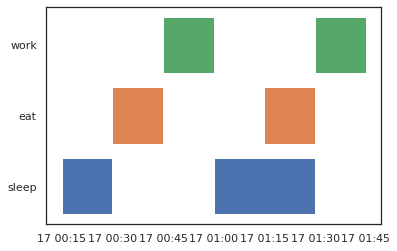

In [ ]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection

data = [    (dt.datetime(2018, 7, 17, 0, 15), dt.datetime(2018, 7, 17, 0, 30), 'sleep'),
            (dt.datetime(2018, 7, 17, 0, 30), dt.datetime(2018, 7, 17, 0, 45), 'eat'),
            (dt.datetime(2018, 7, 17, 0, 45), dt.datetime(2018, 7, 17, 1, 0), 'work'),
            (dt.datetime(2018, 7, 17, 1, 0), dt.datetime(2018, 7, 17, 1, 30), 'sleep'),
            (dt.datetime(2018, 7, 17, 1, 15), dt.datetime(2018, 7, 17, 1, 30), 'eat'), 
            (dt.datetime(2018, 7, 17, 1, 30), dt.datetime(2018, 7, 17, 1, 45), 'work')
        ]

cats = {"sleep" : 1, "eat" : 2, "work" : 3}
colormapping = {"sleep" : "C0", "eat" : "C1", "work" : "C2"}

verts = []
colors = []
for d in data:
    v =  [(mdates.date2num(d[0]), cats[d[2]]-.4),
          (mdates.date2num(d[0]), cats[d[2]]+.4),
          (mdates.date2num(d[1]), cats[d[2]]+.4),
          (mdates.date2num(d[1]), cats[d[2]]-.4),
          (mdates.date2num(d[0]), cats[d[2]]-.4)]
    verts.append(v)
    colors.append(colormapping[d[2]])

bars = PolyCollection(verts, facecolors=colors)

fig, ax = plt.subplots()
ax.add_collection(bars)
ax.autoscale()
loc = mdates.MinuteLocator(byminute=[0,15,30,45])
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

ax.set_yticks([1,2,3])
ax.set_yticklabels(["sleep", "eat", "work"])
plt.show()

## Circle timeline
Good for showing discrete values of varying size across multiple categories (eg earthquakes by continent).

In [ ]:
# create data
x = np.random.rand(40)
y = np.random.rand(40)
z = np.random.rand(40)




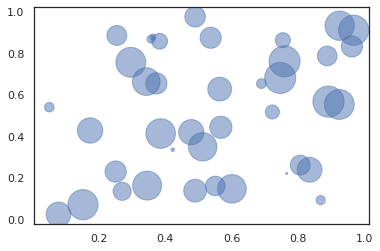

In [ ]:
# use the scatter function
plt.scatter(x, y, s=z*1000, alpha=0.5)
plt.show()

## Vertical timeline
Presents time on the Y axis. Good for displaying detailed time series that work especially well when scrolling on mobile.

## Seismogram
Another alternative to the circle timeline for showing series where there are big variations in the data.

## Others

### Time Series with Peaks and Troughs Annotated

- The below time series plots all the the peaks and troughs and annotates the occurence of selected special events.

In [ ]:
# Import Data
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')
df.rename(columns={"value":"traffic"},inplace=True) 
df.head()

date  traffic
0  1949-01-01      112
1  1949-02-01      118
2  1949-03-01      132
3  1949-04-01      129
4  1949-05-01      121

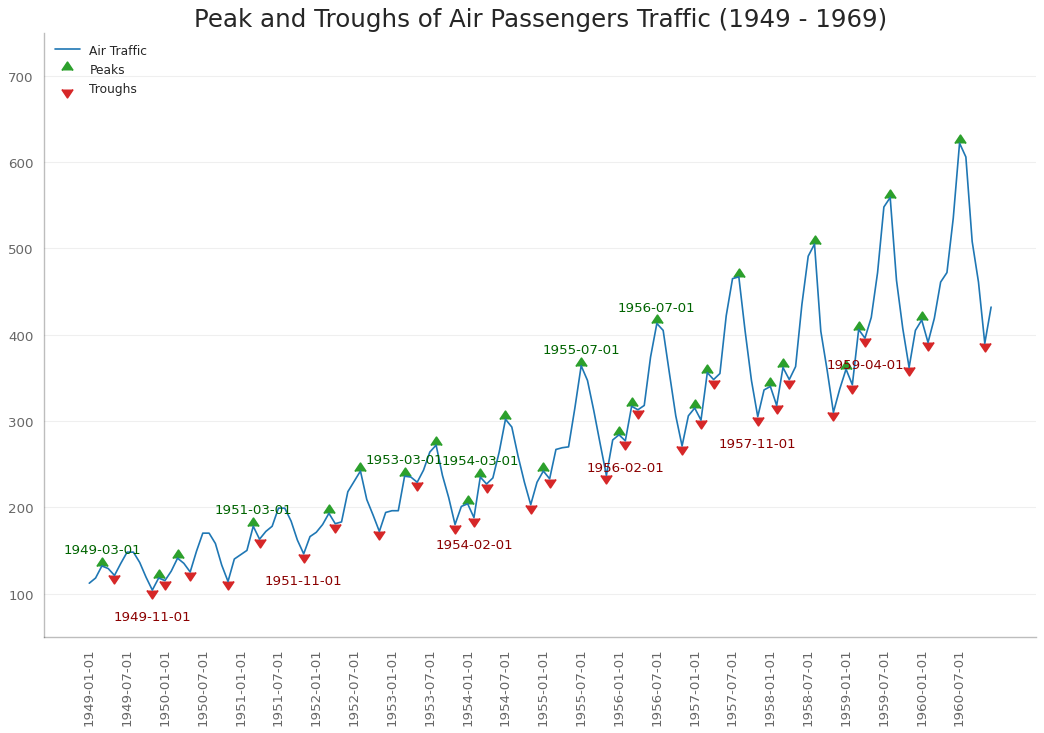

In [ ]:

# Get the Peaks and Troughs
data = df['traffic'].values
doublediff = np.diff(np.sign(np.diff(data)))
peak_locations = np.where(doublediff == -2)[0] + 1

doublediff2 = np.diff(np.sign(np.diff(-1*data)))
trough_locations = np.where(doublediff2 == -2)[0] + 1

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('date', 'traffic', data=df, color='tab:blue', label='Air Traffic')
plt.scatter(df.date[peak_locations], df.traffic[peak_locations], marker=mpl.markers.CARETUPBASE, color='tab:green', s=100, label='Peaks')
plt.scatter(df.date[trough_locations], df.traffic[trough_locations], marker=mpl.markers.CARETDOWNBASE, color='tab:red', s=100, label='Troughs')

# Annotate
for t, p in zip(trough_locations[1::5], peak_locations[::3]):
    plt.text(df.date[p], df.traffic[p]+15, df.date[p], horizontalalignment='center', color='darkgreen')
    plt.text(df.date[t], df.traffic[t]-35, df.date[t], horizontalalignment='center', color='darkred')

# Decoration
plt.ylim(50,750)
xtick_location = df.index.tolist()[::6]
xtick_labels = df.date.tolist()[::6]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=90, fontsize=12, alpha=.7)
plt.title("Peak and Troughs of Air Passengers Traffic (1949 - 1969)", fontsize=22)
plt.yticks(fontsize=12, alpha=.7)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.3)

plt.legend(loc='upper left')
plt.grid(axis='y', alpha=.3)
plt.show()

### Autocorrelation (ACF) and Partial Autocorrelation (PACF) Plot

The ACF plot shows the correlation of the time series with its own lags. Each vertical line (on the autocorrelation plot) represents the correlation between the series and its lag starting from lag 0. The blue shaded region in the plot is the significance level. Those lags that lie above the blue line are the significant lags.

So how to interpret this?

For AirPassengers, we see upto 14 lags have crossed the blue line and so are significant. This means, the Air Passengers traffic seen upto 14 years back has an influence on the traffic seen today.

PACF on the other had shows the autocorrelation of any given lag (of time series) against the current series, but with the contributions of the lags-inbetween removed.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Import Data
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')
df.rename(columns={"value":"traffic"},inplace=True) 
df.head()


date  traffic
0  1949-01-01      112
1  1949-02-01      118
2  1949-03-01      132
3  1949-04-01      129
4  1949-05-01      121

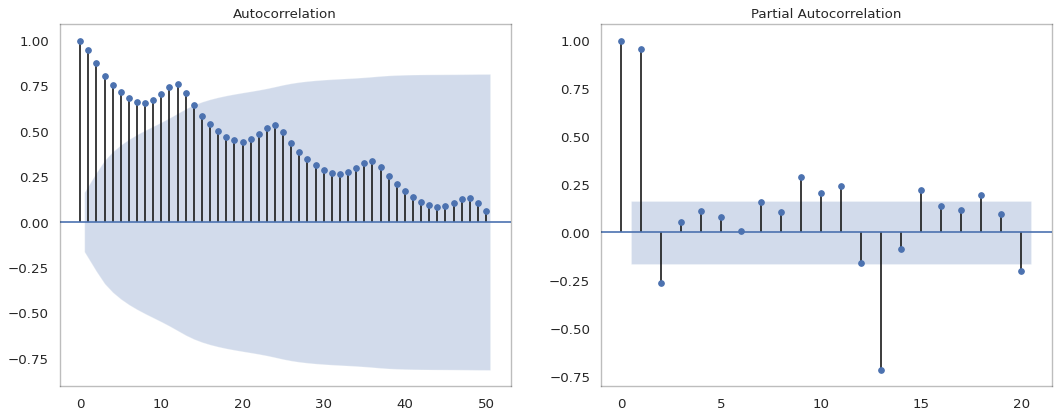

In [ ]:
# Draw Plot
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6), dpi= 80)
plot_acf(df.traffic.tolist(), ax=ax1, lags=50)
plot_pacf(df.traffic.tolist(), ax=ax2, lags=20)

# Decorate
# lighten the borders
ax1.spines["top"].set_alpha(.3); ax2.spines["top"].set_alpha(.3)
ax1.spines["bottom"].set_alpha(.3); ax2.spines["bottom"].set_alpha(.3)
ax1.spines["right"].set_alpha(.3); ax2.spines["right"].set_alpha(.3)
ax1.spines["left"].set_alpha(.3); ax2.spines["left"].set_alpha(.3)

# font size of tick labels
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()

### Cross Correlation plot

Cross correlation plot shows the lags of two time series with each other.

In [ ]:
import statsmodels.tsa.stattools as stattools

# Import Data
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/mortality.csv')
df.head()



date  mdeaths  fdeaths
0  Jan 1974     2134      901
1  Feb 1974     1863      689
2  Mar 1974     1877      827
3  Apr 1974     1877      677
4  May 1974     1492      522

In [ ]:
x = df['mdeaths']
y = df['fdeaths']

In [ ]:
# Compute Cross Correlations
ccs = stattools.ccf(x, y)[:100]
nlags = len(ccs)

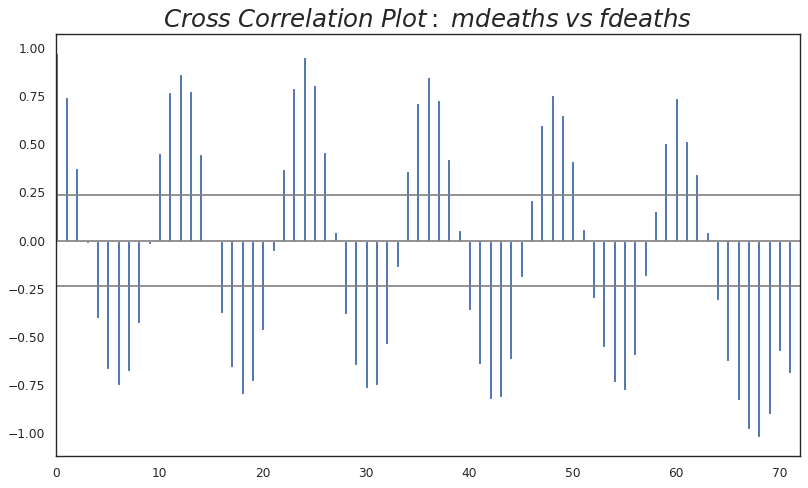

In [ ]:
# Compute the Significance level
# ref: https://stats.stackexchange.com/questions/3115/cross-correlation-significance-in-r/3128#3128
conf_level = 2 / np.sqrt(nlags)

# Draw Plot
plt.figure(figsize=(12,7), dpi= 80)

plt.hlines(0, xmin=0, xmax=100, color='gray')  # 0 axis
plt.hlines(conf_level, xmin=0, xmax=100, color='gray')
plt.hlines(-conf_level, xmin=0, xmax=100, color='gray')

plt.bar(x=np.arange(len(ccs)), height=ccs, width=.3)

# Decoration
plt.title('$Cross\; Correlation\; Plot:\; mdeaths\; vs\; fdeaths$', fontsize=22)
plt.xlim(0,len(ccs))
plt.show()

### Time Series Decomposition Plot

- Time series decomposition plot shows the break down of the time series into trend, seasonal and residual components.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [ ]:
# Import Data
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')
df.rename(columns={"value":"traffic"},inplace=True) 
dates = pd.DatetimeIndex([parse(d).strftime('%Y-%m-01') for d in df['date']])
df.set_index(dates, inplace=True)
df.head()

date  traffic
1949-01-01  1949-01-01      112
1949-02-01  1949-02-01      118
1949-03-01  1949-03-01      132
1949-04-01  1949-04-01      129
1949-05-01  1949-05-01      121

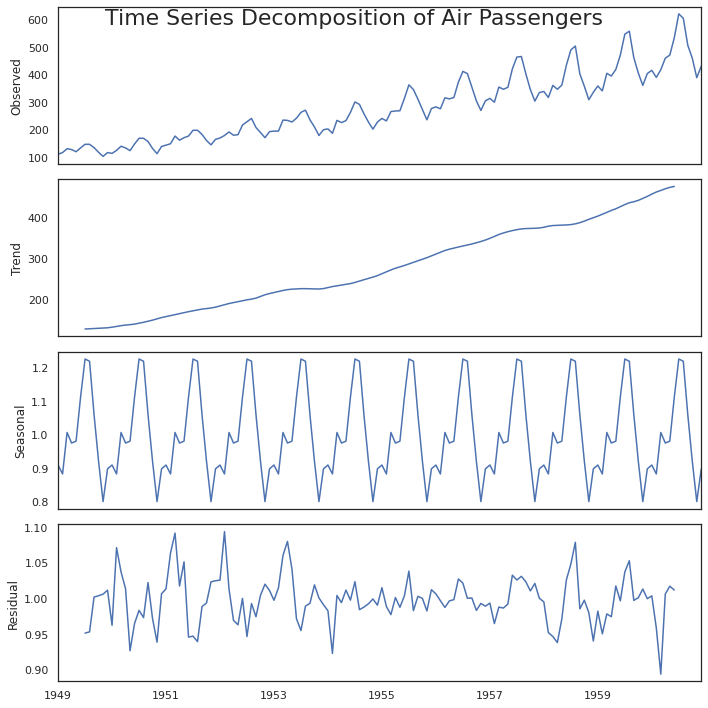

In [ ]:
# Decompose 
result = seasonal_decompose(df['traffic'], model='multiplicative')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result.plot().suptitle('Time Series Decomposition of Air Passengers')
plt.show()

### Multiple Time Series

- You can plot multiple time series that measures the same value on the same chart as shown below.

In [ ]:
# Import Data
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/mortality.csv')
df.head()

date  mdeaths  fdeaths
0  Jan 1974     2134      901
1  Feb 1974     1863      689
2  Mar 1974     1877      827
3  Apr 1974     1877      677
4  May 1974     1492      522

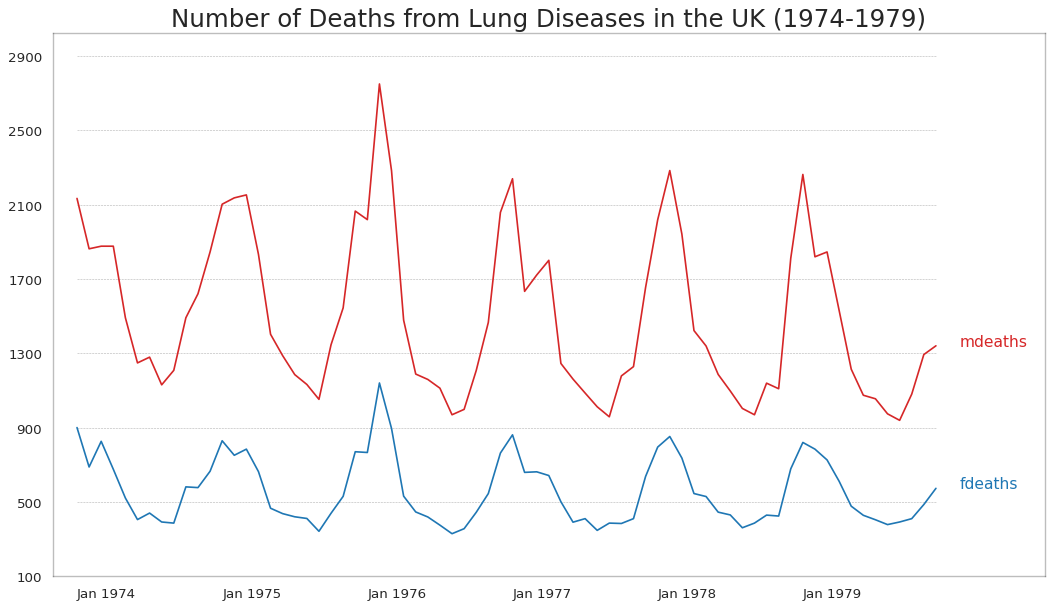

In [ ]:
# Define the upper limit, lower limit, interval of Y axis and colors
y_LL = 100
y_UL = int(df.iloc[:, 1:].max().max()*1.1)
y_interval = 400
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']    

# Draw Plot and Annotate
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)    

columns = df.columns[1:]  
for i, column in enumerate(columns):    
    plt.plot(df.date.values, df[column].values, lw=1.5, color=mycolors[i])    
    plt.text(df.shape[0]+1, df[column].values[-1], column, fontsize=14, color=mycolors[i])

# Draw Tick lines  
for y in range(y_LL, y_UL, y_interval):    
    plt.hlines(y, xmin=0, xmax=71, colors='black', alpha=0.3, linestyles="--", lw=0.5)

# Decorations    
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)        

# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Number of Deaths from Lung Diseases in the UK (1974-1979)', fontsize=22)
plt.yticks(range(y_LL, y_UL, y_interval), [str(y) for y in range(y_LL, y_UL, y_interval)], fontsize=12)    
plt.xticks(range(0, df.shape[0], 12), df.date.values[::12], horizontalalignment='left', fontsize=12)    
plt.ylim(y_LL, y_UL)    
plt.xlim(-2, 80)    
plt.show()

### Plotting with different scales using secondary Y axis


If you want to show two time series that measures two different quantities at the same point in time, you can plot the second series againt the secondary Y axis on the right.

In [ ]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv")
df.head()

date    pce     pop  psavert  uempmed  unemploy
0  1967-07-01  507.4  198712     12.5      4.5      2944
1  1967-08-01  510.5  198911     12.5      4.7      2945
2  1967-09-01  516.3  199113     11.7      4.6      2958
3  1967-10-01  512.9  199311     12.5      4.9      3143
4  1967-11-01  518.1  199498     12.5      4.7      3066

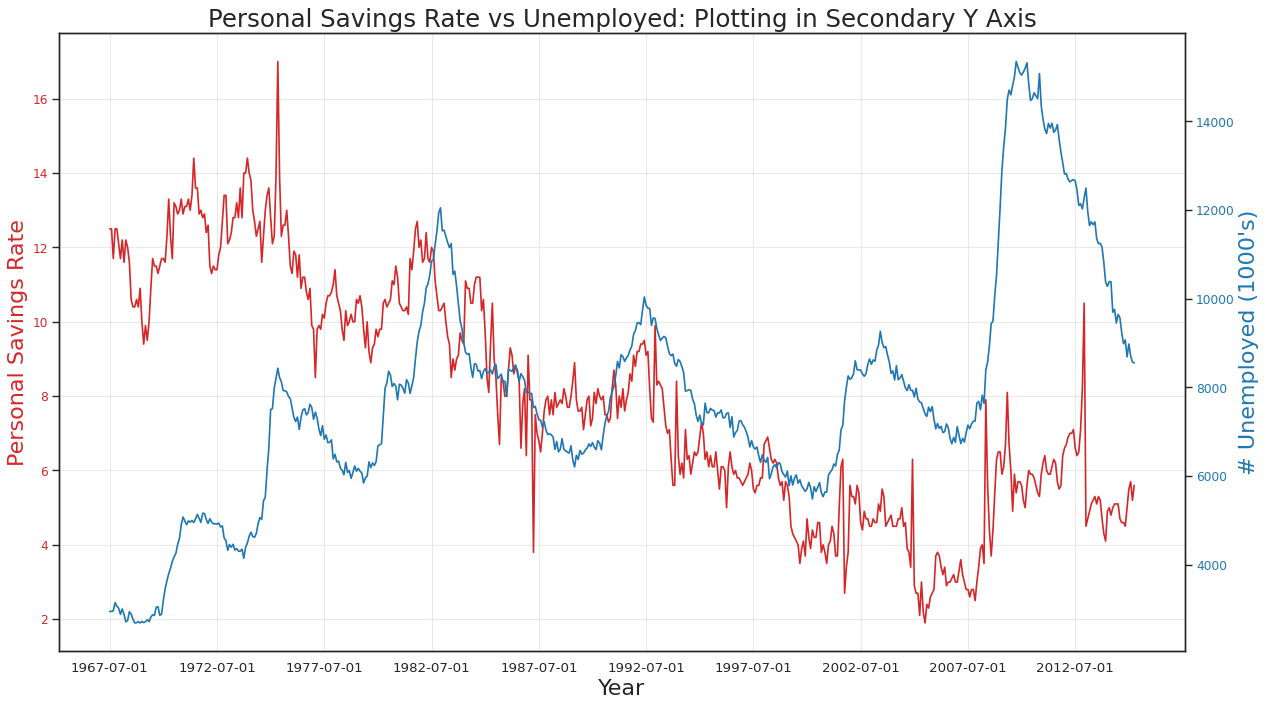

In [ ]:
x = df['date']
y1 = df['psavert']
y2 = df['unemploy']

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(x, y1, color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color='tab:blue')

# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Year', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('Personal Savings Rate', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel("# Unemployed (1000's)", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_xticks(np.arange(0, len(x), 60))
ax2.set_xticklabels(x[::60], rotation=90, fontdict={'fontsize':10})
ax2.set_title("Personal Savings Rate vs Unemployed: Plotting in Secondary Y Axis", fontsize=22)
fig.tight_layout()
plt.show()

### Time Series with Error Bands

- Time series with error bands can be constructed if you have a time series dataset with multiple observations for each time point (date / timestamp). Below you can see a couple of examples based on the orders coming in at various times of the day. And another example on the number of orders arriving over a duration of 45 days.

In this approach, the mean of the number of orders is denoted by the white line. And a 95% confidence bands are computed and drawn around the mean.

In [ ]:
from scipy.stats import sem

# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/user_orders_hourofday.csv")
df_mean = df.groupby('order_hour_of_day')["quantity"].mean()
df_se = df.groupby('order_hour_of_day')["quantity"].apply(sem).mul(1.96)
df.shape


(1572599, 3)

In [ ]:
df.sample(20)

user_id  order_hour_of_day  quantity
103817     13651                 14        10
41099       5430                 12         9
517388     67807                 12        21
275606     36221                  9         8
623579     81680                 12        68
982428    128693                 18        14
1415997   185724                 13        35
1547205   202872                 12         9
1162670   152336                 19         5
1816         236                 13        17
962996    126120                 11        59
313856     41240                  8        18
703675     92117                  9        39
1374448   180307                 18        13
191996     25211                 23         1
953442    124872                 18         7
739842     96824                 13        16
314073     41263                 17        11
909398    119053                 13        25
1562044   204811                 11        23

In [ ]:
df_mean 

order_hour_of_day
0     10.426635
1      9.939072
2      9.484422
3      9.190434
4      9.093231
5      9.804497
6     11.795419
7     14.620803
8     17.112076
9     18.925842
10    18.827706
11    17.899557
12    17.053681
13    17.186241
14    17.433936
15    17.433701
16    17.280167
17    16.239016
18    15.161777
19    14.140354
20    13.130479
21    12.674007
22    12.217237
23    11.349896
Name: quantity, dtype: float64

In [ ]:
df_se

order_hour_of_day
0     0.133649
1     0.155482
2     0.201925
3     0.201808
4     0.209330
5     0.199743
6     0.182412
7     0.145928
8     0.133414
9     0.132828
10    0.116479
11    0.099794
12    0.091048
13    0.091873
14    0.093446
15    0.094254
16    0.094085
17    0.092279
18    0.093627
19    0.095181
20    0.098311
21    0.109863
22    0.113137
23    0.121689
Name: quantity, dtype: float64

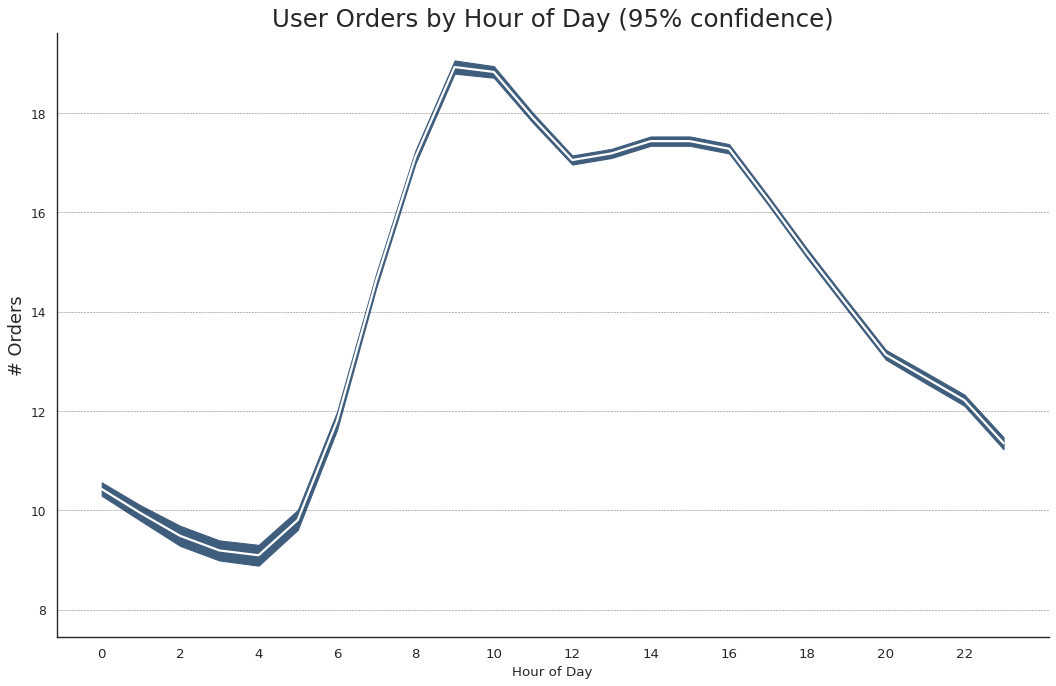

In [ ]:
# Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.ylabel("# Orders", fontsize=16)  
x = df_mean.index
plt.plot(x, df_mean, color="white", lw=2) 
plt.fill_between(x, df_mean - df_se, df_mean + df_se, color="#3F5D7D")  

# Decorations
# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(1)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(1)
plt.xticks(x[::2], [str(d) for d in x[::2]] , fontsize=12)
plt.title("User Orders by Hour of Day (95% confidence)", fontsize=22)
plt.xlabel("Hour of Day")

s, e = plt.gca().get_xlim()
plt.xlim(s, e)

# Draw Horizontal Tick lines  
for y in range(8, 20, 2):    
    plt.hlines(y, xmin=s, xmax=e, colors='black', alpha=0.5, linestyles="--", lw=0.5)

plt.show()

In [ ]:
"Data Source: https://www.kaggle.com/olistbr/brazilian-ecommerce#olist_orders_dataset.csv"
from dateutil.parser import parse
from scipy.stats import sem

# Import Data
df_raw = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/orders_45d.csv', 
                     parse_dates=['purchase_time', 'purchase_date'])
df_raw.head()

purchase_time purchase_date  quantity
0 2017-05-16 13:10:30    2017-05-16         5
1 2017-05-16 19:41:10    2017-05-16         3
2 2017-05-19 18:53:40    2017-05-19         2
3 2017-05-18 13:55:47    2017-05-18         1
4 2017-05-14 20:28:25    2017-05-14         3

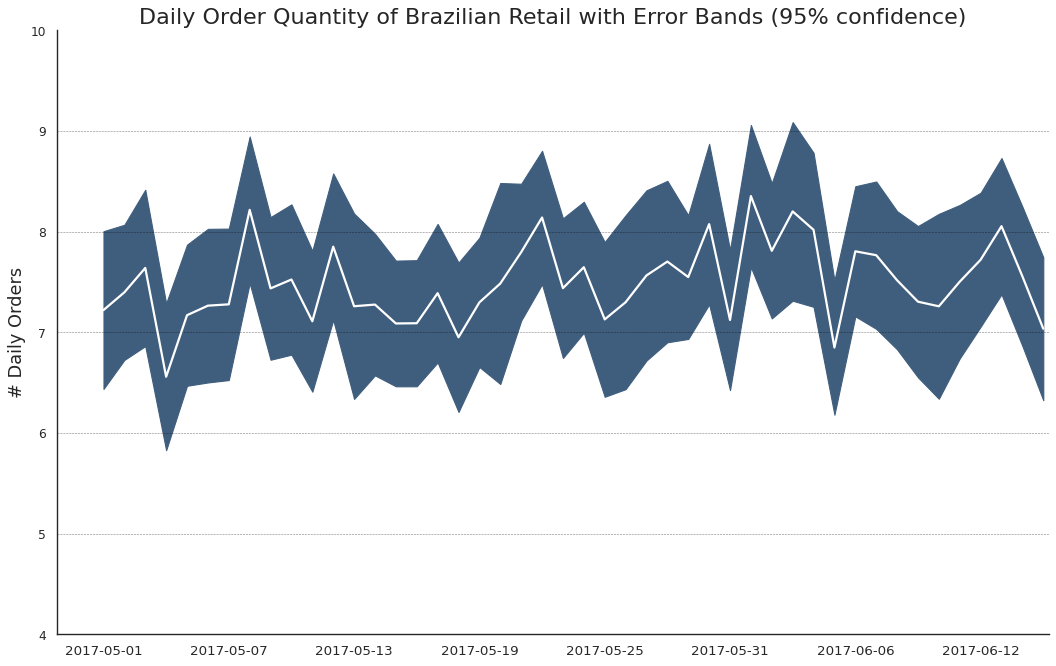

In [ ]:


# Prepare Data: Daily Mean and SE Bands
df_mean = df_raw.groupby('purchase_date').quantity.mean()
df_se = df_raw.groupby('purchase_date').quantity.apply(sem).mul(1.96)

# Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.ylabel("# Daily Orders", fontsize=16)  
x = [d.date().strftime('%Y-%m-%d') for d in df_mean.index]
plt.plot(x, df_mean, color="white", lw=2) 
plt.fill_between(x, df_mean - df_se, df_mean + df_se, color="#3F5D7D")  

# Decorations
# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(1)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(1)
plt.xticks(x[::6], [str(d) for d in x[::6]] , fontsize=12)
plt.title("Daily Order Quantity of Brazilian Retail with Error Bands (95% confidence)", fontsize=20)

# Axis limits
s, e = plt.gca().get_xlim()
plt.xlim(s, e-2)
plt.ylim(4, 10)

# Draw Horizontal Tick lines  
for y in range(5, 10, 1):    
    plt.hlines(y, xmin=s, xmax=e, colors='black', alpha=0.5, linestyles="--", lw=0.5)

plt.show()

### Stacked Area Chart


Stacked area chart gives an visual representation of the extent of contribution from multiple time series so that it is easy to compare against each other.

In [ ]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/nightvisitors.csv')
df.head()

yearmon  Sydney    NSW  Melbourne  ...  BrisbaneGC    QLD  Capitals  Other
0  Jan 1998    7320  21782       4865  ...        9055   8016      9178  10232
1  Apr 1998    6117  16881       4100  ...        5616   8461      6362   9540
2  Jul 1998    6282  13495       4418  ...        8298  13175      7965  12385
3  Oct 1998    6368  15963       5157  ...        6674   9092      6864  13098
4  Jan 1999    6602  22718       5550  ...        9168  10224      8908  10140

[5 rows x 9 columns]

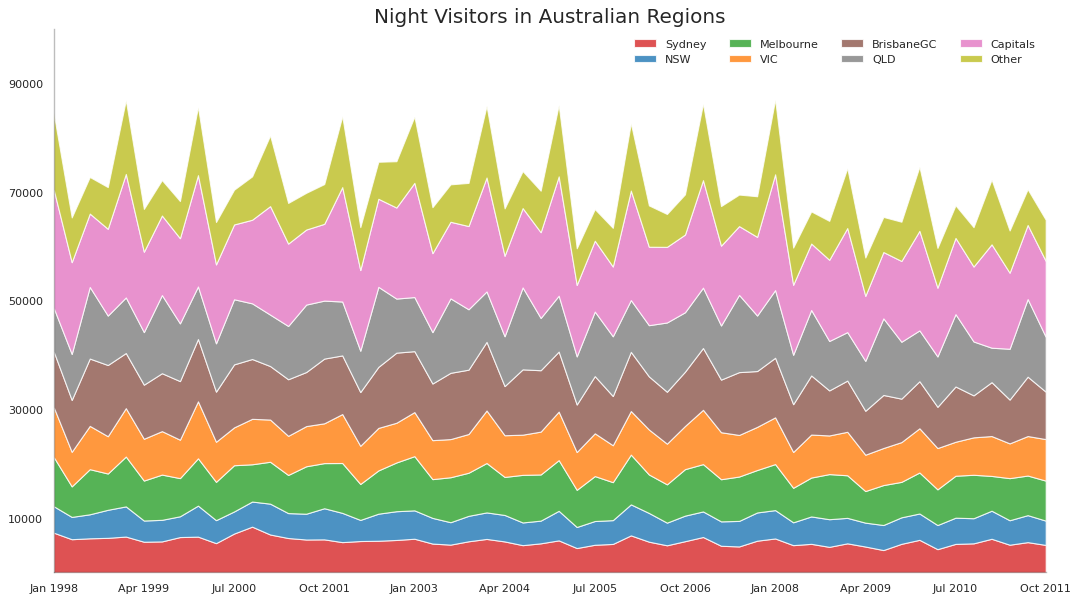

In [ ]:
# Decide Colors 
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive']      

# Draw Plot and Annotate
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)
columns = df.columns[1:]
labs = columns.values.tolist()

# Prepare data
x  = df['yearmon'].values.tolist()
y0 = df[columns[0]].values.tolist()
y1 = df[columns[1]].values.tolist()
y2 = df[columns[2]].values.tolist()
y3 = df[columns[3]].values.tolist()
y4 = df[columns[4]].values.tolist()
y5 = df[columns[5]].values.tolist()
y6 = df[columns[6]].values.tolist()
y7 = df[columns[7]].values.tolist()
y = np.vstack([y0, y2, y4, y6, y7, y5, y1, y3])

# Plot for each column
labs = columns.values.tolist()
ax = plt.gca()
ax.stackplot(x, y, labels=labs, colors=mycolors, alpha=0.8)

# Decorations
ax.set_title('Night Visitors in Australian Regions', fontsize=18)
ax.set(ylim=[0, 100000])
ax.legend(fontsize=10, ncol=4)
plt.xticks(x[::5], fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(10000, 100000, 20000), fontsize=10)
plt.xlim(x[0], x[-1])

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.show()

### Area Chart UnStacked

An unstacked area chart is used to visualize the progress (ups and downs) of two or more series with respect to each other. In the chart below, you can clearly see how the personal savings rate comes down as the median duration of unemployment increases. The unstacked area chart brings out this phenomenon nicely.

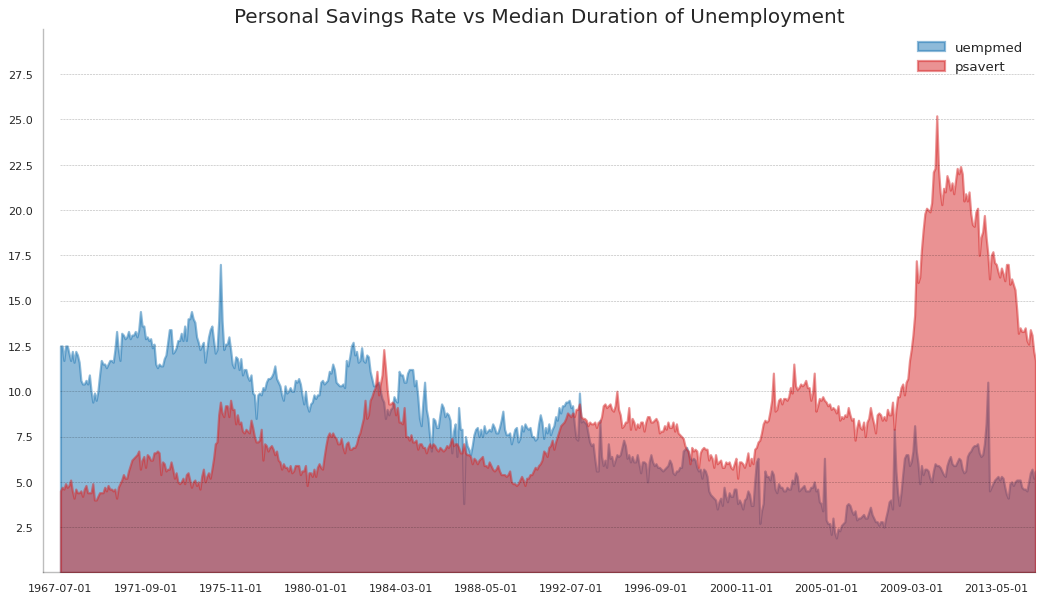

In [ ]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv")

# Prepare Data
x = df['date'].values.tolist()
y1 = df['psavert'].values.tolist()
y2 = df['uempmed'].values.tolist()
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive']      
columns = ['psavert', 'uempmed']

# Draw Plot 
fig, ax = plt.subplots(1, 1, figsize=(16,9), dpi= 80)
ax.fill_between(x, y1=y1, y2=0, label=columns[1], alpha=0.5, color=mycolors[1], linewidth=2)
ax.fill_between(x, y1=y2, y2=0, label=columns[0], alpha=0.5, color=mycolors[0], linewidth=2)

# Decorations
ax.set_title('Personal Savings Rate vs Median Duration of Unemployment', fontsize=18)
ax.set(ylim=[0, 30])
ax.legend(loc='best', fontsize=12)
plt.xticks(x[::50], fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(2.5, 30.0, 2.5), fontsize=10)
plt.xlim(-10, x[-1])

# Draw Tick lines  
for y in np.arange(2.5, 30.0, 2.5):    
    plt.hlines(y, xmin=0, xmax=len(x), colors='black', alpha=0.3, linestyles="--", lw=0.5)

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)
plt.show()

### Seasonal Plot

- The seasonal plot can be used to compare how the time series performed at same day in the previous season (year / month / week etc).

In [ ]:
from dateutil.parser import parse 

# Import Data
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')
df.rename(columns={"value":"traffic"},inplace=True) 
df.head()


date  traffic
0  1949-01-01      112
1  1949-02-01      118
2  1949-03-01      132
3  1949-04-01      129
4  1949-05-01      121

In [ ]:
# Prepare data
df['year'] = [parse(d).year for d in df.date]
df['month'] = [parse(d).strftime('%b') for d in df.date]
years = df['year'].unique()



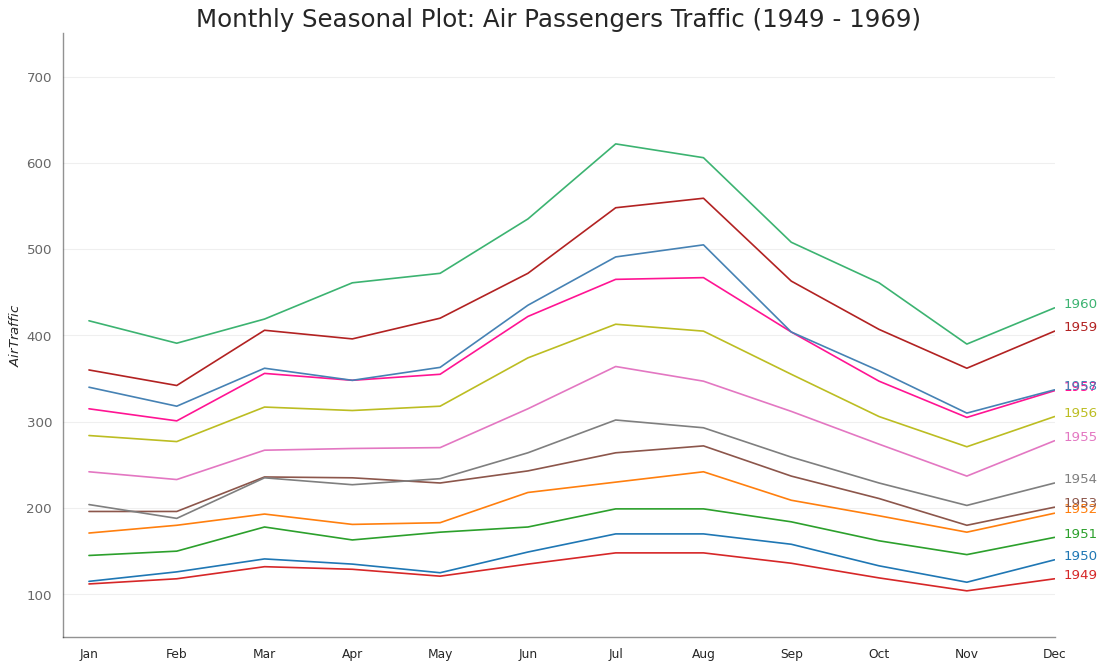

In [ ]:
# Draw Plot
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive', 'deeppink', 'steelblue', 'firebrick', 'mediumseagreen']      
plt.figure(figsize=(16,10), dpi= 80)

for i, y in enumerate(years):
    plt.plot('month', 'traffic', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
    plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'traffic'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.ylim(50,750)
plt.xlim(-0.3, 11)
plt.ylabel('$Air Traffic$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Monthly Seasonal Plot: Air Passengers Traffic (1949 - 1969)", fontsize=22)
plt.grid(axis='y', alpha=.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.5)   
# plt.legend(loc='upper right', ncol=2, fontsize=12)
plt.show()

# 6. Magnitude


- Show size comparisons. These can be relative (just being able to see larger/bigger) or absolute (need to see fine differences). Usually these show a ‘counted’ number (for example, barrels, dollars or people) rather than a calculated rate or per cent.
- Example FT uses
  - Commodity production, market capitalisation, volumes in general

## Waffle Chart

The waffle chart can be created using the pywaffle package and is used to show the compositions of groups in a larger population.

In [ ]:
! pip install pywaffle
# Reference: https://stackoverflow.com/questions/41400136/how-to-do-waffle-charts-in-python-square-piechart
from pywaffle import Waffle



In [ ]:
# Import
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df_raw.head()


manufacturer model  displ  year  cyl       trans drv  cty  hwy fl    class
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
4         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact

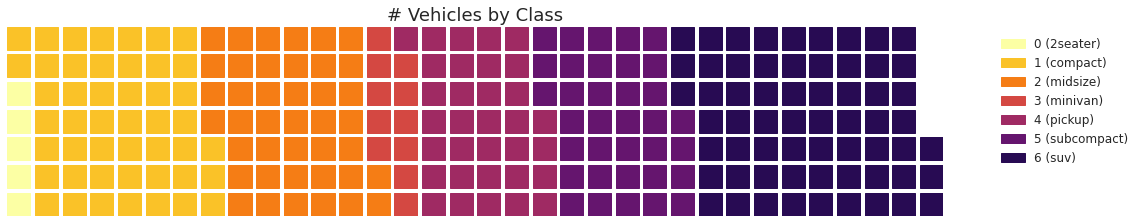

In [ ]:
# Prepare Data
df = df_raw.groupby('class').size().reset_index(name='counts')
n_categories = df.shape[0]
colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]

# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '111': {
            'values': df['counts'],
            'labels': ["{0} ({1})".format(n[0], n[1]) for n in df[['class', 'counts']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
            'title': {'label': '# Vehicles by Class', 'loc': 'center', 'fontsize':18}
        },
    },
    rows=7,
    colors=colors,
    figsize=(16, 9)
)

In [ ]:
!pip install pywaffle
from pywaffle import Waffle



In [ ]:
# Import
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df_raw.head()

manufacturer model  displ  year  cyl       trans drv  cty  hwy fl    class
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
4         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact

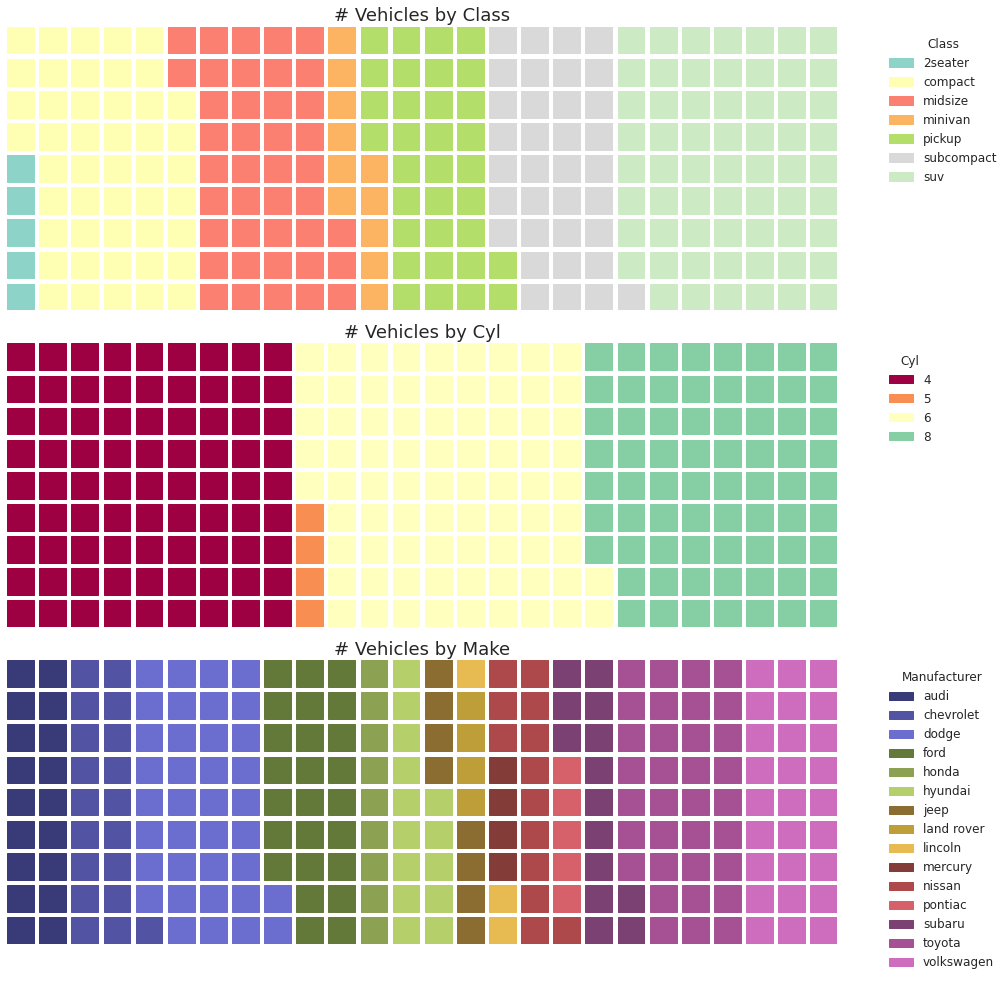

In [ ]:


# Prepare Data
# By Class Data
df_class = df_raw.groupby('class').size().reset_index(name='counts_class')
n_categories = df_class.shape[0]
colors_class = [plt.cm.Set3(i/float(n_categories)) for i in range(n_categories)]

# By Cylinders Data
df_cyl = df_raw.groupby('cyl').size().reset_index(name='counts_cyl')
n_categories = df_cyl.shape[0]
colors_cyl = [plt.cm.Spectral(i/float(n_categories)) for i in range(n_categories)]

# By Make Data
df_make = df_raw.groupby('manufacturer').size().reset_index(name='counts_make')
n_categories = df_make.shape[0]
colors_make = [plt.cm.tab20b(i/float(n_categories)) for i in range(n_categories)]


# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '311': {
            'values': df_class['counts_class'],
            'labels': ["{1}".format(n[0], n[1]) for n in df_class[['class', 'counts_class']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'Class'},
            'title': {'label': '# Vehicles by Class', 'loc': 'center', 'fontsize':18},
            'colors': colors_class
        },
        '312': {
            'values': df_cyl['counts_cyl'],
            'labels': ["{1}".format(n[0], n[1]) for n in df_cyl[['cyl', 'counts_cyl']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'Cyl'},
            'title': {'label': '# Vehicles by Cyl', 'loc': 'center', 'fontsize':18},
            'colors': colors_cyl
        },
        '313': {
            'values': df_make['counts_make'],
            'labels': ["{1}".format(n[0], n[1]) for n in df_make[['manufacturer', 'counts_make']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'Manufacturer'},
            'title': {'label': '# Vehicles by Make', 'loc': 'center', 'fontsize':18},
            'colors': colors_make
        }
    },
    rows=9,
    figsize=(16, 14)
)

## Pie Chart

Pie chart is a classic way to show the composition of groups. However, its not generally advisable to use nowadays because the area of the pie portions can sometimes become misleading. So, if you are to use pie chart, its highly recommended to explicitly write down the percentage or numbers for each portion of the pie.

In [ ]:
# Import
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df_raw.head()

manufacturer model  displ  year  cyl       trans drv  cty  hwy fl    class
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
4         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact

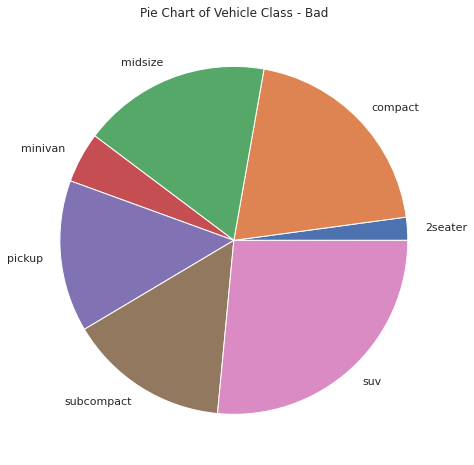

In [ ]:
# Prepare Data
df = df_raw.groupby('class').size()

# Make the plot with pandas
df.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title("Pie Chart of Vehicle Class - Bad")
plt.ylabel("")
plt.show()

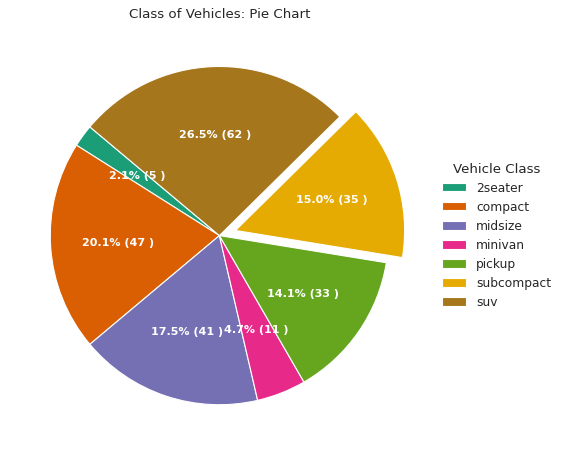

In [ ]:
# Import
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size().reset_index(name='counts')

# Draw Plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = df['counts']
categories = df['class']
explode = [0,0,0,0,0,0.1,0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

# Decoration
ax.legend(wedges, categories, title="Vehicle Class", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Class of Vehicles: Pie Chart")
plt.show()

## Treemap

Tree map is similar to a pie chart and it does a better work without misleading the contributions by each group.

In [ ]:
!pip install squarify
import squarify 



In [ ]:
# Import Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df_raw.head()


manufacturer model  displ  year  cyl       trans drv  cty  hwy fl    class
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
4         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact

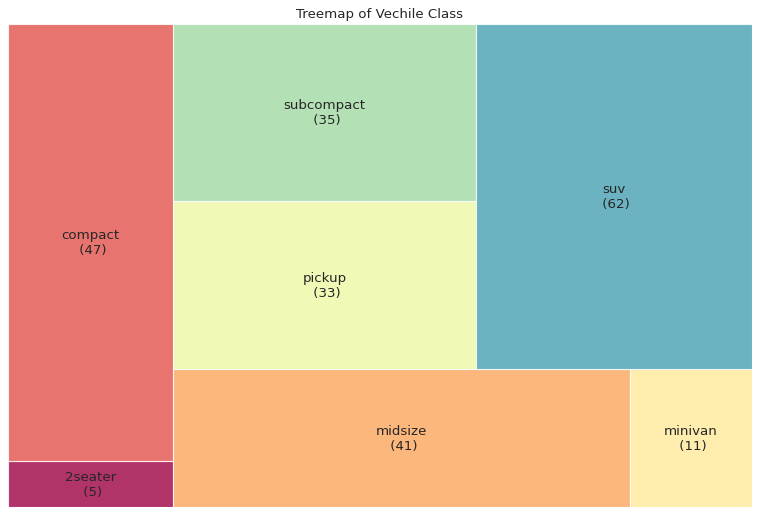

In [ ]:
# Prepare Data
df = df_raw.groupby('class').size().reset_index(name='counts')
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Vechile Class')
plt.axis('off')
plt.show()

## Bar Chart

- Bar chart is a classic way of visualizing items based on counts or any given metric. In below chart, I have used a different color for each item, but you might typically want to pick one color for all items unless you to color them by groups. The color names get stored inside all_colors in the code below. You can change the color of the bars by setting the color parameter in plt.plot().

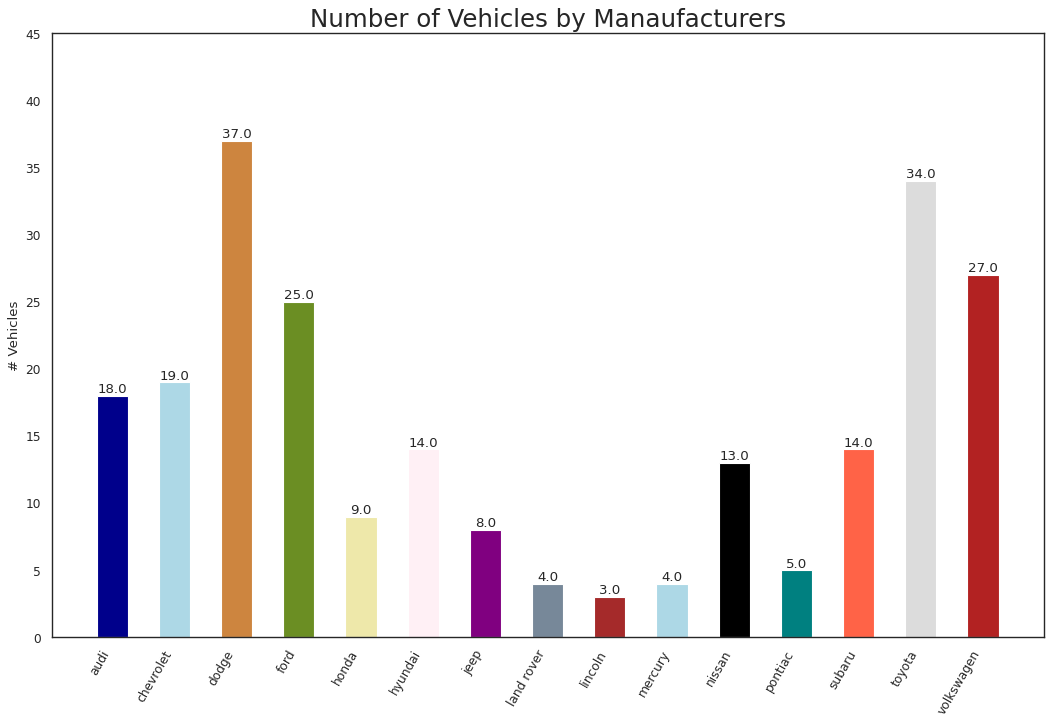

In [ ]:
import random

# Import Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('manufacturer').size().reset_index(name='counts')
n = df['manufacturer'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

# Plot Bars
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df['manufacturer'], df['counts'], color=c, width=.5)
for i, val in enumerate(df['counts'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Decoration
plt.gca().set_xticklabels(df['manufacturer'], rotation=60, horizontalalignment= 'right')
plt.title("Number of Vehicles by Manaufacturers", fontsize=22)
plt.ylabel('# Vehicles')
plt.ylim(0, 45)
plt.show()

# 7. Part-to-whole

Show how a single entity can be broken down into its component elements. If the reader’s interest is solely in the size of the components, consider a magnitude-type chart instead.
- Example FT uses
- Fiscal budgets, company structures, national election results

## Stacked column/bar
A simple way of showing part-to-whole relationships but can be difficult to read with more than a few components.
## Marimekko
A good way of showing the size and proportion of data at the same time – as long as the data are not too complicated.
## Pie
A common way of showing part-to-whole data – but be aware that it’s difficult to accurately compare the size of the segments.
## Donut
Similar to a pie chart – but the centre can be a good way of making space to include more information about the data (eg total).
## Treemap
Use for hierarchical part-to-whole relationships; can be difficult to read when there are many small segments.
## Voronoi
A way of turning points into areas – any point within each area is closer to the central point than any other centroid.
## Arc
A hemicycle, often used for visualising parliamentary composition by number of seats.
## Gridplot
Good for showing % information, they work best when used on whole numbers and work well in small multiple layout form.
## Venn
Generally only used for schematic representation.
## Waterfall
Can be useful for showing part-to-whole relationships where some of the components are negative.

# 8. Spatial

## Choropleth map with Folium

Here is an example of a choropleth map made using the Folium library. This example comes directly from the (awesome) documentation of this library. Note that you need 2 elements to build a chloropleth map. 
- i/ A shape file in the geojson format: it gives the boundaries of every zone that you want to represent. 
- ii/ A data frame that gives the values of each zone.

In [ ]:
#!pip install git+https://github.com/python-visualization/folium

In [ ]:
import os

In [ ]:
import folium


In [ ]:
# Load the shape of the zone (US states)
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
# You have to download this file and set the directory where you saved it
state_geo = os.path.join('https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json')
 



In [ ]:
# Load the unemployment value of each state
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
state_unemployment = os.path.join('https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/US_Unemployment_Oct2012.csv')
state_data = pd.read_csv(state_unemployment)
 
# Initialize the map:
m = folium.Map(location=[37, -102], zoom_start=5)
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=state_data,
 columns=['State', 'Unemployment'],
 key_on='feature.id',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Unemployment Rate (%)'
)
folium.LayerControl().add_to(m);
# Save to html

m

## Proportional symbol (count/magnitude)

Use for totals rather than rates – be wary that small differences in data will be hard to see.

In [ ]:
# import the library
import folium
import pandas as pd
 
# Make a data frame with dots to show on the map
data = pd.DataFrame({
   'lat':[-58, 2, 145, 30.32, -4.03, -73.57, 36.82, -38.5],
   'lon':[-34, 49, -38, 59.93, 5.33, 45.52, -1.29, -12.97],
   'name':['Buenos Aires', 'Paris', 'melbourne', 'St Petersbourg', 'Abidjan', 'Montreal', 'Nairobi', 'Salvador'],
   'value':[10,12,40,70,23,43,100.0,43]
})
data.info()
 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lat     8 non-null      float64
 1   lon     8 non-null      float64
 2   name    8 non-null      object 
 3   value   8 non-null      float64
dtypes: float64(3), object(1)
memory usage: 384.0+ bytes


In [ ]:
# Make an empty map
m = folium.Map(location=[20,0], tiles="Mapbox Bright", zoom_start=2)
 
# I can add marker one by one on the map
for i in range(0,len(data)):
   folium.Circle(
      location=[data.iloc[i]['lon'], data.iloc[i]['lat']],
      popup=data.iloc[i]['name'],
      radius=data.iloc[i]['value']*10000,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)
 
# Save it as html
m

# 9. Flow


Show the reader volumes or intensity of movement between two or more states or conditions. These might be logical sequences or geographical locations.
- Example FT uses
- Movement of funds, trade, migrants, lawsuits, information; relationship graphs.

## Sankey
Shows changes in flows from one condition to at least one other; good for tracing the eventual outcome of a complex process.
## Waterfall
Designed to show the sequencing of data through a flow process, typically budgets. Can include +/- components.
## Chord
A complex but powerful diagram which can illustrate 2-way flows (and net winner) in a matrix.
## Network
Used for showing the strength and inter-connectedness of relationships of varying types.

# 10. Groups

## Dendrogram

- A Dendrogram groups similar points together based on a given distance metric and organizes them in tree like links based on the point’s similarity.

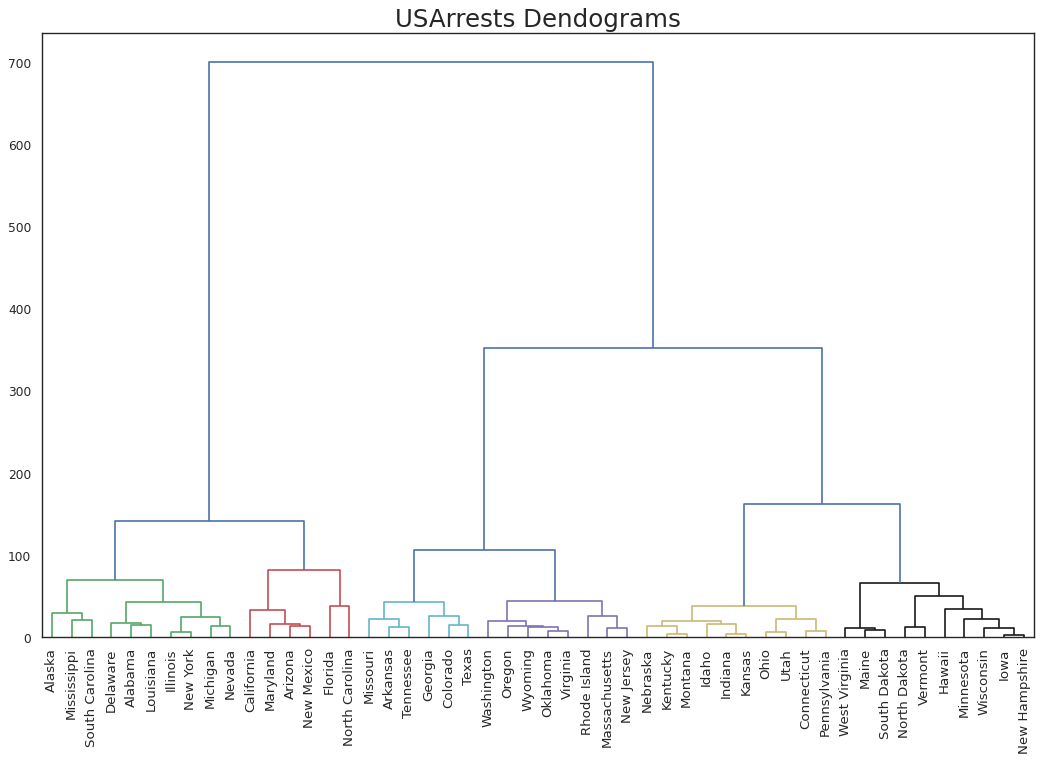

In [ ]:
import scipy.cluster.hierarchy as shc

# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/USArrests.csv')

# Plot
plt.figure(figsize=(16, 10), dpi= 80)  
plt.title("USArrests Dendograms", fontsize=22)  
dend = shc.dendrogram(shc.linkage(df[['Murder', 'Assault', 'UrbanPop', 'Rape']], method='ward'), labels=df.State.values, color_threshold=100)  
plt.xticks(fontsize=12)
plt.show()

## Cluster Plot

- Cluster Plot canbe used to demarcate points that belong to the same cluster. Below is a representational example to group the US states into 5 groups based on the USArrests dataset. This cluster plot uses the ‘murder’ and ‘assault’ columns as X and Y axis. Alternately you can use the first to principal components as rthe X and Y axis.

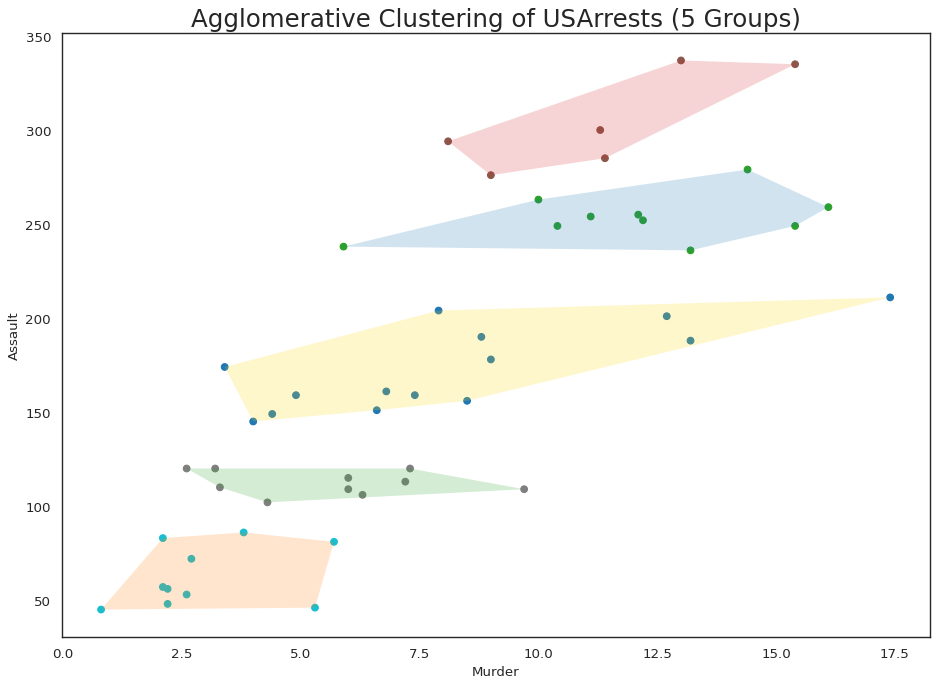

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import ConvexHull

# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/USArrests.csv')

# Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df[['Murder', 'Assault', 'UrbanPop', 'Rape']])  

# Plot
plt.figure(figsize=(14, 10), dpi= 80)  
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster.labels_, cmap='tab10')  

# Encircle
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# Draw polygon surrounding vertices    
encircle(df.loc[cluster.labels_ == 0, 'Murder'], df.loc[cluster.labels_ == 0, 'Assault'], ec="k", fc="gold", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 1, 'Murder'], df.loc[cluster.labels_ == 1, 'Assault'], ec="k", fc="tab:blue", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 2, 'Murder'], df.loc[cluster.labels_ == 2, 'Assault'], ec="k", fc="tab:red", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 3, 'Murder'], df.loc[cluster.labels_ == 3, 'Assault'], ec="k", fc="tab:green", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 4, 'Murder'], df.loc[cluster.labels_ == 4, 'Assault'], ec="k", fc="tab:orange", alpha=0.2, linewidth=0)

# Decorations
plt.xlabel('Murder'); plt.xticks(fontsize=12)
plt.ylabel('Assault'); plt.yticks(fontsize=12)
plt.title('Agglomerative Clustering of USArrests (5 Groups)', fontsize=22)
plt.show()

## Andrews Curve

- Andrews Curve helps visualize if there are inherent groupings of the numerical features based on a given grouping. If the features (columns in the dataset) doesn’t help discriminate the group (cyl), then the lines will not be well segregated as you see below.

In [ ]:
from pandas.plotting import andrews_curves

# Import
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
df.drop(['cars', 'carname'], axis=1, inplace=True)
df.head()


mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb  fast
0  4.582576    6  160.0  110  3.90  2.620  16.46   0   1     4     4     1
1  4.582576    6  160.0  110  3.90  2.875  17.02   0   1     4     4     1
2  4.774935    4  108.0   93  3.85  2.320  18.61   1   1     4     1     1
3  4.626013    6  258.0  110  3.08  3.215  19.44   1   0     3     1     1
4  4.324350    8  360.0  175  3.15  3.440  17.02   0   0     3     2     1

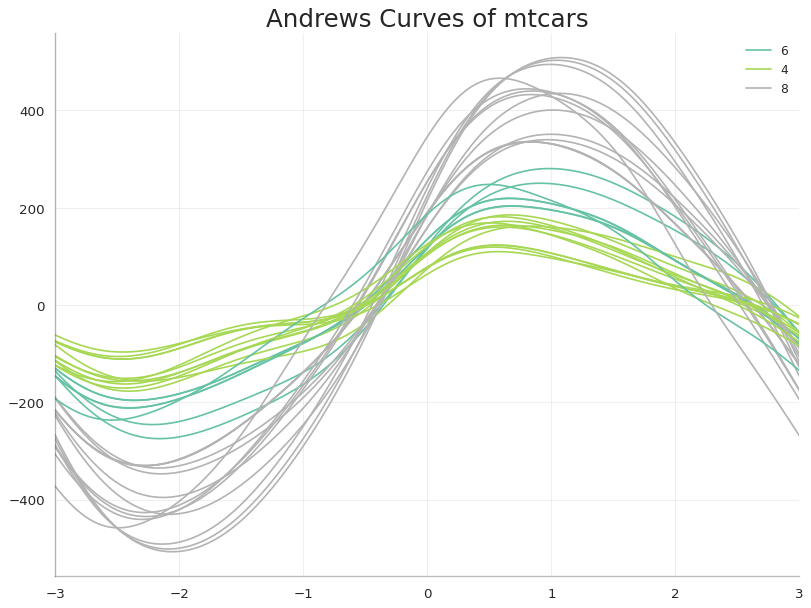

In [ ]:
# Plot
plt.figure(figsize=(12,9), dpi= 80)
andrews_curves(df, 'cyl', colormap='Set2')

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Andrews Curves of mtcars', fontsize=22)
plt.xlim(-3,3)
plt.grid(alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Parallel Coordinates

- Parallel coordinates helps to visualize if a feature helps to segregate the groups effectively. If a segregation is effected, that feature is likely going to be very useful in predicting that group.

In [ ]:
from pandas.plotting import parallel_coordinates

# Import Data
df_final = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/diamonds_filter.csv")
df_final.head()


carat  depth  table  clarity   cut
0   0.73   64.6   60.0      4.0  Fair
1   0.73   66.9   54.0      0.0  Fair
2   0.50   66.5   58.0      4.0  Fair
3   0.70   64.5   57.0      4.0  Fair
4   1.01   65.3   59.0      2.0  Fair

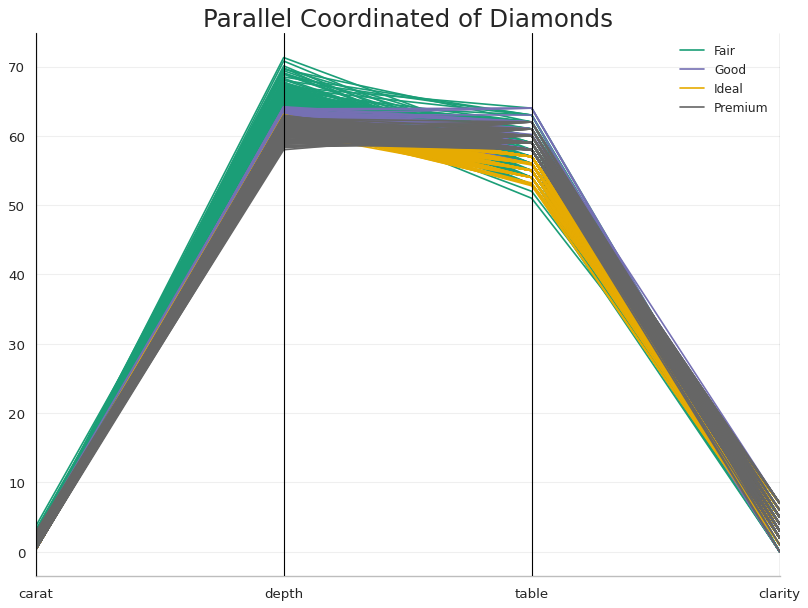

In [ ]:
# Plot
plt.figure(figsize=(12,9), dpi= 80)
parallel_coordinates(df_final, 'cut', colormap='Dark2')

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Parallel Coordinated of Diamonds', fontsize=22)
plt.grid(alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()